<a href="https://colab.research.google.com/github/HarryFengQi/Dissertation/blob/main/dissertation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
!pip install -q condacolab
import condacolab
condacolab.install()

In [ ]:
!conda install biobox
!conda install pandas
!conda install numpy
!conda install conda-forge::matplotlib
!conda install seaborn
!conda install conda-forge::propka
!conda install conda-forge::biopython
!conda install conda-forge::msms
!conda install plotly
!conda install nglview
!conda install salilab::modeller

Channels:
 - conda-forge
Platform: linux-64
Solving environment: \ | / done


==> WARNING: A newer version of conda exists. <==
    current version: 23.11.0
    latest version: 24.7.1

Please update conda by running

    $ conda update -n base -c conda-forge conda



# All requested packages already installed.

Channels:
 - conda-forge
Platform: linux-64
Solving environment: | / - done


==> WARNING: A newer version of conda exists. <==
    current version: 23.11.0
    latest version: 24.7.1

Please update conda by running

    $ conda update -n base -c conda-forge conda



# All requested packages already installed.

Channels:
 - conda-forge
Platform: linux-64
Solving environment: | / - \ | / done


==> WARNING: A newer version of conda exists. <==
    current version: 23.11.0
    latest version: 24.7.1

Please update conda by running

    $ conda update -n base -c conda-forge conda



## Package Plan ##

  environment location: /usr/local

  added / updated sp

In [ ]:
from google.colab import files
uploaded = files.upload()


Saving alphafold.py to alphafold.py
Saving analysis.py to analysis.py
Saving helper.py to helper.py
Saving measure.py to measure.py
Saving patcher.py to patcher.py
Saving protein.py to protein.py
Saving uniprot.py to uniprot.py
Saving viewer.py to viewer.py


In [ ]:
import os

#data handling
import numpy as np
import pandas as pd
pd.set_option("display.max_rows", None, "display.max_columns", None)

#plotting
import plotly.express as px
import plotly.graph_objects as go
import nglview as nv
from ipywidgets import HBox, VBox
from ipywidgets import widgets

#carbamylation analysis procedures
from uniprot import Uniprot
from protein import PDB
from measure import Measure
from analysis import Analysis
from viewer import Viewer

In [ ]:
outdir = "Demo"

In [ ]:
df = pd.read_csv(f'/content/glycation_reviewed450.csv')
df['Uniprot_Entry'] #show data

,Uniprot_Entry
0,P61769


In [ ]:
UP = Uniprot()
UP.from_csv_file(f'/content/glycation_reviewed450.csv')
UP.df #show data

.csv file successfully opened


,Uniprot_Entry,PDB Code,Method,Resolution,Chains
0,P61769,AF-P61769-F1-model_v3,Predicted,NaN,NaN
1,P61769,1A1M,X-ray,2.30,B
2,P61769,1A1N,X-ray,2.00,B
3,P61769,1A1O,X-ray,2.30,B
4,P61769,1A6Z,X-ray,2.60,B/D
5,P61769,1A9B,X-ray,3.20,B/E
6,P61769,1A9E,X-ray,2.50,B
7,P61769,1AGB,X-ray,2.20,B
8,P61769,1AGC,X-ray,2.10,B
9,P61769,1AGD,X-ray,2.05,B


In [ ]:
file_paths = [
    '/content/drive/MyDrive/glycation_reviewed450_output.csv',
    '/content/drive/MyDrive/glycation_reviewed500_output.csv',
    '/content/drive/MyDrive/glycation_reviewed550_output.csv',
    '/content/drive/MyDrive/glycation_reviewed600_output.csv',
    '/content/drive/MyDrive/glycation_reviewed675_output.csv',
    '/content/drive/MyDrive/glycation_reviewed750_output.csv',
    '/content/drive/MyDrive/glycation_reviewed780_output.csv',
    '/content/drive/MyDrive/glycation_reviewed825_output.csv',
    '/content/drive/MyDrive/glycation_reviewed900_output.csv',
    '/content/drive/MyDrive/glycation_reviewed950_output.csv',
    '/content/drive/MyDrive/glycation_reviewed1000_output.csv',
    '/content/drive/MyDrive/glycation_reviewed1050_output.csv',
    '/content/drive/MyDrive/glycation_reviewed1057_output.csv',
    '/content/drive/MyDrive/glycation_reviewed1058_first500_output.csv',
    '/content/drive/MyDrive/glycation_reviewed1058_last_output.csv',
    '/content/drive/MyDrive/glycation_reviewed1075_output.csv',
    '/content/drive/MyDrive/glycation_reviewed1100_output.csv',
    '/content/drive/MyDrive/glycation_reviewed1150_output.csv',
    '/content/drive/MyDrive/glycation_reviewed1200_output.csv',
    '/content/drive/MyDrive/glycation_reviewed1350_output.csv',
    '/content/drive/MyDrive/glycation_reviewed1500_output.csv',
    '/content/drive/MyDrive/glycation_reviewed1800_output.csv',
    '/content/drive/MyDrive/glycation_reviewed2100_output.csv',
    '/content/drive/MyDrive/glycation_reviewed2250_output.csv',
    '/content/drive/MyDrive/glycation_reviewed2400_output.csv',
    '/content/drive/MyDrive/glycation_reviewed2700_output.csv',
    '/content/drive/MyDrive/glycation_reviewed2850_output.csv',
    '/content/drive/MyDrive/glycation_reviewed3000_output.csv',
    '/content/drive/MyDrive/glycation_reviewed3105_output.csv',

]

# List of variables to store each DataFrame
dfs = []

# Read each CSV file and store into a list of DataFrames
for file_path in file_paths:
    df = pd.read_csv(file_path)
    dfs.append(df)

# Print the first few rows of each DataFrame to confirm that the file was read successfully
for i, df in enumerate(dfs):
    print(f"DataFrame {i+1}:")
    print(df.head())
    print("\n")

DataFrame 1:
  Uniprot_Entry               PDB Code     Method Resolution Chains
0        O00141  AF-O00141-F1-model_v3  Predicted        NaN    NaN
1        O00141                   2R5T      X-ray       1.90      A
2        O00141                   3HDM      X-ray       2.60      A
3        O00141                   3HDN      X-ray       3.10      A
4        O00141                   7PUE      X-ray       2.51      A


DataFrame 2:
  Uniprot_Entry               PDB Code     Method Resolution Chains
0        O95757  AF-O95757-F1-model_v3  Predicted        NaN    NaN
1        O95785  AF-O95785-F1-model_v3  Predicted        NaN    NaN
2        O95789  AF-O95789-F1-model_v3  Predicted        NaN    NaN
3        O95810  AF-O95810-F1-model_v3  Predicted        NaN    NaN
4        O95835  AF-O95835-F1-model_v3  Predicted        NaN    NaN


DataFrame 3:
  Uniprot_Entry               PDB Code     Method Resolution Chains
0        P00491  AF-P00491-F1-model_v3  Predicted        NaN    NaN
1    

In [ ]:
pdb = PDB(outdir=outdir, gap=10)
output = pdb.gather_proteins(dfs[0])

M = Measure(pdb.df, outdir=outdir, activate_log=True, log_path="measure_log.txt",
            features=["depth", "propka", "sasa"])
M.measure_dataframe()
M.save_state()


流式输出内容被截断，只能显示最后 5000 行内容。
rdclass_257_> Number of classes:        5
openf___224_> Open           ${MODINSTALL10v5}/modlib/mnch1.lib
openf___224_> Open           ${MODINSTALL10v5}/modlib/mnch2.lib
openf___224_> Open           ${MODINSTALL10v5}/modlib/mnch3.lib
openf___224_> Open           ${MODINSTALL10v5}/modlib/xs4.mat
rdrrwgh_268_> Number of residue types:       21
openf___224_> Open           trimmed_align.ali

Dynamically allocated memory at   amaxalignment [B,KiB,MiB]:      5798840    5662.930     5.530

Dynamically allocated memory at   amaxalignment [B,KiB,MiB]:      5800290    5664.346     5.532

Dynamically allocated memory at   amaxalignment [B,KiB,MiB]:      5803190    5667.178     5.534

Dynamically allocated memory at   amaxalignment [B,KiB,MiB]:      5876598    5738.865     5.604

Dynamically allocated memory at    amaxsequence [B,KiB,MiB]:      5877282    5739.533     5.605

Dynamically allocated memory at    amaxsequence [B,KiB,MiB]:      5877970    5740.205     5.606


/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBConstructionWarning: Ignoring unrecognized record 'TER' at line 898
  warnings.warn(
/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBConstructionWarning: Ignoring unrecognized record 'TER' at line 1789
  warnings.warn(
/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBConstructionWarning: Ignoring unrecognized record 'END' at line 1790
  warnings.warn(


>> evaluating propka...
>> evaluating sasa...
>> file processed in 1.24 sec.

> File: Demo/curated/5U4F-alt1B.pdb
>> 12 lysines of interest found
>> evaluating depth...


/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBConstructionWarning: Ignoring unrecognized record 'TER' at line 898
  warnings.warn(
/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBConstructionWarning: Ignoring unrecognized record 'TER' at line 1789
  warnings.warn(
/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBConstructionWarning: Ignoring unrecognized record 'END' at line 1790
  warnings.warn(


>> evaluating propka...
>> evaluating sasa...
>> file processed in 1.30 sec.

# UNIPROT: P02766 PDB: 5U4G, chain(s): A B

> File: Demo/curated/5U4G-alt1B.pdb
>> 12 lysines of interest found
>> evaluating depth...


/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBConstructionWarning: Ignoring unrecognized record 'TER' at line 898
  warnings.warn(
/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBConstructionWarning: Ignoring unrecognized record 'TER' at line 1789
  warnings.warn(
/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBConstructionWarning: Ignoring unrecognized record 'END' at line 1790
  warnings.warn(


>> evaluating propka...
>> evaluating sasa...
>> file processed in 1.19 sec.

> File: Demo/curated/5U4G-alt1A.pdb
>> 12 lysines of interest found
>> evaluating depth...


/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBConstructionWarning: Ignoring unrecognized record 'TER' at line 898
  warnings.warn(
/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBConstructionWarning: Ignoring unrecognized record 'TER' at line 1789
  warnings.warn(
/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBConstructionWarning: Ignoring unrecognized record 'END' at line 1790
  warnings.warn(


>> evaluating propka...
>> evaluating sasa...
>> file processed in 1.20 sec.

# UNIPROT: P02766 PDB: 6D0W, chain(s): A B

> File: Demo/curated/6D0W-alt1B.pdb
>> 12 lysines of interest found
>> evaluating depth...


/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBConstructionWarning: Ignoring unrecognized record 'TER' at line 898
  warnings.warn(
/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBConstructionWarning: Ignoring unrecognized record 'TER' at line 1789
  warnings.warn(
/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBConstructionWarning: Ignoring unrecognized record 'END' at line 1790
  warnings.warn(


>> evaluating propka...
>> evaluating sasa...
>> file processed in 1.20 sec.

> File: Demo/curated/6D0W-alt1A.pdb
>> 12 lysines of interest found
>> evaluating depth...


/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBConstructionWarning: Ignoring unrecognized record 'TER' at line 898
  warnings.warn(
/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBConstructionWarning: Ignoring unrecognized record 'TER' at line 1789
  warnings.warn(
/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBConstructionWarning: Ignoring unrecognized record 'END' at line 1790
  warnings.warn(


>> evaluating propka...
>> evaluating sasa...
>> file processed in 1.31 sec.

# UNIPROT: P02766 PDB: 6E6Z, chain(s): A B

> File: Demo/curated/6E6Z-alt1A.pdb
>> 12 lysines of interest found
>> evaluating depth...


/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBConstructionWarning: Ignoring unrecognized record 'TER' at line 891
  warnings.warn(
/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBConstructionWarning: Ignoring unrecognized record 'TER' at line 1782
  warnings.warn(
/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBConstructionWarning: Ignoring unrecognized record 'END' at line 1783
  warnings.warn(


>> evaluating propka...
>> evaluating sasa...
>> file processed in 1.29 sec.

> File: Demo/curated/6E6Z-alt1B.pdb
>> 12 lysines of interest found
>> evaluating depth...


/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBConstructionWarning: Ignoring unrecognized record 'TER' at line 891
  warnings.warn(
/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBConstructionWarning: Ignoring unrecognized record 'TER' at line 1782
  warnings.warn(
/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBConstructionWarning: Ignoring unrecognized record 'END' at line 1783
  warnings.warn(


>> evaluating propka...
>> evaluating sasa...
>> file processed in 1.24 sec.

# UNIPROT: P02766 PDB: 6E70, chain(s): A B

> File: Demo/curated/6E70-alt1A.pdb
>> 12 lysines of interest found
>> evaluating depth...


/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBConstructionWarning: Ignoring unrecognized record 'TER' at line 891
  warnings.warn(
/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBConstructionWarning: Ignoring unrecognized record 'TER' at line 1782
  warnings.warn(
/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBConstructionWarning: Ignoring unrecognized record 'END' at line 1783
  warnings.warn(


>> evaluating propka...
>> evaluating sasa...
>> file processed in 1.24 sec.

> File: Demo/curated/6E70-alt1B.pdb
>> 12 lysines of interest found
>> evaluating depth...


/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBConstructionWarning: Ignoring unrecognized record 'TER' at line 891
  warnings.warn(
/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBConstructionWarning: Ignoring unrecognized record 'TER' at line 1782
  warnings.warn(
/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBConstructionWarning: Ignoring unrecognized record 'END' at line 1783
  warnings.warn(


>> evaluating propka...
>> evaluating sasa...
>> file processed in 1.37 sec.

# UNIPROT: P02766 PDB: 6E71, chain(s): A B

> File: Demo/curated/6E71-alt1A.pdb
>> 12 lysines of interest found
>> evaluating depth...


/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBConstructionWarning: Ignoring unrecognized record 'TER' at line 893
  warnings.warn(
/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBConstructionWarning: Ignoring unrecognized record 'TER' at line 1786
  warnings.warn(
/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBConstructionWarning: Ignoring unrecognized record 'END' at line 1787
  warnings.warn(


>> evaluating propka...
>> evaluating sasa...
>> file processed in 1.24 sec.

> File: Demo/curated/6E71-alt1B.pdb
>> 12 lysines of interest found
>> evaluating depth...


/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBConstructionWarning: Ignoring unrecognized record 'TER' at line 893
  warnings.warn(
/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBConstructionWarning: Ignoring unrecognized record 'TER' at line 1786
  warnings.warn(
/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBConstructionWarning: Ignoring unrecognized record 'END' at line 1787
  warnings.warn(


>> evaluating propka...
>> evaluating sasa...
>> file processed in 1.28 sec.

# UNIPROT: P02766 PDB: 6E72, chain(s): A B

> File: Demo/curated/6E72-alt1A.pdb
>> 12 lysines of interest found
>> evaluating depth...


/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBConstructionWarning: Ignoring unrecognized record 'TER' at line 886
  warnings.warn(
/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBConstructionWarning: Ignoring unrecognized record 'TER' at line 1772
  warnings.warn(
/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBConstructionWarning: Ignoring unrecognized record 'END' at line 1773
  warnings.warn(


>> evaluating propka...
>> evaluating sasa...
>> file processed in 1.48 sec.

> File: Demo/curated/6E72-alt1B.pdb
>> 12 lysines of interest found
>> evaluating depth...


/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBConstructionWarning: Ignoring unrecognized record 'TER' at line 886
  warnings.warn(
/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBConstructionWarning: Ignoring unrecognized record 'TER' at line 1772
  warnings.warn(
/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBConstructionWarning: Ignoring unrecognized record 'END' at line 1773
  warnings.warn(


>> evaluating propka...
>> evaluating sasa...
>> file processed in 1.30 sec.

# UNIPROT: P02766 PDB: 6E73, chain(s): A B

> File: Demo/curated/6E73-alt1A.pdb
>> 12 lysines of interest found
>> evaluating depth...


/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBConstructionWarning: Ignoring unrecognized record 'TER' at line 892
  warnings.warn(
/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBConstructionWarning: Ignoring unrecognized record 'TER' at line 1784
  warnings.warn(
/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBConstructionWarning: Ignoring unrecognized record 'END' at line 1785
  warnings.warn(


>> evaluating propka...
>> evaluating sasa...
>> file processed in 1.24 sec.

> File: Demo/curated/6E73-alt1B.pdb
>> 12 lysines of interest found
>> evaluating depth...


/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBConstructionWarning: Ignoring unrecognized record 'TER' at line 892
  warnings.warn(
/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBConstructionWarning: Ignoring unrecognized record 'TER' at line 1784
  warnings.warn(
/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBConstructionWarning: Ignoring unrecognized record 'END' at line 1785
  warnings.warn(


>> evaluating propka...
>> evaluating sasa...
>> file processed in 1.21 sec.

# UNIPROT: P02766 PDB: 6E74, chain(s): A B

> File: Demo/curated/6E74-alt1B.pdb
>> 12 lysines of interest found
>> evaluating depth...


/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBConstructionWarning: Ignoring unrecognized record 'TER' at line 890
  warnings.warn(
/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBConstructionWarning: Ignoring unrecognized record 'TER' at line 1780
  warnings.warn(
/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBConstructionWarning: Ignoring unrecognized record 'END' at line 1781
  warnings.warn(


>> evaluating propka...
>> evaluating sasa...
>> file processed in 1.22 sec.

> File: Demo/curated/6E74-alt1A.pdb
>> 12 lysines of interest found
>> evaluating depth...


/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBConstructionWarning: Ignoring unrecognized record 'TER' at line 890
  warnings.warn(
/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBConstructionWarning: Ignoring unrecognized record 'TER' at line 1780
  warnings.warn(
/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBConstructionWarning: Ignoring unrecognized record 'END' at line 1781
  warnings.warn(


>> evaluating propka...
>> evaluating sasa...
>> file processed in 1.33 sec.

# UNIPROT: P02766 PDB: 6E75, chain(s): A B

> File: Demo/curated/6E75-alt1B.pdb
>> 12 lysines of interest found
>> evaluating depth...


/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBConstructionWarning: Ignoring unrecognized record 'TER' at line 888
  warnings.warn(
/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBConstructionWarning: Ignoring unrecognized record 'TER' at line 1776
  warnings.warn(
/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBConstructionWarning: Ignoring unrecognized record 'END' at line 1777
  warnings.warn(


>> evaluating propka...
>> evaluating sasa...
>> file processed in 1.24 sec.

> File: Demo/curated/6E75-alt1A.pdb
>> 12 lysines of interest found
>> evaluating depth...


/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBConstructionWarning: Ignoring unrecognized record 'TER' at line 888
  warnings.warn(
/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBConstructionWarning: Ignoring unrecognized record 'TER' at line 1776
  warnings.warn(
/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBConstructionWarning: Ignoring unrecognized record 'END' at line 1777
  warnings.warn(


>> evaluating propka...
>> evaluating sasa...
>> file processed in 1.26 sec.

# UNIPROT: P02766 PDB: 6E76, chain(s): A B

> File: Demo/curated/6E76-alt1B.pdb
>> 12 lysines of interest found
>> evaluating depth...


/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBConstructionWarning: Ignoring unrecognized record 'TER' at line 883
  warnings.warn(
/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBConstructionWarning: Ignoring unrecognized record 'TER' at line 1766
  warnings.warn(
/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBConstructionWarning: Ignoring unrecognized record 'END' at line 1767
  warnings.warn(


>> evaluating propka...
>> evaluating sasa...
>> file processed in 1.28 sec.

> File: Demo/curated/6E76-alt1A.pdb
>> 12 lysines of interest found
>> evaluating depth...


/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBConstructionWarning: Ignoring unrecognized record 'TER' at line 883
  warnings.warn(
/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBConstructionWarning: Ignoring unrecognized record 'TER' at line 1766
  warnings.warn(
/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBConstructionWarning: Ignoring unrecognized record 'END' at line 1767
  warnings.warn(


>> evaluating propka...
>> evaluating sasa...
>> file processed in 1.35 sec.

# UNIPROT: P02766 PDB: 6E77, chain(s): A B

> File: Demo/curated/6E77-alt1B.pdb
>> 12 lysines of interest found
>> evaluating depth...


/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBConstructionWarning: Ignoring unrecognized record 'TER' at line 888
  warnings.warn(
/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBConstructionWarning: Ignoring unrecognized record 'TER' at line 1776
  warnings.warn(
/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBConstructionWarning: Ignoring unrecognized record 'END' at line 1777
  warnings.warn(


>> evaluating propka...
>> evaluating sasa...
>> file processed in 1.26 sec.

> File: Demo/curated/6E77-alt1A.pdb
>> 12 lysines of interest found
>> evaluating depth...


/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBConstructionWarning: Ignoring unrecognized record 'TER' at line 888
  warnings.warn(
/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBConstructionWarning: Ignoring unrecognized record 'TER' at line 1776
  warnings.warn(
/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBConstructionWarning: Ignoring unrecognized record 'END' at line 1777
  warnings.warn(


>> evaluating propka...
>> evaluating sasa...
>> file processed in 1.23 sec.

# UNIPROT: P02766 PDB: 6E78, chain(s): A B

> File: Demo/curated/6E78-alt1B.pdb
>> 12 lysines of interest found
>> evaluating depth...


/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBConstructionWarning: Ignoring unrecognized record 'TER' at line 882
  warnings.warn(
/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBConstructionWarning: Ignoring unrecognized record 'TER' at line 1764
  warnings.warn(
/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBConstructionWarning: Ignoring unrecognized record 'END' at line 1765
  warnings.warn(


>> evaluating propka...
>> evaluating sasa...
>> file processed in 1.23 sec.

> File: Demo/curated/6E78-alt1A.pdb
>> 12 lysines of interest found
>> evaluating depth...


/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBConstructionWarning: Ignoring unrecognized record 'TER' at line 882
  warnings.warn(
/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBConstructionWarning: Ignoring unrecognized record 'TER' at line 1764
  warnings.warn(
/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBConstructionWarning: Ignoring unrecognized record 'END' at line 1765
  warnings.warn(


>> evaluating propka...
>> evaluating sasa...
>> file processed in 1.31 sec.

# UNIPROT: P02766 PDB: 6EOY, chain(s): A B

> File: Demo/curated/6EOY-alt1A.pdb
>> 12 lysines of interest found
>> evaluating depth...


/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBConstructionWarning: Ignoring unrecognized record 'TER' at line 891
  warnings.warn(
/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBConstructionWarning: Ignoring unrecognized record 'TER' at line 1782
  warnings.warn(
/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBConstructionWarning: Ignoring unrecognized record 'END' at line 1783
  warnings.warn(


>> evaluating propka...
>> evaluating sasa...
>> file processed in 1.21 sec.

> File: Demo/curated/6EOY-alt1B.pdb
>> 12 lysines of interest found
>> evaluating depth...


/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBConstructionWarning: Ignoring unrecognized record 'TER' at line 891
  warnings.warn(
/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBConstructionWarning: Ignoring unrecognized record 'TER' at line 1782
  warnings.warn(
/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBConstructionWarning: Ignoring unrecognized record 'END' at line 1783
  warnings.warn(


>> evaluating propka...
>> evaluating sasa...
>> file processed in 1.22 sec.

# UNIPROT: P02766 PDB: 6EP1, chain(s): A B

> File: Demo/curated/6EP1-alt1B.pdb
>> 12 lysines of interest found
>> evaluating depth...


/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBConstructionWarning: Ignoring unrecognized record 'TER' at line 891
  warnings.warn(
/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBConstructionWarning: Ignoring unrecognized record 'TER' at line 1782
  warnings.warn(
/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBConstructionWarning: Ignoring unrecognized record 'END' at line 1783
  warnings.warn(


>> evaluating propka...
>> evaluating sasa...
>> file processed in 1.27 sec.

> File: Demo/curated/6EP1-alt1A.pdb
>> 12 lysines of interest found
>> evaluating depth...


/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBConstructionWarning: Ignoring unrecognized record 'TER' at line 891
  warnings.warn(
/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBConstructionWarning: Ignoring unrecognized record 'TER' at line 1782
  warnings.warn(
/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBConstructionWarning: Ignoring unrecognized record 'END' at line 1783
  warnings.warn(


>> evaluating propka...
>> evaluating sasa...
>> file processed in 1.22 sec.

# UNIPROT: P02766 PDB: 6FFT, chain(s): A B

> File: Demo/curated/6FFT-alt1B.pdb
>> 12 lysines of interest found
>> evaluating depth...


/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBConstructionWarning: Ignoring unrecognized record 'TER' at line 899
  warnings.warn(
/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBConstructionWarning: Ignoring unrecognized record 'TER' at line 1798
  warnings.warn(
/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBConstructionWarning: Ignoring unrecognized record 'END' at line 1799
  warnings.warn(


>> evaluating propka...
>> evaluating sasa...
>> file processed in 1.33 sec.

# UNIPROT: P02766 PDB: 6FWD, chain(s): A B

> File: Demo/curated/6FWD-alt1B.pdb
>> 12 lysines of interest found
>> evaluating depth...


/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBConstructionWarning: Ignoring unrecognized record 'TER' at line 892
  warnings.warn(
/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBConstructionWarning: Ignoring unrecognized record 'TER' at line 1784
  warnings.warn(
/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBConstructionWarning: Ignoring unrecognized record 'END' at line 1785
  warnings.warn(


>> evaluating propka...
>> evaluating sasa...
>> file processed in 1.23 sec.

> File: Demo/curated/6FWD-alt1A.pdb
>> 12 lysines of interest found
>> evaluating depth...


/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBConstructionWarning: Ignoring unrecognized record 'TER' at line 892
  warnings.warn(
/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBConstructionWarning: Ignoring unrecognized record 'TER' at line 1784
  warnings.warn(
/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBConstructionWarning: Ignoring unrecognized record 'END' at line 1785
  warnings.warn(


>> evaluating propka...
>> evaluating sasa...
>> file processed in 1.27 sec.

# UNIPROT: P02766 PDB: 6FXU, chain(s): A B

> File: Demo/curated/6FXU-alt1A.pdb
>> 12 lysines of interest found
>> evaluating depth...


/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBConstructionWarning: Ignoring unrecognized record 'TER' at line 899
  warnings.warn(
/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBConstructionWarning: Ignoring unrecognized record 'TER' at line 1798
  warnings.warn(
/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBConstructionWarning: Ignoring unrecognized record 'END' at line 1799
  warnings.warn(


>> evaluating propka...
>> evaluating sasa...
>> file processed in 1.31 sec.

> File: Demo/curated/6FXU-alt1B.pdb
>> 12 lysines of interest found
>> evaluating depth...


/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBConstructionWarning: Ignoring unrecognized record 'TER' at line 899
  warnings.warn(
/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBConstructionWarning: Ignoring unrecognized record 'TER' at line 1798
  warnings.warn(
/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBConstructionWarning: Ignoring unrecognized record 'END' at line 1799
  warnings.warn(


>> evaluating propka...
>> evaluating sasa...
>> file processed in 1.37 sec.

# UNIPROT: P02766 PDB: 6FZL, chain(s): A B

> File: Demo/curated/6FZL-alt1B.pdb
>> 10 lysines of interest found
>> evaluating depth...


/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBConstructionWarning: Ignoring unrecognized record 'TER' at line 897
  warnings.warn(
/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBConstructionWarning: Ignoring unrecognized record 'TER' at line 1794
  warnings.warn(
/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBConstructionWarning: Ignoring unrecognized record 'END' at line 1795
  warnings.warn(


>> evaluating propka...
>> evaluating sasa...
>> file processed in 1.16 sec.

> File: Demo/curated/6FZL-alt1A.pdb
>> 10 lysines of interest found
>> evaluating depth...


/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBConstructionWarning: Ignoring unrecognized record 'TER' at line 897
  warnings.warn(
/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBConstructionWarning: Ignoring unrecognized record 'TER' at line 1794
  warnings.warn(
/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBConstructionWarning: Ignoring unrecognized record 'END' at line 1795
  warnings.warn(


>> evaluating propka...
>> evaluating sasa...
>> file processed in 1.14 sec.

# UNIPROT: P02766 PDB: 6GR7, chain(s): A B

> File: Demo/curated/6GR7-alt1B.pdb
>> 12 lysines of interest found
>> evaluating depth...


/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBConstructionWarning: Ignoring unrecognized record 'TER' at line 898
  warnings.warn(
/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBConstructionWarning: Ignoring unrecognized record 'TER' at line 1796
  warnings.warn(
/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBConstructionWarning: Ignoring unrecognized record 'END' at line 1797
  warnings.warn(


>> evaluating propka...
>> evaluating sasa...
>> file processed in 1.26 sec.

> File: Demo/curated/6GR7-alt1A.pdb
>> 12 lysines of interest found
>> evaluating depth...


/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBConstructionWarning: Ignoring unrecognized record 'TER' at line 898
  warnings.warn(
/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBConstructionWarning: Ignoring unrecognized record 'TER' at line 1796
  warnings.warn(
/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBConstructionWarning: Ignoring unrecognized record 'END' at line 1797
  warnings.warn(


>> evaluating propka...
>> evaluating sasa...
>> file processed in 1.49 sec.

# UNIPROT: P02766 PDB: 6GRP, chain(s): A B

> File: Demo/curated/6GRP-alt1A.pdb
>> 12 lysines of interest found
>> evaluating depth...


/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBConstructionWarning: Ignoring unrecognized record 'TER' at line 898
  warnings.warn(
/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBConstructionWarning: Ignoring unrecognized record 'TER' at line 1796
  warnings.warn(
/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBConstructionWarning: Ignoring unrecognized record 'END' at line 1797
  warnings.warn(


>> evaluating propka...
>> evaluating sasa...
>> file processed in 1.22 sec.

> File: Demo/curated/6GRP-alt1B.pdb
>> 12 lysines of interest found
>> evaluating depth...


/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBConstructionWarning: Ignoring unrecognized record 'TER' at line 898
  warnings.warn(
/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBConstructionWarning: Ignoring unrecognized record 'TER' at line 1796
  warnings.warn(
/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBConstructionWarning: Ignoring unrecognized record 'END' at line 1797
  warnings.warn(


>> evaluating propka...
>> evaluating sasa...
>> file processed in 1.38 sec.

# UNIPROT: P02766 PDB: 6IMX, chain(s): A B

> File: Demo/curated/6IMX-alt1A.pdb
>> 12 lysines of interest found
>> evaluating depth...


/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBConstructionWarning: Ignoring unrecognized record 'TER' at line 892
  warnings.warn(
/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBConstructionWarning: Ignoring unrecognized record 'TER' at line 1784
  warnings.warn(
/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBConstructionWarning: Ignoring unrecognized record 'END' at line 1785
  warnings.warn(


>> evaluating propka...
>> evaluating sasa...
>> file processed in 1.28 sec.

> File: Demo/curated/6IMX-alt1C.pdb
>> 12 lysines of interest found
>> evaluating depth...


/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBConstructionWarning: Ignoring unrecognized record 'TER' at line 892
  warnings.warn(
/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBConstructionWarning: Ignoring unrecognized record 'TER' at line 1784
  warnings.warn(
/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBConstructionWarning: Ignoring unrecognized record 'END' at line 1785
  warnings.warn(


>> evaluating propka...
>> evaluating sasa...
>> file processed in 1.33 sec.

> File: Demo/curated/6IMX-alt1B.pdb
>> 12 lysines of interest found
>> evaluating depth...


/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBConstructionWarning: Ignoring unrecognized record 'TER' at line 892
  warnings.warn(
/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBConstructionWarning: Ignoring unrecognized record 'TER' at line 1784
  warnings.warn(
/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBConstructionWarning: Ignoring unrecognized record 'END' at line 1785
  warnings.warn(


>> evaluating propka...
>> evaluating sasa...
>> file processed in 1.24 sec.

# UNIPROT: P02766 PDB: 6IMY, chain(s): A B

> File: Demo/curated/6IMY-alt1A.pdb
>> 12 lysines of interest found
>> evaluating depth...


/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBConstructionWarning: Ignoring unrecognized record 'TER' at line 892
  warnings.warn(
/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBConstructionWarning: Ignoring unrecognized record 'TER' at line 1784
  warnings.warn(
/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBConstructionWarning: Ignoring unrecognized record 'END' at line 1785
  warnings.warn(


>> evaluating propka...
>> evaluating sasa...
>> file processed in 1.24 sec.

> File: Demo/curated/6IMY-alt1B.pdb
>> 12 lysines of interest found
>> evaluating depth...


/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBConstructionWarning: Ignoring unrecognized record 'TER' at line 892
  warnings.warn(
/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBConstructionWarning: Ignoring unrecognized record 'TER' at line 1784
  warnings.warn(
/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBConstructionWarning: Ignoring unrecognized record 'END' at line 1785
  warnings.warn(


>> evaluating propka...
>> evaluating sasa...
>> file processed in 1.36 sec.

# UNIPROT: P02766 PDB: 6KGB, chain(s): A B

> File: Demo/curated/6KGB-alt1B.pdb
>> 14 lysines of interest found
>> evaluating depth...


/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBConstructionWarning: Ignoring unrecognized record 'TER' at line 891
  warnings.warn(
/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBConstructionWarning: Ignoring unrecognized record 'TER' at line 1782
  warnings.warn(
/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBConstructionWarning: Ignoring unrecognized record 'END' at line 1783
  warnings.warn(


>> evaluating propka...
>> evaluating sasa...
>> file processed in 1.36 sec.

> File: Demo/curated/6KGB-alt1A.pdb
>> 14 lysines of interest found
>> evaluating depth...


/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBConstructionWarning: Ignoring unrecognized record 'TER' at line 891
  warnings.warn(
/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBConstructionWarning: Ignoring unrecognized record 'TER' at line 1782
  warnings.warn(
/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBConstructionWarning: Ignoring unrecognized record 'END' at line 1783
  warnings.warn(


>> evaluating propka...
>> evaluating sasa...
>> file processed in 1.37 sec.

# UNIPROT: P02766 PDB: 6R66, chain(s): A B

> File: Demo/curated/6R66-alt1A.pdb
>> 12 lysines of interest found
>> evaluating depth...


/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBConstructionWarning: Ignoring unrecognized record 'TER' at line 891
  warnings.warn(
/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBConstructionWarning: Ignoring unrecognized record 'TER' at line 1789
  warnings.warn(
/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBConstructionWarning: Ignoring unrecognized record 'END' at line 1790
  warnings.warn(


>> evaluating propka...
>> evaluating sasa...
>> file processed in 1.22 sec.

> File: Demo/curated/6R66-alt1B.pdb
>> 12 lysines of interest found
>> evaluating depth...


/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBConstructionWarning: Ignoring unrecognized record 'TER' at line 891
  warnings.warn(
/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBConstructionWarning: Ignoring unrecognized record 'TER' at line 1789
  warnings.warn(
/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBConstructionWarning: Ignoring unrecognized record 'END' at line 1790
  warnings.warn(


>> evaluating propka...
>> evaluating sasa...
>> file processed in 1.37 sec.

# UNIPROT: P02766 PDB: 6R67, chain(s): A B

> File: Demo/curated/6R67-alt1C.pdb
>> 12 lysines of interest found
>> evaluating depth...


/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBConstructionWarning: Ignoring unrecognized record 'TER' at line 898
  warnings.warn(
/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBConstructionWarning: Ignoring unrecognized record 'TER' at line 1796
  warnings.warn(
/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBConstructionWarning: Ignoring unrecognized record 'END' at line 1797
  warnings.warn(


>> evaluating propka...
>> evaluating sasa...
>> file processed in 1.27 sec.

> File: Demo/curated/6R67-alt1B.pdb
>> 12 lysines of interest found
>> evaluating depth...


/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBConstructionWarning: Ignoring unrecognized record 'TER' at line 898
  warnings.warn(
/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBConstructionWarning: Ignoring unrecognized record 'TER' at line 1796
  warnings.warn(
/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBConstructionWarning: Ignoring unrecognized record 'END' at line 1797
  warnings.warn(


>> evaluating propka...
>> evaluating sasa...
>> file processed in 1.28 sec.

> File: Demo/curated/6R67-alt1A.pdb
>> 12 lysines of interest found
>> evaluating depth...


/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBConstructionWarning: Ignoring unrecognized record 'TER' at line 898
  warnings.warn(
/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBConstructionWarning: Ignoring unrecognized record 'TER' at line 1796
  warnings.warn(
/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBConstructionWarning: Ignoring unrecognized record 'END' at line 1797
  warnings.warn(


>> evaluating propka...
>> evaluating sasa...
>> file processed in 1.24 sec.

# UNIPROT: P02766 PDB: 6R68, chain(s): A B

> File: Demo/curated/6R68-alt1B.pdb
>> 12 lysines of interest found
>> evaluating depth...


/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBConstructionWarning: Ignoring unrecognized record 'TER' at line 898
  warnings.warn(
/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBConstructionWarning: Ignoring unrecognized record 'TER' at line 1789
  warnings.warn(
/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBConstructionWarning: Ignoring unrecognized record 'END' at line 1790
  warnings.warn(


>> evaluating propka...
>> evaluating sasa...
>> file processed in 1.19 sec.

> File: Demo/curated/6R68-alt1A.pdb
>> 12 lysines of interest found
>> evaluating depth...


/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBConstructionWarning: Ignoring unrecognized record 'TER' at line 898
  warnings.warn(
/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBConstructionWarning: Ignoring unrecognized record 'TER' at line 1789
  warnings.warn(
/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBConstructionWarning: Ignoring unrecognized record 'END' at line 1790
  warnings.warn(


>> evaluating propka...
>> evaluating sasa...
>> file processed in 1.33 sec.

# UNIPROT: P02766 PDB: 6R6I, chain(s): A B

> File: Demo/curated/6R6I-alt1A.pdb
>> 12 lysines of interest found
>> evaluating depth...


/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBConstructionWarning: Ignoring unrecognized record 'TER' at line 900
  warnings.warn(
/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBConstructionWarning: Ignoring unrecognized record 'TER' at line 1793
  warnings.warn(
/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBConstructionWarning: Ignoring unrecognized record 'END' at line 1794
  warnings.warn(


>> evaluating propka...
>> evaluating sasa...
>> file processed in 1.21 sec.

> File: Demo/curated/6R6I-alt1B.pdb
>> 12 lysines of interest found
>> evaluating depth...
>> evaluating propka...


/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBConstructionWarning: Ignoring unrecognized record 'TER' at line 900
  warnings.warn(
/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBConstructionWarning: Ignoring unrecognized record 'TER' at line 1793
  warnings.warn(
/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBConstructionWarning: Ignoring unrecognized record 'END' at line 1794
  warnings.warn(


>> evaluating sasa...
>> file processed in 1.10 sec.

# UNIPROT: P02766 PDB: 6SUG, chain(s): A B

> File: Demo/curated/6SUG-alt1C.pdb
>> 12 lysines of interest found
>> evaluating depth...


/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBConstructionWarning: Ignoring unrecognized record 'TER' at line 898
  warnings.warn(
/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBConstructionWarning: Ignoring unrecognized record 'TER' at line 1789
  warnings.warn(
/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBConstructionWarning: Ignoring unrecognized record 'END' at line 1790
  warnings.warn(


>> evaluating propka...
>> evaluating sasa...
>> file processed in 1.22 sec.

> File: Demo/curated/6SUG-alt1B.pdb
>> 12 lysines of interest found
>> evaluating depth...


/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBConstructionWarning: Ignoring unrecognized record 'TER' at line 898
  warnings.warn(
/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBConstructionWarning: Ignoring unrecognized record 'TER' at line 1789
  warnings.warn(
/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBConstructionWarning: Ignoring unrecognized record 'END' at line 1790
  warnings.warn(


>> evaluating propka...
>> evaluating sasa...
>> file processed in 1.32 sec.

> File: Demo/curated/6SUG-alt1A.pdb
>> 12 lysines of interest found
>> evaluating depth...


/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBConstructionWarning: Ignoring unrecognized record 'TER' at line 898
  warnings.warn(
/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBConstructionWarning: Ignoring unrecognized record 'TER' at line 1789
  warnings.warn(
/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBConstructionWarning: Ignoring unrecognized record 'END' at line 1790
  warnings.warn(


>> evaluating propka...
>> evaluating sasa...
>> file processed in 1.27 sec.

# UNIPROT: P02766 PDB: 6SUH, chain(s): A B

> File: Demo/curated/6SUH-alt1B.pdb
>> 12 lysines of interest found
>> evaluating depth...


/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBConstructionWarning: Ignoring unrecognized record 'TER' at line 898
  warnings.warn(
/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBConstructionWarning: Ignoring unrecognized record 'TER' at line 1789
  warnings.warn(
/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBConstructionWarning: Ignoring unrecognized record 'END' at line 1790
  warnings.warn(


>> evaluating propka...
>> evaluating sasa...
>> file processed in 1.25 sec.

> File: Demo/curated/6SUH-alt1C.pdb
>> 12 lysines of interest found
>> evaluating depth...


/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBConstructionWarning: Ignoring unrecognized record 'TER' at line 898
  warnings.warn(
/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBConstructionWarning: Ignoring unrecognized record 'TER' at line 1789
  warnings.warn(
/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBConstructionWarning: Ignoring unrecognized record 'END' at line 1790
  warnings.warn(


>> evaluating propka...
>> evaluating sasa...
>> file processed in 1.23 sec.

> File: Demo/curated/6SUH-alt1A.pdb
>> 12 lysines of interest found
>> evaluating depth...


/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBConstructionWarning: Ignoring unrecognized record 'TER' at line 898
  warnings.warn(
/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBConstructionWarning: Ignoring unrecognized record 'TER' at line 1789
  warnings.warn(
/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBConstructionWarning: Ignoring unrecognized record 'END' at line 1790
  warnings.warn(


>> evaluating propka...
>> evaluating sasa...
>> file processed in 1.34 sec.

# UNIPROT: P02766 PDB: 6TI9, chain(s): A B

> File: Demo/curated/6TI9-alt1C.pdb
>> 12 lysines of interest found
>> evaluating depth...


/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBConstructionWarning: Ignoring unrecognized record 'TER' at line 891
  warnings.warn(
/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBConstructionWarning: Ignoring unrecognized record 'TER' at line 1782
  warnings.warn(
/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBConstructionWarning: Ignoring unrecognized record 'END' at line 1783
  warnings.warn(


>> evaluating propka...
>> evaluating sasa...
>> file processed in 1.24 sec.

> File: Demo/curated/6TI9-alt1A.pdb
>> 12 lysines of interest found
>> evaluating depth...


/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBConstructionWarning: Ignoring unrecognized record 'TER' at line 891
  warnings.warn(
/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBConstructionWarning: Ignoring unrecognized record 'TER' at line 1782
  warnings.warn(
/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBConstructionWarning: Ignoring unrecognized record 'END' at line 1783
  warnings.warn(


>> evaluating propka...
>> evaluating sasa...
>> file processed in 1.22 sec.

> File: Demo/curated/6TI9-alt1B.pdb
>> 12 lysines of interest found
>> evaluating depth...


/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBConstructionWarning: Ignoring unrecognized record 'TER' at line 891
  warnings.warn(
/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBConstructionWarning: Ignoring unrecognized record 'TER' at line 1782
  warnings.warn(
/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBConstructionWarning: Ignoring unrecognized record 'END' at line 1783
  warnings.warn(


>> evaluating propka...
>> evaluating sasa...
>> file processed in 1.26 sec.

# UNIPROT: P02766 PDB: 6TJN, chain(s): A B

> File: Demo/curated/6TJN-alt1A.pdb
>> 14 lysines of interest found
>> evaluating depth...


/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBConstructionWarning: Ignoring unrecognized record 'TER' at line 900
  warnings.warn(
/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBConstructionWarning: Ignoring unrecognized record 'TER' at line 1800
  warnings.warn(
/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBConstructionWarning: Ignoring unrecognized record 'END' at line 1801
  warnings.warn(


>> evaluating propka...
>> evaluating sasa...
>> file processed in 1.48 sec.

> File: Demo/curated/6TJN-alt1B.pdb
>> 14 lysines of interest found
>> evaluating depth...


/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBConstructionWarning: Ignoring unrecognized record 'TER' at line 900
  warnings.warn(
/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBConstructionWarning: Ignoring unrecognized record 'TER' at line 1800
  warnings.warn(
/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBConstructionWarning: Ignoring unrecognized record 'END' at line 1801
  warnings.warn(


>> evaluating propka...
>> evaluating sasa...
>> file processed in 1.49 sec.

# UNIPROT: P02766 PDB: 6TXV, chain(s): A B

> File: Demo/curated/6TXV-alt1B.pdb
>> 12 lysines of interest found
>> evaluating depth...


/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBConstructionWarning: Ignoring unrecognized record 'TER' at line 900
  warnings.warn(
/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBConstructionWarning: Ignoring unrecognized record 'TER' at line 1800
  warnings.warn(
/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBConstructionWarning: Ignoring unrecognized record 'END' at line 1801
  warnings.warn(


>> evaluating propka...
>> evaluating sasa...
>> file processed in 1.28 sec.

> File: Demo/curated/6TXV-alt1C.pdb
>> 12 lysines of interest found
>> evaluating depth...


/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBConstructionWarning: Ignoring unrecognized record 'TER' at line 900
  warnings.warn(
/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBConstructionWarning: Ignoring unrecognized record 'TER' at line 1800
  warnings.warn(
/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBConstructionWarning: Ignoring unrecognized record 'END' at line 1801
  warnings.warn(


>> evaluating propka...
>> evaluating sasa...
>> file processed in 1.30 sec.

> File: Demo/curated/6TXV-alt1A.pdb
>> 12 lysines of interest found
>> evaluating depth...


/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBConstructionWarning: Ignoring unrecognized record 'TER' at line 900
  warnings.warn(
/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBConstructionWarning: Ignoring unrecognized record 'TER' at line 1800
  warnings.warn(
/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBConstructionWarning: Ignoring unrecognized record 'END' at line 1801
  warnings.warn(


>> evaluating propka...
>> evaluating sasa...
>> file processed in 1.36 sec.

# UNIPROT: P02766 PDB: 6TXW, chain(s): A B

> File: Demo/curated/6TXW-alt1A.pdb
>> 12 lysines of interest found
>> evaluating depth...


/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBConstructionWarning: Ignoring unrecognized record 'TER' at line 895
  warnings.warn(
/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBConstructionWarning: Ignoring unrecognized record 'TER' at line 1790
  warnings.warn(
/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBConstructionWarning: Ignoring unrecognized record 'END' at line 1791
  warnings.warn(


>> evaluating propka...
>> evaluating sasa...
>> file processed in 1.17 sec.

> File: Demo/curated/6TXW-alt1B.pdb
>> 12 lysines of interest found
>> evaluating depth...


/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBConstructionWarning: Ignoring unrecognized record 'TER' at line 895
  warnings.warn(
/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBConstructionWarning: Ignoring unrecognized record 'TER' at line 1790
  warnings.warn(
/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBConstructionWarning: Ignoring unrecognized record 'END' at line 1791
  warnings.warn(


>> evaluating propka...
>> evaluating sasa...
>> file processed in 1.17 sec.

> File: Demo/curated/6TXW-alt1C.pdb
>> 12 lysines of interest found
>> evaluating depth...


/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBConstructionWarning: Ignoring unrecognized record 'TER' at line 895
  warnings.warn(
/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBConstructionWarning: Ignoring unrecognized record 'TER' at line 1790
  warnings.warn(
/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBConstructionWarning: Ignoring unrecognized record 'END' at line 1791
  warnings.warn(


>> evaluating propka...
>> evaluating sasa...
>> file processed in 1.16 sec.

# UNIPROT: P02766 PDB: 6U0Q, chain(s): A B

> File: Demo/curated/6U0Q-alt1B.pdb
>> 12 lysines of interest found
>> evaluating depth...


/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBConstructionWarning: Ignoring unrecognized record 'TER' at line 891
  warnings.warn(
/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBConstructionWarning: Ignoring unrecognized record 'TER' at line 1789
  warnings.warn(
/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBConstructionWarning: Ignoring unrecognized record 'END' at line 1790
  warnings.warn(


>> evaluating propka...
>> evaluating sasa...
>> file processed in 1.20 sec.

> File: Demo/curated/6U0Q-alt1A.pdb
>> 12 lysines of interest found
>> evaluating depth...


/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBConstructionWarning: Ignoring unrecognized record 'TER' at line 891
  warnings.warn(
/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBConstructionWarning: Ignoring unrecognized record 'TER' at line 1789
  warnings.warn(
/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBConstructionWarning: Ignoring unrecognized record 'END' at line 1790
  warnings.warn(


>> evaluating propka...
>> evaluating sasa...
>> file processed in 1.32 sec.

# UNIPROT: P02766 PDB: 6XTK, chain(s): A B

> File: Demo/curated/6XTK-alt1A.pdb
>> 12 lysines of interest found
>> evaluating depth...


/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBConstructionWarning: Ignoring unrecognized record 'TER' at line 892
  warnings.warn(
/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBConstructionWarning: Ignoring unrecognized record 'TER' at line 1784
  warnings.warn(
/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBConstructionWarning: Ignoring unrecognized record 'END' at line 1785
  warnings.warn(


>> evaluating propka...
>> evaluating sasa...
>> file processed in 1.27 sec.

> File: Demo/curated/6XTK-alt1B.pdb
>> 12 lysines of interest found
>> evaluating depth...


/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBConstructionWarning: Ignoring unrecognized record 'TER' at line 892
  warnings.warn(
/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBConstructionWarning: Ignoring unrecognized record 'TER' at line 1784
  warnings.warn(
/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBConstructionWarning: Ignoring unrecognized record 'END' at line 1785
  warnings.warn(


>> evaluating propka...
>> evaluating sasa...
>> file processed in 1.27 sec.

# UNIPROT: P02766 PDB: 7ACU, chain(s): A B

> File: Demo/curated/7ACU-alt1B.pdb
>> 12 lysines of interest found
>> evaluating depth...


/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBConstructionWarning: Ignoring unrecognized record 'TER' at line 891
  warnings.warn(
/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBConstructionWarning: Ignoring unrecognized record 'TER' at line 1782
  warnings.warn(
/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBConstructionWarning: Ignoring unrecognized record 'END' at line 1783
  warnings.warn(


>> evaluating propka...
>> evaluating sasa...
>> file processed in 1.26 sec.

> File: Demo/curated/7ACU-alt1A.pdb
>> 12 lysines of interest found
>> evaluating depth...


/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBConstructionWarning: Ignoring unrecognized record 'TER' at line 891
  warnings.warn(
/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBConstructionWarning: Ignoring unrecognized record 'TER' at line 1782
  warnings.warn(
/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBConstructionWarning: Ignoring unrecognized record 'END' at line 1783
  warnings.warn(


>> evaluating propka...
>> evaluating sasa...
>> file processed in 1.24 sec.

# UNIPROT: P02766 PDB: 7DT3, chain(s): A B

> File: Demo/curated/7DT3-alt1A.pdb
>> 12 lysines of interest found
>> evaluating depth...


/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBConstructionWarning: Ignoring unrecognized record 'TER' at line 885
  warnings.warn(
/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBConstructionWarning: Ignoring unrecognized record 'TER' at line 1776
  warnings.warn(
/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBConstructionWarning: Ignoring unrecognized record 'END' at line 1777
  warnings.warn(


>> evaluating propka...
>> evaluating sasa...
>> file processed in 1.35 sec.

> File: Demo/curated/7DT3-alt1B.pdb
>> 12 lysines of interest found
>> evaluating depth...


/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBConstructionWarning: Ignoring unrecognized record 'TER' at line 885
  warnings.warn(
/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBConstructionWarning: Ignoring unrecognized record 'TER' at line 1776
  warnings.warn(
/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBConstructionWarning: Ignoring unrecognized record 'END' at line 1777
  warnings.warn(


>> evaluating propka...
>> evaluating sasa...
>> file processed in 1.30 sec.

# UNIPROT: P02766 PDB: 7DT5, chain(s): A B

> File: Demo/curated/7DT5-alt1A.pdb
>> 12 lysines of interest found
>> evaluating depth...


/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBConstructionWarning: Ignoring unrecognized record 'TER' at line 891
  warnings.warn(
/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBConstructionWarning: Ignoring unrecognized record 'TER' at line 1782
  warnings.warn(
/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBConstructionWarning: Ignoring unrecognized record 'END' at line 1783
  warnings.warn(


>> evaluating propka...
>> evaluating sasa...
>> file processed in 1.24 sec.

> File: Demo/curated/7DT5-alt1B.pdb
>> 12 lysines of interest found
>> evaluating depth...


/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBConstructionWarning: Ignoring unrecognized record 'TER' at line 891
  warnings.warn(
/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBConstructionWarning: Ignoring unrecognized record 'TER' at line 1782
  warnings.warn(
/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBConstructionWarning: Ignoring unrecognized record 'END' at line 1783
  warnings.warn(


>> evaluating propka...
>> evaluating sasa...
>> file processed in 1.23 sec.

# UNIPROT: P02766 PDB: 7DT6, chain(s): A B

> File: Demo/curated/7DT6-alt1A.pdb
>> 12 lysines of interest found
>> evaluating depth...


/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBConstructionWarning: Ignoring unrecognized record 'TER' at line 892
  warnings.warn(
/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBConstructionWarning: Ignoring unrecognized record 'TER' at line 1784
  warnings.warn(
/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBConstructionWarning: Ignoring unrecognized record 'END' at line 1785
  warnings.warn(


>> evaluating propka...
>> evaluating sasa...
>> file processed in 1.33 sec.

> File: Demo/curated/7DT6-alt1B.pdb
>> 12 lysines of interest found
>> evaluating depth...


/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBConstructionWarning: Ignoring unrecognized record 'TER' at line 892
  warnings.warn(
/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBConstructionWarning: Ignoring unrecognized record 'TER' at line 1784
  warnings.warn(
/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBConstructionWarning: Ignoring unrecognized record 'END' at line 1785
  warnings.warn(


>> evaluating propka...
>> evaluating sasa...
>> file processed in 1.24 sec.

# UNIPROT: P02766 PDB: 7DT8, chain(s): A B

> File: Demo/curated/7DT8-alt1B.pdb
>> 12 lysines of interest found
>> evaluating depth...


/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBConstructionWarning: Ignoring unrecognized record 'TER' at line 892
  warnings.warn(
/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBConstructionWarning: Ignoring unrecognized record 'TER' at line 1784
  warnings.warn(
/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBConstructionWarning: Ignoring unrecognized record 'END' at line 1785
  warnings.warn(


>> evaluating propka...
>> evaluating sasa...
>> file processed in 1.27 sec.

> File: Demo/curated/7DT8-alt1A.pdb
>> 12 lysines of interest found
>> evaluating depth...


/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBConstructionWarning: Ignoring unrecognized record 'TER' at line 892
  warnings.warn(
/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBConstructionWarning: Ignoring unrecognized record 'TER' at line 1784
  warnings.warn(
/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBConstructionWarning: Ignoring unrecognized record 'END' at line 1785
  warnings.warn(


>> evaluating propka...
>> evaluating sasa...
>> file processed in 1.22 sec.

# UNIPROT: P02766 PDB: 7EJQ, chain(s): A B

> File: Demo/curated/7EJQ-alt1B.pdb
>> 12 lysines of interest found
>> evaluating depth...


/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBConstructionWarning: Ignoring unrecognized record 'TER' at line 891
  warnings.warn(
/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBConstructionWarning: Ignoring unrecognized record 'TER' at line 1782
  warnings.warn(
/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBConstructionWarning: Ignoring unrecognized record 'END' at line 1783
  warnings.warn(


>> evaluating propka...
>> evaluating sasa...
>> file processed in 1.26 sec.

> File: Demo/curated/7EJQ-alt1A.pdb
>> 12 lysines of interest found
>> evaluating depth...


/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBConstructionWarning: Ignoring unrecognized record 'TER' at line 891
  warnings.warn(
/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBConstructionWarning: Ignoring unrecognized record 'TER' at line 1782
  warnings.warn(
/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBConstructionWarning: Ignoring unrecognized record 'END' at line 1783
  warnings.warn(


>> evaluating propka...
>> evaluating sasa...
>> file processed in 1.34 sec.

# UNIPROT: P02766 PDB: 7EJR, chain(s): A B

> File: Demo/curated/7EJR-alt1B.pdb
>> 12 lysines of interest found
>> evaluating depth...


/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBConstructionWarning: Ignoring unrecognized record 'TER' at line 892
  warnings.warn(
/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBConstructionWarning: Ignoring unrecognized record 'TER' at line 1784
  warnings.warn(
/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBConstructionWarning: Ignoring unrecognized record 'END' at line 1785
  warnings.warn(


>> evaluating propka...
>> evaluating sasa...
>> file processed in 1.24 sec.

> File: Demo/curated/7EJR-alt1A.pdb
>> 12 lysines of interest found
>> evaluating depth...


/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBConstructionWarning: Ignoring unrecognized record 'TER' at line 892
  warnings.warn(
/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBConstructionWarning: Ignoring unrecognized record 'TER' at line 1784
  warnings.warn(
/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBConstructionWarning: Ignoring unrecognized record 'END' at line 1785
  warnings.warn(


>> evaluating propka...
>> evaluating sasa...
>> file processed in 1.22 sec.

# UNIPROT: P02766 PDB: 7ERH, chain(s): A B

> File: Demo/curated/7ERH-alt1B.pdb
>> 12 lysines of interest found
>> evaluating depth...


/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBConstructionWarning: Ignoring unrecognized record 'TER' at line 891
  warnings.warn(
/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBConstructionWarning: Ignoring unrecognized record 'TER' at line 1782
  warnings.warn(
/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBConstructionWarning: Ignoring unrecognized record 'END' at line 1783
  warnings.warn(


>> evaluating propka...
>> evaluating sasa...
>> file processed in 1.24 sec.

> File: Demo/curated/7ERH-alt1A.pdb
>> 12 lysines of interest found
>> evaluating depth...


/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBConstructionWarning: Ignoring unrecognized record 'TER' at line 891
  warnings.warn(
/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBConstructionWarning: Ignoring unrecognized record 'TER' at line 1782
  warnings.warn(
/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBConstructionWarning: Ignoring unrecognized record 'END' at line 1783
  warnings.warn(


>> evaluating propka...
>> evaluating sasa...
>> file processed in 1.33 sec.

# UNIPROT: P02766 PDB: 7ERI, chain(s): A B

> File: Demo/curated/7ERI-alt1B.pdb
>> 12 lysines of interest found
>> evaluating depth...


/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBConstructionWarning: Ignoring unrecognized record 'TER' at line 892
  warnings.warn(
/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBConstructionWarning: Ignoring unrecognized record 'TER' at line 1784
  warnings.warn(
/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBConstructionWarning: Ignoring unrecognized record 'END' at line 1785
  warnings.warn(


>> evaluating propka...
>> evaluating sasa...
>> file processed in 1.23 sec.

> File: Demo/curated/7ERI-alt1A.pdb
>> 12 lysines of interest found
>> evaluating depth...


/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBConstructionWarning: Ignoring unrecognized record 'TER' at line 892
  warnings.warn(
/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBConstructionWarning: Ignoring unrecognized record 'TER' at line 1784
  warnings.warn(
/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBConstructionWarning: Ignoring unrecognized record 'END' at line 1785
  warnings.warn(


>> evaluating propka...
>> evaluating sasa...
>> file processed in 1.25 sec.

# UNIPROT: P02766 PDB: 7ERJ, chain(s): A B

> File: Demo/curated/7ERJ-alt1A.pdb
>> 12 lysines of interest found
>> evaluating depth...


/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBConstructionWarning: Ignoring unrecognized record 'TER' at line 892
  warnings.warn(
/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBConstructionWarning: Ignoring unrecognized record 'TER' at line 1784
  warnings.warn(
/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBConstructionWarning: Ignoring unrecognized record 'END' at line 1785
  warnings.warn(


>> evaluating propka...
>> evaluating sasa...
>> file processed in 1.24 sec.

> File: Demo/curated/7ERJ-alt1B.pdb
>> 12 lysines of interest found
>> evaluating depth...


/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBConstructionWarning: Ignoring unrecognized record 'TER' at line 892
  warnings.warn(
/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBConstructionWarning: Ignoring unrecognized record 'TER' at line 1784
  warnings.warn(
/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBConstructionWarning: Ignoring unrecognized record 'END' at line 1785
  warnings.warn(


>> evaluating propka...
>> evaluating sasa...
>> file processed in 1.22 sec.

# UNIPROT: P02766 PDB: 7ERK, chain(s): A B

> File: Demo/curated/7ERK-alt1B.pdb
>> 12 lysines of interest found
>> evaluating depth...


/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBConstructionWarning: Ignoring unrecognized record 'TER' at line 892
  warnings.warn(
/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBConstructionWarning: Ignoring unrecognized record 'TER' at line 1784
  warnings.warn(
/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBConstructionWarning: Ignoring unrecognized record 'END' at line 1785
  warnings.warn(


>> evaluating propka...
>> evaluating sasa...
>> file processed in 1.31 sec.

> File: Demo/curated/7ERK-alt1A.pdb
>> 12 lysines of interest found
>> evaluating depth...


/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBConstructionWarning: Ignoring unrecognized record 'TER' at line 892
  warnings.warn(
/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBConstructionWarning: Ignoring unrecognized record 'TER' at line 1784
  warnings.warn(
/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBConstructionWarning: Ignoring unrecognized record 'END' at line 1785
  warnings.warn(


>> evaluating propka...
>> evaluating sasa...
>> file processed in 1.26 sec.

# UNIPROT: P02766 PDB: 7Q9L, chain(s): A B

> File: Demo/curated/7Q9L-alt1A.pdb
>> 12 lysines of interest found
>> evaluating depth...


/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBConstructionWarning: Ignoring unrecognized record 'TER' at line 885
  warnings.warn(
/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBConstructionWarning: Ignoring unrecognized record 'TER' at line 1777
  warnings.warn(
/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBConstructionWarning: Ignoring unrecognized record 'END' at line 1778
  warnings.warn(


>> evaluating propka...
>> evaluating sasa...
>> file processed in 1.23 sec.

> File: Demo/curated/7Q9L-alt1B.pdb
>> 12 lysines of interest found
>> evaluating depth...


/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBConstructionWarning: Ignoring unrecognized record 'TER' at line 885
  warnings.warn(
/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBConstructionWarning: Ignoring unrecognized record 'TER' at line 1777
  warnings.warn(
/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBConstructionWarning: Ignoring unrecognized record 'END' at line 1778
  warnings.warn(


>> evaluating propka...
>> evaluating sasa...
>> file processed in 1.20 sec.

# UNIPROT: P02766 PDB: 7Q9N, chain(s): A B

> File: Demo/curated/7Q9N-alt1B.pdb
>> 12 lysines of interest found
>> evaluating depth...


/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBConstructionWarning: Ignoring unrecognized record 'TER' at line 885
  warnings.warn(
/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBConstructionWarning: Ignoring unrecognized record 'TER' at line 1777
  warnings.warn(
/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBConstructionWarning: Ignoring unrecognized record 'END' at line 1778
  warnings.warn(


>> evaluating propka...
>> evaluating sasa...
>> file processed in 1.28 sec.

> File: Demo/curated/7Q9N-alt1A.pdb
>> 12 lysines of interest found
>> evaluating depth...


/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBConstructionWarning: Ignoring unrecognized record 'TER' at line 885
  warnings.warn(
/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBConstructionWarning: Ignoring unrecognized record 'TER' at line 1777
  warnings.warn(
/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBConstructionWarning: Ignoring unrecognized record 'END' at line 1778
  warnings.warn(


>> evaluating propka...
>> evaluating sasa...
>> file processed in 1.18 sec.

# UNIPROT: P02766 PDB: 7Q9O, chain(s): A B

> File: Demo/curated/7Q9O-alt1B.pdb
>> 12 lysines of interest found
>> evaluating depth...


/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBConstructionWarning: Ignoring unrecognized record 'TER' at line 891
  warnings.warn(
/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBConstructionWarning: Ignoring unrecognized record 'TER' at line 1789
  warnings.warn(
/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBConstructionWarning: Ignoring unrecognized record 'END' at line 1790
  warnings.warn(


>> evaluating propka...
>> evaluating sasa...
>> file processed in 1.24 sec.

> File: Demo/curated/7Q9O-alt1A.pdb
>> 12 lysines of interest found
>> evaluating depth...


/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBConstructionWarning: Ignoring unrecognized record 'TER' at line 891
  warnings.warn(
/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBConstructionWarning: Ignoring unrecognized record 'TER' at line 1789
  warnings.warn(
/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBConstructionWarning: Ignoring unrecognized record 'END' at line 1790
  warnings.warn(


>> evaluating propka...
>> evaluating sasa...
>> file processed in 1.20 sec.

# UNIPROT: P02766 PDB: 7QC5, chain(s): A B

> File: Demo/curated/7QC5-alt1A.pdb
>> 12 lysines of interest found
>> evaluating depth...


/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBConstructionWarning: Ignoring unrecognized record 'TER' at line 898
  warnings.warn(
/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBConstructionWarning: Ignoring unrecognized record 'TER' at line 1796
  warnings.warn(
/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBConstructionWarning: Ignoring unrecognized record 'END' at line 1797
  warnings.warn(


>> evaluating propka...
>> evaluating sasa...
>> file processed in 1.32 sec.

> File: Demo/curated/7QC5-alt1B.pdb
>> 12 lysines of interest found
>> evaluating depth...


/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBConstructionWarning: Ignoring unrecognized record 'TER' at line 898
  warnings.warn(
/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBConstructionWarning: Ignoring unrecognized record 'TER' at line 1796
  warnings.warn(
/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBConstructionWarning: Ignoring unrecognized record 'END' at line 1797
  warnings.warn(


>> evaluating propka...
>> evaluating sasa...
>> file processed in 1.27 sec.

# UNIPROT: P02766 PDB: 7THA, chain(s): A B

> File: Demo/curated/7THA-alt1B.pdb
>> 12 lysines of interest found
>> evaluating depth...


/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBConstructionWarning: Ignoring unrecognized record 'TER' at line 896
  warnings.warn(
/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBConstructionWarning: Ignoring unrecognized record 'TER' at line 1785
  warnings.warn(
/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBConstructionWarning: Ignoring unrecognized record 'END' at line 1786
  warnings.warn(


>> evaluating propka...
>> evaluating sasa...
>> file processed in 1.30 sec.

> File: Demo/curated/7THA-alt1A.pdb
>> 12 lysines of interest found
>> evaluating depth...


/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBConstructionWarning: Ignoring unrecognized record 'TER' at line 896
  warnings.warn(
/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBConstructionWarning: Ignoring unrecognized record 'TER' at line 1785
  warnings.warn(
/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBConstructionWarning: Ignoring unrecognized record 'END' at line 1786
  warnings.warn(


>> evaluating propka...
>> evaluating sasa...
>> file processed in 1.21 sec.

# UNIPROT: P02766 PDB: 7W9Q, chain(s): A B

> File: Demo/curated/7W9Q-alt1A.pdb
>> 12 lysines of interest found
>> evaluating depth...


/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBConstructionWarning: Ignoring unrecognized record 'TER' at line 892
  warnings.warn(
/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBConstructionWarning: Ignoring unrecognized record 'TER' at line 1784
  warnings.warn(
/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBConstructionWarning: Ignoring unrecognized record 'END' at line 1785
  warnings.warn(


>> evaluating propka...
>> evaluating sasa...
>> file processed in 1.32 sec.

> File: Demo/curated/7W9Q-alt1B.pdb
>> 12 lysines of interest found
>> evaluating depth...


/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBConstructionWarning: Ignoring unrecognized record 'TER' at line 892
  warnings.warn(
/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBConstructionWarning: Ignoring unrecognized record 'TER' at line 1784
  warnings.warn(
/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBConstructionWarning: Ignoring unrecognized record 'END' at line 1785
  warnings.warn(


>> evaluating propka...
>> evaluating sasa...
>> file processed in 1.23 sec.

# UNIPROT: P02766 PDB: 7W9R, chain(s): A B

> File: Demo/curated/7W9R-alt-1.pdb
>> 12 lysines of interest found
>> evaluating depth...


/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBConstructionWarning: Ignoring unrecognized record 'TER' at line 892
  warnings.warn(
/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBConstructionWarning: Ignoring unrecognized record 'TER' at line 1784
  warnings.warn(
/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBConstructionWarning: Ignoring unrecognized record 'END' at line 1785
  warnings.warn(


>> evaluating propka...
>> evaluating sasa...
>> file processed in 1.23 sec.

# UNIPROT: P02766 PDB: 7WL6, chain(s): A B

> File: Demo/curated/7WL6-alt1B.pdb
>> 12 lysines of interest found
>> evaluating depth...


/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBConstructionWarning: Ignoring unrecognized record 'TER' at line 885
  warnings.warn(
/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBConstructionWarning: Ignoring unrecognized record 'TER' at line 1770
  warnings.warn(
/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBConstructionWarning: Ignoring unrecognized record 'END' at line 1771
  warnings.warn(


>> evaluating propka...
>> evaluating sasa...
>> file processed in 1.23 sec.

> File: Demo/curated/7WL6-alt1A.pdb
>> 12 lysines of interest found
>> evaluating depth...


/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBConstructionWarning: Ignoring unrecognized record 'TER' at line 885
  warnings.warn(
/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBConstructionWarning: Ignoring unrecognized record 'TER' at line 1770
  warnings.warn(
/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBConstructionWarning: Ignoring unrecognized record 'END' at line 1771
  warnings.warn(


>> evaluating propka...
>> evaluating sasa...
>> file processed in 1.18 sec.

# UNIPROT: P02766 PDB: 7Y1I, chain(s): A B C D E F G H I J K L M N O P Q R S T U V W X

> File: Demo/curated/7Y1I-alt-1.pdb
>> 174 lysines of interest found
>> evaluating depth...


/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBConstructionWarning: Ignoring unrecognized record 'TER' at line 917
  warnings.warn(
/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBConstructionWarning: Ignoring unrecognized record 'TER' at line 1869
  warnings.warn(
/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBConstructionWarning: Ignoring unrecognized record 'TER' at line 2786
  warnings.warn(
/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBConstructionWarning: Ignoring unrecognized record 'TER' at line 3738
  warnings.warn(
/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBConstructionWarning: Ignoring unrecognized record 'TER' at line 4646
  warnings.warn(
/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBConstructionWarning: Ignoring unrecognized record 'TER' at line 5560
  warnings.warn(
/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBCo

>> evaluating propka...
>> evaluating sasa...
>> file processed in 93.13 sec.

# UNIPROT: P02766 PDB: 7Y6J, chain(s): A B

> File: Demo/curated/7Y6J-alt1B.pdb
>> 12 lysines of interest found
>> evaluating depth...


/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBConstructionWarning: Ignoring unrecognized record 'TER' at line 892
  warnings.warn(
/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBConstructionWarning: Ignoring unrecognized record 'TER' at line 1784
  warnings.warn(
/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBConstructionWarning: Ignoring unrecognized record 'END' at line 1785
  warnings.warn(


>> evaluating propka...
>> evaluating sasa...
>> file processed in 1.19 sec.

> File: Demo/curated/7Y6J-alt1A.pdb
>> 12 lysines of interest found
>> evaluating depth...


/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBConstructionWarning: Ignoring unrecognized record 'TER' at line 892
  warnings.warn(
/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBConstructionWarning: Ignoring unrecognized record 'TER' at line 1784
  warnings.warn(
/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBConstructionWarning: Ignoring unrecognized record 'END' at line 1785
  warnings.warn(


>> evaluating propka...
>> evaluating sasa...
>> file processed in 1.22 sec.

# UNIPROT: P02766 PDB: 7YBR, chain(s): A B

> File: Demo/curated/7YBR-alt1B.pdb
>> 12 lysines of interest found
>> evaluating depth...


/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBConstructionWarning: Ignoring unrecognized record 'TER' at line 892
  warnings.warn(
/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBConstructionWarning: Ignoring unrecognized record 'TER' at line 1784
  warnings.warn(
/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBConstructionWarning: Ignoring unrecognized record 'END' at line 1785
  warnings.warn(


>> evaluating propka...
>> evaluating sasa...
>> file processed in 1.37 sec.

> File: Demo/curated/7YBR-alt1A.pdb
>> 12 lysines of interest found
>> evaluating depth...


/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBConstructionWarning: Ignoring unrecognized record 'TER' at line 892
  warnings.warn(
/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBConstructionWarning: Ignoring unrecognized record 'TER' at line 1784
  warnings.warn(
/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBConstructionWarning: Ignoring unrecognized record 'END' at line 1785
  warnings.warn(


>> evaluating propka...
>> evaluating sasa...
>> file processed in 1.20 sec.

> File: Demo/curated/7YBR-alt1D.pdb
>> 12 lysines of interest found
>> evaluating depth...


/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBConstructionWarning: Ignoring unrecognized record 'TER' at line 892
  warnings.warn(
/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBConstructionWarning: Ignoring unrecognized record 'TER' at line 1784
  warnings.warn(
/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBConstructionWarning: Ignoring unrecognized record 'END' at line 1785
  warnings.warn(


>> evaluating propka...
>> evaluating sasa...
>> file processed in 1.24 sec.

# UNIPROT: P02766 PDB: 7YCQ, chain(s): A B

> File: Demo/curated/7YCQ-alt1B.pdb
>> 12 lysines of interest found
>> evaluating depth...


/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBConstructionWarning: Ignoring unrecognized record 'TER' at line 892
  warnings.warn(
/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBConstructionWarning: Ignoring unrecognized record 'TER' at line 1784
  warnings.warn(
/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBConstructionWarning: Ignoring unrecognized record 'END' at line 1785
  warnings.warn(


>> evaluating propka...
>> evaluating sasa...
>> file processed in 1.33 sec.

> File: Demo/curated/7YCQ-alt1A.pdb
>> 12 lysines of interest found
>> evaluating depth...


/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBConstructionWarning: Ignoring unrecognized record 'TER' at line 892
  warnings.warn(
/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBConstructionWarning: Ignoring unrecognized record 'TER' at line 1784
  warnings.warn(
/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBConstructionWarning: Ignoring unrecognized record 'END' at line 1785
  warnings.warn(


>> evaluating propka...
>> evaluating sasa...
>> file processed in 1.34 sec.

# UNIPROT: P02766 PDB: 7Z60, chain(s): A B

> File: Demo/curated/7Z60-alt1A.pdb
>> 12 lysines of interest found
>> evaluating depth...


/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBConstructionWarning: Ignoring unrecognized record 'TER' at line 898
  warnings.warn(
/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBConstructionWarning: Ignoring unrecognized record 'TER' at line 1789
  warnings.warn(
/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBConstructionWarning: Ignoring unrecognized record 'END' at line 1790
  warnings.warn(


>> evaluating propka...
>> evaluating sasa...
>> file processed in 1.21 sec.

> File: Demo/curated/7Z60-alt1B.pdb
>> 12 lysines of interest found
>> evaluating depth...


/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBConstructionWarning: Ignoring unrecognized record 'TER' at line 898
  warnings.warn(
/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBConstructionWarning: Ignoring unrecognized record 'TER' at line 1789
  warnings.warn(
/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBConstructionWarning: Ignoring unrecognized record 'END' at line 1790
  warnings.warn(


>> evaluating propka...
>> evaluating sasa...
>> file processed in 1.21 sec.

# UNIPROT: P02766 PDB: 8AWI, chain(s): A B

> File: Demo/curated/8AWI-alt1C.pdb
>> 12 lysines of interest found
>> evaluating depth...


/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBConstructionWarning: Ignoring unrecognized record 'TER' at line 898
  warnings.warn(
/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBConstructionWarning: Ignoring unrecognized record 'TER' at line 1789
  warnings.warn(
/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBConstructionWarning: Ignoring unrecognized record 'END' at line 1790
  warnings.warn(


>> evaluating propka...
>> evaluating sasa...
>> file processed in 1.21 sec.

> File: Demo/curated/8AWI-alt1A.pdb
>> 12 lysines of interest found
>> evaluating depth...


/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBConstructionWarning: Ignoring unrecognized record 'TER' at line 898
  warnings.warn(
/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBConstructionWarning: Ignoring unrecognized record 'TER' at line 1789
  warnings.warn(
/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBConstructionWarning: Ignoring unrecognized record 'END' at line 1790
  warnings.warn(


>> evaluating propka...
>> evaluating sasa...
>> file processed in 1.31 sec.

> File: Demo/curated/8AWI-alt1B.pdb
>> 12 lysines of interest found
>> evaluating depth...


/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBConstructionWarning: Ignoring unrecognized record 'TER' at line 898
  warnings.warn(
/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBConstructionWarning: Ignoring unrecognized record 'TER' at line 1789
  warnings.warn(
/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBConstructionWarning: Ignoring unrecognized record 'END' at line 1790
  warnings.warn(


>> evaluating propka...
>> evaluating sasa...
>> file processed in 1.23 sec.

# UNIPROT: P02766 PDB: 8AWW, chain(s): A B

> File: Demo/curated/8AWW-alt-1.pdb
>> 12 lysines of interest found
>> evaluating depth...


/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBConstructionWarning: Ignoring unrecognized record 'TER' at line 891
  warnings.warn(
/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBConstructionWarning: Ignoring unrecognized record 'TER' at line 1789
  warnings.warn(
/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBConstructionWarning: Ignoring unrecognized record 'END' at line 1790
  warnings.warn(


>> evaluating propka...
>> evaluating sasa...
>> file processed in 1.20 sec.

# UNIPROT: P02766 PDB: 8C85, chain(s): A B

> File: Demo/curated/8C85-alt1C.pdb
>> 12 lysines of interest found
>> evaluating depth...


/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBConstructionWarning: Ignoring unrecognized record 'TER' at line 898
  warnings.warn(
/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBConstructionWarning: Ignoring unrecognized record 'TER' at line 1796
  warnings.warn(
/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBConstructionWarning: Ignoring unrecognized record 'END' at line 1797
  warnings.warn(


>> evaluating propka...
>> evaluating sasa...
>> file processed in 1.26 sec.

> File: Demo/curated/8C85-alt1A.pdb
>> 12 lysines of interest found
>> evaluating depth...


/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBConstructionWarning: Ignoring unrecognized record 'TER' at line 898
  warnings.warn(
/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBConstructionWarning: Ignoring unrecognized record 'TER' at line 1796
  warnings.warn(
/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBConstructionWarning: Ignoring unrecognized record 'END' at line 1797
  warnings.warn(


>> evaluating propka...
>> evaluating sasa...
>> file processed in 1.36 sec.

> File: Demo/curated/8C85-alt1B.pdb
>> 12 lysines of interest found
>> evaluating depth...


/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBConstructionWarning: Ignoring unrecognized record 'TER' at line 898
  warnings.warn(
/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBConstructionWarning: Ignoring unrecognized record 'TER' at line 1796
  warnings.warn(
/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBConstructionWarning: Ignoring unrecognized record 'END' at line 1797
  warnings.warn(


>> evaluating propka...
>> evaluating sasa...
>> file processed in 1.25 sec.

# UNIPROT: P02766 PDB: 8C86, chain(s): A B

> File: Demo/curated/8C86-alt1A.pdb
>> 12 lysines of interest found
>> evaluating depth...


/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBConstructionWarning: Ignoring unrecognized record 'TER' at line 898
  warnings.warn(
/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBConstructionWarning: Ignoring unrecognized record 'TER' at line 1796
  warnings.warn(
/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBConstructionWarning: Ignoring unrecognized record 'END' at line 1797
  warnings.warn(


>> evaluating propka...
>> evaluating sasa...
>> file processed in 1.26 sec.

> File: Demo/curated/8C86-alt1C.pdb
>> 12 lysines of interest found
>> evaluating depth...


/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBConstructionWarning: Ignoring unrecognized record 'TER' at line 898
  warnings.warn(
/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBConstructionWarning: Ignoring unrecognized record 'TER' at line 1796
  warnings.warn(
/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBConstructionWarning: Ignoring unrecognized record 'END' at line 1797
  warnings.warn(


>> evaluating propka...
>> evaluating sasa...
>> file processed in 1.27 sec.

> File: Demo/curated/8C86-alt1B.pdb
>> 12 lysines of interest found
>> evaluating depth...


/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBConstructionWarning: Ignoring unrecognized record 'TER' at line 898
  warnings.warn(
/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBConstructionWarning: Ignoring unrecognized record 'TER' at line 1796
  warnings.warn(
/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBConstructionWarning: Ignoring unrecognized record 'END' at line 1797
  warnings.warn(


>> evaluating propka...
>> evaluating sasa...
>> file processed in 1.40 sec.

# UNIPROT: P02766 PDB: 8HEJ, chain(s): A B

> File: Demo/curated/8HEJ-alt1A.pdb
>> 12 lysines of interest found
>> evaluating depth...


/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBConstructionWarning: Ignoring unrecognized record 'TER' at line 885
  warnings.warn(
/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBConstructionWarning: Ignoring unrecognized record 'TER' at line 1770
  warnings.warn(
/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBConstructionWarning: Ignoring unrecognized record 'END' at line 1771
  warnings.warn(


>> evaluating propka...
>> evaluating sasa...
>> file processed in 1.26 sec.

> File: Demo/curated/8HEJ-alt1B.pdb
>> 12 lysines of interest found
>> evaluating depth...


/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBConstructionWarning: Ignoring unrecognized record 'TER' at line 885
  warnings.warn(
/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBConstructionWarning: Ignoring unrecognized record 'TER' at line 1770
  warnings.warn(
/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBConstructionWarning: Ignoring unrecognized record 'END' at line 1771
  warnings.warn(


>> evaluating propka...
>> evaluating sasa...
>> file processed in 1.28 sec.

> File: Demo/curated/8HEJ-alt1D.pdb
>> 12 lysines of interest found
>> evaluating depth...


/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBConstructionWarning: Ignoring unrecognized record 'TER' at line 885
  warnings.warn(
/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBConstructionWarning: Ignoring unrecognized record 'TER' at line 1770
  warnings.warn(
/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBConstructionWarning: Ignoring unrecognized record 'END' at line 1771
  warnings.warn(


>> evaluating propka...
>> evaluating sasa...
>> file processed in 1.26 sec.

> File: Demo/curated/8HEJ-alt1C.pdb
>> 12 lysines of interest found
>> evaluating depth...


/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBConstructionWarning: Ignoring unrecognized record 'TER' at line 885
  warnings.warn(
/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBConstructionWarning: Ignoring unrecognized record 'TER' at line 1770
  warnings.warn(
/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBConstructionWarning: Ignoring unrecognized record 'END' at line 1771
  warnings.warn(


>> evaluating propka...
>> evaluating sasa...
>> file processed in 1.27 sec.

# UNIPROT: P02766 PDB: 8HY4, chain(s): A B

> File: Demo/curated/8HY4-alt1A.pdb
>> 12 lysines of interest found
>> evaluating depth...


/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBConstructionWarning: Ignoring unrecognized record 'TER' at line 884
  warnings.warn(
/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBConstructionWarning: Ignoring unrecognized record 'TER' at line 1776
  warnings.warn(
/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBConstructionWarning: Ignoring unrecognized record 'END' at line 1777
  warnings.warn(


>> evaluating propka...
>> evaluating sasa...
>> file processed in 1.67 sec.

> File: Demo/curated/8HY4-alt1B.pdb
>> 12 lysines of interest found
>> evaluating depth...


/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBConstructionWarning: Ignoring unrecognized record 'TER' at line 884
  warnings.warn(
/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBConstructionWarning: Ignoring unrecognized record 'TER' at line 1776
  warnings.warn(
/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBConstructionWarning: Ignoring unrecognized record 'END' at line 1777
  warnings.warn(


>> evaluating propka...
>> evaluating sasa...
>> file processed in 1.53 sec.

# UNIPROT: P02766 PDB: 8I00, chain(s): A B

> File: Demo/curated/8I00-alt1B.pdb
>> 12 lysines of interest found
>> evaluating depth...


/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBConstructionWarning: Ignoring unrecognized record 'TER' at line 892
  warnings.warn(
/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBConstructionWarning: Ignoring unrecognized record 'TER' at line 1784
  warnings.warn(
/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBConstructionWarning: Ignoring unrecognized record 'END' at line 1785
  warnings.warn(


>> evaluating propka...
>> evaluating sasa...
>> file processed in 1.25 sec.

> File: Demo/curated/8I00-alt1A.pdb
>> 12 lysines of interest found
>> evaluating depth...


/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBConstructionWarning: Ignoring unrecognized record 'TER' at line 892
  warnings.warn(
/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBConstructionWarning: Ignoring unrecognized record 'TER' at line 1784
  warnings.warn(
/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBConstructionWarning: Ignoring unrecognized record 'END' at line 1785
  warnings.warn(


>> evaluating propka...
>> evaluating sasa...
>> file processed in 1.27 sec.

# UNIPROT: P02766 PDB: 8I0O, chain(s): A B C D

> File: Demo/curated/8I0O-alt-1.pdb
>> 24 lysines of interest found
>> evaluating depth...


/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBConstructionWarning: Ignoring unrecognized record 'TER' at line 889
  warnings.warn(
/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBConstructionWarning: Ignoring unrecognized record 'TER' at line 1778
  warnings.warn(
/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBConstructionWarning: Ignoring unrecognized record 'TER' at line 2667
  warnings.warn(
/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBConstructionWarning: Ignoring unrecognized record 'TER' at line 3556
  warnings.warn(
/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBConstructionWarning: Ignoring unrecognized record 'END' at line 3557
  warnings.warn(


>> evaluating propka...
>> evaluating sasa...
>> file processed in 3.29 sec.

# UNIPROT: P02766 PDB: 8IG1, chain(s): A B

> File: Demo/curated/8IG1-alt1C.pdb
>> 12 lysines of interest found
>> evaluating depth...


/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBConstructionWarning: Ignoring unrecognized record 'TER' at line 898
  warnings.warn(
/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBConstructionWarning: Ignoring unrecognized record 'TER' at line 1781
  warnings.warn(
/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBConstructionWarning: Ignoring unrecognized record 'END' at line 1782
  warnings.warn(


>> evaluating propka...
>> evaluating sasa...
>> file processed in 1.36 sec.

> File: Demo/curated/8IG1-alt1B.pdb
>> 12 lysines of interest found
>> evaluating depth...


/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBConstructionWarning: Ignoring unrecognized record 'TER' at line 898
  warnings.warn(
/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBConstructionWarning: Ignoring unrecognized record 'TER' at line 1781
  warnings.warn(
/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBConstructionWarning: Ignoring unrecognized record 'END' at line 1782
  warnings.warn(


>> evaluating propka...
>> evaluating sasa...
>> file processed in 1.43 sec.

> File: Demo/curated/8IG1-alt1A.pdb
>> 12 lysines of interest found
>> evaluating depth...


/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBConstructionWarning: Ignoring unrecognized record 'TER' at line 898
  warnings.warn(
/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBConstructionWarning: Ignoring unrecognized record 'TER' at line 1781
  warnings.warn(
/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBConstructionWarning: Ignoring unrecognized record 'END' at line 1782
  warnings.warn(


>> evaluating propka...
>> evaluating sasa...
>> file processed in 1.58 sec.

# UNIPROT: P02766 PDB: 8II1, chain(s): A B

> File: Demo/curated/8II1-alt-1.pdb
>> 12 lysines of interest found
>> evaluating depth...


/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBConstructionWarning: Ignoring unrecognized record 'TER' at line 892
  warnings.warn(
/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBConstructionWarning: Ignoring unrecognized record 'TER' at line 1784
  warnings.warn(
/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBConstructionWarning: Ignoring unrecognized record 'END' at line 1785
  warnings.warn(


>> evaluating propka...
>> evaluating sasa...
>> file processed in 1.23 sec.

# UNIPROT: P02766 PDB: 8II2, chain(s): A B

> File: Demo/curated/8II2-alt1A.pdb
>> 12 lysines of interest found
>> evaluating depth...


/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBConstructionWarning: Ignoring unrecognized record 'TER' at line 892
  warnings.warn(
/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBConstructionWarning: Ignoring unrecognized record 'TER' at line 1784
  warnings.warn(
/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBConstructionWarning: Ignoring unrecognized record 'END' at line 1785
  warnings.warn(


>> evaluating propka...
>> evaluating sasa...
>> file processed in 1.21 sec.

> File: Demo/curated/8II2-alt1B.pdb
>> 12 lysines of interest found
>> evaluating depth...


/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBConstructionWarning: Ignoring unrecognized record 'TER' at line 892
  warnings.warn(
/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBConstructionWarning: Ignoring unrecognized record 'TER' at line 1784
  warnings.warn(
/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBConstructionWarning: Ignoring unrecognized record 'END' at line 1785
  warnings.warn(


>> evaluating propka...
>> evaluating sasa...
>> file processed in 1.20 sec.

# UNIPROT: P02766 PDB: 8II3, chain(s): A B

> File: Demo/curated/8II3-alt-1.pdb
>> 12 lysines of interest found
>> evaluating depth...


/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBConstructionWarning: Ignoring unrecognized record 'TER' at line 892
  warnings.warn(
/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBConstructionWarning: Ignoring unrecognized record 'TER' at line 1784
  warnings.warn(
/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBConstructionWarning: Ignoring unrecognized record 'END' at line 1785
  warnings.warn(


>> evaluating propka...
>> evaluating sasa...
>> file processed in 1.35 sec.

# UNIPROT: P02766 PDB: 8II4, chain(s): A B

> File: Demo/curated/8II4-alt-1.pdb
>> 12 lysines of interest found
>> evaluating depth...


/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBConstructionWarning: Ignoring unrecognized record 'TER' at line 892
  warnings.warn(
/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBConstructionWarning: Ignoring unrecognized record 'TER' at line 1784
  warnings.warn(
/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBConstructionWarning: Ignoring unrecognized record 'END' at line 1785
  warnings.warn(


>> evaluating propka...
>> evaluating sasa...
>> file processed in 1.24 sec.

# UNIPROT: P02766 PDB: 8JNU, chain(s): A B

> File: Demo/curated/8JNU-alt-1.pdb
>> 12 lysines of interest found
>> evaluating depth...


/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBConstructionWarning: Ignoring unrecognized record 'TER' at line 888
  warnings.warn(
/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBConstructionWarning: Ignoring unrecognized record 'TER' at line 1783
  warnings.warn(
/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBConstructionWarning: Ignoring unrecognized record 'END' at line 1784
  warnings.warn(


>> evaluating propka...
>> evaluating sasa...
>> file processed in 1.24 sec.

# UNIPROT: P02766 PDB: 8JOK, chain(s): A B

> File: Demo/curated/8JOK-alt-1.pdb
>> 12 lysines of interest found
>> evaluating depth...


/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBConstructionWarning: Ignoring unrecognized record 'TER' at line 892
  warnings.warn(
/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBConstructionWarning: Ignoring unrecognized record 'TER' at line 1791
  warnings.warn(
/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBConstructionWarning: Ignoring unrecognized record 'END' at line 1792
  warnings.warn(


>> evaluating propka...
>> evaluating sasa...
>> file processed in 1.36 sec.

# UNIPROT: P02766 PDB: 8JQW, chain(s): A B

> File: Demo/curated/8JQW-alt1A.pdb
>> 12 lysines of interest found
>> evaluating depth...


/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBConstructionWarning: Ignoring unrecognized record 'TER' at line 892
  warnings.warn(
/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBConstructionWarning: Ignoring unrecognized record 'TER' at line 1785
  warnings.warn(
/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBConstructionWarning: Ignoring unrecognized record 'END' at line 1786
  warnings.warn(


>> evaluating propka...
>> evaluating sasa...
>> file processed in 1.34 sec.

> File: Demo/curated/8JQW-alt1B.pdb
>> 12 lysines of interest found
>> evaluating depth...


/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBConstructionWarning: Ignoring unrecognized record 'TER' at line 892
  warnings.warn(
/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBConstructionWarning: Ignoring unrecognized record 'TER' at line 1785
  warnings.warn(
/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBConstructionWarning: Ignoring unrecognized record 'END' at line 1786
  warnings.warn(


>> evaluating propka...
>> evaluating sasa...
>> file processed in 1.41 sec.

# UNIPROT: P02766 PDB: 8T5X, chain(s): A B

> File: Demo/curated/8T5X-alt1D.pdb
>> 12 lysines of interest found
>> evaluating depth...


/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBConstructionWarning: Ignoring unrecognized record 'TER' at line 900
  warnings.warn(
/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBConstructionWarning: Ignoring unrecognized record 'TER' at line 1793
  warnings.warn(
/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBConstructionWarning: Ignoring unrecognized record 'END' at line 1794
  warnings.warn(


>> evaluating propka...
>> evaluating sasa...
>> file processed in 1.54 sec.

> File: Demo/curated/8T5X-alt1B.pdb
>> 12 lysines of interest found
>> evaluating depth...


/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBConstructionWarning: Ignoring unrecognized record 'TER' at line 900
  warnings.warn(
/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBConstructionWarning: Ignoring unrecognized record 'TER' at line 1793
  warnings.warn(
/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBConstructionWarning: Ignoring unrecognized record 'END' at line 1794
  warnings.warn(


>> evaluating propka...
>> evaluating sasa...
>> file processed in 1.57 sec.

> File: Demo/curated/8T5X-alt1A.pdb
>> 12 lysines of interest found
>> evaluating depth...


/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBConstructionWarning: Ignoring unrecognized record 'TER' at line 900
  warnings.warn(
/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBConstructionWarning: Ignoring unrecognized record 'TER' at line 1793
  warnings.warn(
/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBConstructionWarning: Ignoring unrecognized record 'END' at line 1794
  warnings.warn(


>> evaluating propka...
>> evaluating sasa...
>> file processed in 1.41 sec.

> File: Demo/curated/8T5X-alt1C.pdb
>> 12 lysines of interest found
>> evaluating depth...


/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBConstructionWarning: Ignoring unrecognized record 'TER' at line 900
  warnings.warn(
/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBConstructionWarning: Ignoring unrecognized record 'TER' at line 1793
  warnings.warn(
/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBConstructionWarning: Ignoring unrecognized record 'END' at line 1794
  warnings.warn(


>> evaluating propka...
>> evaluating sasa...
>> file processed in 1.64 sec.

# UNIPROT: P02766 PDB: 8VE0, chain(s): A B C D

> File: Demo/curated/8VE0-alt-1.pdb
>> 27 lysines of interest found
>> evaluating depth...


/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBConstructionWarning: Ignoring unrecognized record 'TER' at line 907
  warnings.warn(
/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBConstructionWarning: Ignoring unrecognized record 'TER' at line 1805
  warnings.warn(
/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBConstructionWarning: Ignoring unrecognized record 'TER' at line 2712
  warnings.warn(
/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBConstructionWarning: Ignoring unrecognized record 'TER' at line 3612
  warnings.warn(
/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBConstructionWarning: Ignoring unrecognized record 'END' at line 3613
  warnings.warn(


>> evaluating propka...
>> evaluating sasa...
>> file processed in 3.70 sec.

# UNIPROT: P02766 PDB: 8W1N, chain(s): A B

> File: Demo/curated/8W1N-alt1D.pdb
>> 12 lysines of interest found
>> evaluating depth...


/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBConstructionWarning: Ignoring unrecognized record 'TER' at line 899
  warnings.warn(
/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBConstructionWarning: Ignoring unrecognized record 'TER' at line 1791
  warnings.warn(
/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBConstructionWarning: Ignoring unrecognized record 'END' at line 1792
  warnings.warn(


>> evaluating propka...
>> evaluating sasa...
>> file processed in 1.26 sec.

> File: Demo/curated/8W1N-alt1B.pdb
>> 12 lysines of interest found
>> evaluating depth...


/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBConstructionWarning: Ignoring unrecognized record 'TER' at line 899
  warnings.warn(
/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBConstructionWarning: Ignoring unrecognized record 'TER' at line 1791
  warnings.warn(
/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBConstructionWarning: Ignoring unrecognized record 'END' at line 1792
  warnings.warn(


>> evaluating propka...
>> evaluating sasa...
>> file processed in 1.42 sec.

> File: Demo/curated/8W1N-alt1C.pdb
>> 12 lysines of interest found
>> evaluating depth...


/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBConstructionWarning: Ignoring unrecognized record 'TER' at line 899
  warnings.warn(
/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBConstructionWarning: Ignoring unrecognized record 'TER' at line 1791
  warnings.warn(
/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBConstructionWarning: Ignoring unrecognized record 'END' at line 1792
  warnings.warn(


>> evaluating propka...
>> evaluating sasa...
>> file processed in 1.26 sec.

> File: Demo/curated/8W1N-alt1A.pdb
>> 12 lysines of interest found
>> evaluating depth...


/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBConstructionWarning: Ignoring unrecognized record 'TER' at line 899
  warnings.warn(
/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBConstructionWarning: Ignoring unrecognized record 'TER' at line 1791
  warnings.warn(
/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBConstructionWarning: Ignoring unrecognized record 'END' at line 1792
  warnings.warn(


>> evaluating propka...
>> evaluating sasa...
>> file processed in 1.31 sec.

# UNIPROT: P02766 PDB: 8W2W, chain(s): A

> File: Demo/curated/8W2W-alt-1.pdb
>> 7 lysines of interest found
>> evaluating depth...
>> evaluating propka...


/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBConstructionWarning: Ignoring unrecognized record 'TER' at line 903
  warnings.warn(
/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBConstructionWarning: Ignoring unrecognized record 'END' at line 904
  warnings.warn(


>> evaluating sasa...
>> file processed in 0.62 sec.

# UNIPROT: P02766 PDB: 8W42, chain(s): A B

> File: Demo/curated/8W42-alt-1.pdb
>> 12 lysines of interest found
>> evaluating depth...


/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBConstructionWarning: Ignoring unrecognized record 'TER' at line 892
  warnings.warn(
/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBConstructionWarning: Ignoring unrecognized record 'TER' at line 1784
  warnings.warn(
/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBConstructionWarning: Ignoring unrecognized record 'END' at line 1785
  warnings.warn(


>> evaluating propka...
>> evaluating sasa...
>> file processed in 1.48 sec.

# UNIPROT: P02766 PDB: 8W43, chain(s): A B

> File: Demo/curated/8W43-alt-1.pdb
>> 12 lysines of interest found
>> evaluating depth...


/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBConstructionWarning: Ignoring unrecognized record 'TER' at line 892
  warnings.warn(
/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBConstructionWarning: Ignoring unrecognized record 'TER' at line 1784
  warnings.warn(
/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBConstructionWarning: Ignoring unrecognized record 'END' at line 1785
  warnings.warn(


>> evaluating propka...
>> evaluating sasa...
>> file processed in 1.31 sec.

# UNIPROT: P02766 PDB: 8W44, chain(s): A B

> File: Demo/curated/8W44-alt-1.pdb
>> 12 lysines of interest found
>> evaluating depth...


/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBConstructionWarning: Ignoring unrecognized record 'TER' at line 899
  warnings.warn(
/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBConstructionWarning: Ignoring unrecognized record 'TER' at line 1798
  warnings.warn(
/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBConstructionWarning: Ignoring unrecognized record 'END' at line 1799
  warnings.warn(


>> evaluating propka...
>> evaluating sasa...
>> file processed in 1.45 sec.

# UNIPROT: P02766 PDB: 8W45, chain(s): A B

> File: Demo/curated/8W45-alt1B.pdb
>> 12 lysines of interest found
>> evaluating depth...


/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBConstructionWarning: Ignoring unrecognized record 'TER' at line 899
  warnings.warn(
/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBConstructionWarning: Ignoring unrecognized record 'TER' at line 1798
  warnings.warn(
/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBConstructionWarning: Ignoring unrecognized record 'END' at line 1799
  warnings.warn(


>> evaluating propka...
>> evaluating sasa...
>> file processed in 1.40 sec.

> File: Demo/curated/8W45-alt1A.pdb
>> 12 lysines of interest found
>> evaluating depth...


/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBConstructionWarning: Ignoring unrecognized record 'TER' at line 899
  warnings.warn(
/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBConstructionWarning: Ignoring unrecognized record 'TER' at line 1798
  warnings.warn(
/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBConstructionWarning: Ignoring unrecognized record 'END' at line 1799
  warnings.warn(


>> evaluating propka...
>> evaluating sasa...
>> file processed in 1.35 sec.

# UNIPROT: P02766 PDB: 8W46, chain(s): A B

> File: Demo/curated/8W46-alt-1.pdb
>> 12 lysines of interest found
>> evaluating depth...


/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBConstructionWarning: Ignoring unrecognized record 'TER' at line 892
  warnings.warn(
/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBConstructionWarning: Ignoring unrecognized record 'TER' at line 1784
  warnings.warn(
/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBConstructionWarning: Ignoring unrecognized record 'END' at line 1785
  warnings.warn(


>> evaluating propka...
>> evaluating sasa...
>> file processed in 1.44 sec.

# UNIPROT: P02766 PDB: 8W47, chain(s): A B

> File: Demo/curated/8W47-alt-1.pdb
>> 12 lysines of interest found
>> evaluating depth...


/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBConstructionWarning: Ignoring unrecognized record 'TER' at line 899
  warnings.warn(
/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBConstructionWarning: Ignoring unrecognized record 'TER' at line 1798
  warnings.warn(
/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBConstructionWarning: Ignoring unrecognized record 'END' at line 1799
  warnings.warn(


>> evaluating propka...
>> evaluating sasa...
>> file processed in 1.35 sec.

# UNIPROT: P02766 PDB: 8W48, chain(s): A B

> File: Demo/curated/8W48-alt1B.pdb
>> 12 lysines of interest found
>> evaluating depth...


/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBConstructionWarning: Ignoring unrecognized record 'TER' at line 898
  warnings.warn(
/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBConstructionWarning: Ignoring unrecognized record 'TER' at line 1781
  warnings.warn(
/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBConstructionWarning: Ignoring unrecognized record 'END' at line 1782
  warnings.warn(


>> evaluating propka...
>> evaluating sasa...
>> file processed in 1.34 sec.

# UNIPROT: P02768 PDB: AF-P02768-F1-model_v3, chain(s): A

> File: Demo/curated/AF-P02768-F1-model_v3.pdb
>> 60 lysines of interest found
>> evaluating depth...
>> evaluating propka...
>> evaluating sasa...
>> file processed in 8.33 sec.

# UNIPROT: P02768 PDB: 1AO6, chain(s): A B

> File: Demo/curated/1AO6-alt-1.pdb
>> 116 lysines of interest found
>> evaluating depth...


/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBConstructionWarning: Ignoring unrecognized record 'TER' at line 4601
  warnings.warn(
/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBConstructionWarning: Ignoring unrecognized record 'TER' at line 9202
  warnings.warn(
/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBConstructionWarning: Ignoring unrecognized record 'END' at line 9203
  warnings.warn(


>> evaluating propka...
>> evaluating sasa...
>> file processed in 25.98 sec.

# UNIPROT: P02768 PDB: 1BJ5, chain(s): A

> File: Demo/curated/1BJ5-alt-1.pdb
>> 59 lysines of interest found
>> evaluating depth...


/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBConstructionWarning: Ignoring unrecognized record 'TER' at line 4632
  warnings.warn(
/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBConstructionWarning: Ignoring unrecognized record 'END' at line 4633
  warnings.warn(


>> evaluating propka...
>> evaluating sasa...
>> file processed in 8.33 sec.

# UNIPROT: P02768 PDB: 1BKE, chain(s): A

> File: Demo/curated/1BKE-alt-1.pdb
>> 59 lysines of interest found
>> evaluating depth...


/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBConstructionWarning: Ignoring unrecognized record 'TER' at line 4622
  warnings.warn(
/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBConstructionWarning: Ignoring unrecognized record 'END' at line 4623
  warnings.warn(


>> evaluating propka...
>> evaluating sasa...
>> file processed in 8.72 sec.

# UNIPROT: P02768 PDB: 1BM0, chain(s): A B

> File: Demo/curated/1BM0-alt-1.pdb
>> 116 lysines of interest found
>> evaluating depth...


/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBConstructionWarning: Ignoring unrecognized record 'TER' at line 4601
  warnings.warn(
/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBConstructionWarning: Ignoring unrecognized record 'TER' at line 9202
  warnings.warn(
/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBConstructionWarning: Ignoring unrecognized record 'END' at line 9203
  warnings.warn(


>> evaluating propka...
>> evaluating sasa...
>> file processed in 29.40 sec.

# UNIPROT: P02768 PDB: 1E78, chain(s): A B

> File: Demo/curated/1E78-alt-1.pdb
>> 116 lysines of interest found
>> evaluating depth...


/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBConstructionWarning: Ignoring unrecognized record 'TER' at line 4601
  warnings.warn(
/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBConstructionWarning: Ignoring unrecognized record 'TER' at line 9202
  warnings.warn(
/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBConstructionWarning: Ignoring unrecognized record 'END' at line 9203
  warnings.warn(


>> evaluating propka...
>> evaluating sasa...
>> file processed in 25.90 sec.

# UNIPROT: P02768 PDB: 1E7A, chain(s): A B

> File: Demo/curated/1E7A-alt-1.pdb
>> 116 lysines of interest found
>> evaluating depth...


/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBConstructionWarning: Ignoring unrecognized record 'TER' at line 4601
  warnings.warn(
/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBConstructionWarning: Ignoring unrecognized record 'TER' at line 9202
  warnings.warn(
/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBConstructionWarning: Ignoring unrecognized record 'END' at line 9203
  warnings.warn(


>> evaluating propka...
>> evaluating sasa...
>> file processed in 24.52 sec.

# UNIPROT: P02768 PDB: 1E7B, chain(s): A B

> File: Demo/curated/1E7B-alt-1.pdb
>> 116 lysines of interest found
>> evaluating depth...


/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBConstructionWarning: Ignoring unrecognized record 'TER' at line 4601
  warnings.warn(
/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBConstructionWarning: Ignoring unrecognized record 'TER' at line 9192
  warnings.warn(
/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBConstructionWarning: Ignoring unrecognized record 'END' at line 9193
  warnings.warn(


>> evaluating propka...
>> evaluating sasa...
>> file processed in 24.42 sec.

# UNIPROT: P02768 PDB: 1E7C, chain(s): A

> File: Demo/curated/1E7C-alt-1.pdb
>> 59 lysines of interest found
>> evaluating depth...


/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBConstructionWarning: Ignoring unrecognized record 'TER' at line 4632
  warnings.warn(
/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBConstructionWarning: Ignoring unrecognized record 'END' at line 4633
  warnings.warn(


>> evaluating propka...
>> evaluating sasa...
>> file processed in 8.80 sec.

# UNIPROT: P02768 PDB: 1E7E, chain(s): A

> File: Demo/curated/1E7E-alt-1.pdb
>> 59 lysines of interest found
>> evaluating depth...


/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBConstructionWarning: Ignoring unrecognized record 'TER' at line 4632
  warnings.warn(
/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBConstructionWarning: Ignoring unrecognized record 'END' at line 4633
  warnings.warn(


>> evaluating propka...
>> evaluating sasa...
>> file processed in 8.38 sec.

# UNIPROT: P02768 PDB: 1E7F, chain(s): A

> File: Demo/curated/1E7F-alt-1.pdb
>> 59 lysines of interest found
>> evaluating depth...


/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBConstructionWarning: Ignoring unrecognized record 'TER' at line 4632
  warnings.warn(
/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBConstructionWarning: Ignoring unrecognized record 'END' at line 4633
  warnings.warn(


>> evaluating propka...
>> evaluating sasa...
>> file processed in 9.02 sec.

# UNIPROT: P02768 PDB: 1E7G, chain(s): A

> File: Demo/curated/1E7G-alt-1.pdb
>> 59 lysines of interest found
>> evaluating depth...


/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBConstructionWarning: Ignoring unrecognized record 'TER' at line 4632
  warnings.warn(
/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBConstructionWarning: Ignoring unrecognized record 'END' at line 4633
  warnings.warn(


>> evaluating propka...
>> evaluating sasa...
>> file processed in 9.32 sec.

# UNIPROT: P02768 PDB: 1E7H, chain(s): A

> File: Demo/curated/1E7H-alt-1.pdb
>> 59 lysines of interest found
>> evaluating depth...


/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBConstructionWarning: Ignoring unrecognized record 'TER' at line 4628
  warnings.warn(
/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBConstructionWarning: Ignoring unrecognized record 'END' at line 4629
  warnings.warn(


>> evaluating propka...
>> evaluating sasa...
>> file processed in 8.88 sec.

# UNIPROT: P02768 PDB: 1E7I, chain(s): A

> File: Demo/curated/1E7I-alt-1.pdb
>> 59 lysines of interest found
>> evaluating depth...


/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBConstructionWarning: Ignoring unrecognized record 'TER' at line 4632
  warnings.warn(
/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBConstructionWarning: Ignoring unrecognized record 'END' at line 4633
  warnings.warn(


>> evaluating propka...
>> evaluating sasa...
>> file processed in 8.33 sec.

# UNIPROT: P02768 PDB: 1GNI, chain(s): A

> File: Demo/curated/1GNI-alt-1.pdb
>> 59 lysines of interest found
>> evaluating depth...


/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBConstructionWarning: Ignoring unrecognized record 'TER' at line 4632
  warnings.warn(
/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBConstructionWarning: Ignoring unrecognized record 'END' at line 4633
  warnings.warn(


>> evaluating propka...
>> evaluating sasa...
>> file processed in 8.65 sec.

# UNIPROT: P02768 PDB: 1GNJ, chain(s): A

> File: Demo/curated/1GNJ-alt-1.pdb
>> 59 lysines of interest found
>> evaluating depth...


/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBConstructionWarning: Ignoring unrecognized record 'TER' at line 4632
  warnings.warn(
/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBConstructionWarning: Ignoring unrecognized record 'END' at line 4633
  warnings.warn(


>> evaluating propka...
>> evaluating sasa...
>> file processed in 8.92 sec.

# UNIPROT: P02768 PDB: 1H9Z, chain(s): A

> File: Demo/curated/1H9Z-alt-1.pdb
>> 59 lysines of interest found
>> evaluating depth...


/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBConstructionWarning: Ignoring unrecognized record 'TER' at line 4640
  warnings.warn(
/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBConstructionWarning: Ignoring unrecognized record 'END' at line 4641
  warnings.warn(


>> evaluating propka...
>> evaluating sasa...
>> file processed in 8.71 sec.

# UNIPROT: P02768 PDB: 1HA2, chain(s): A

> File: Demo/curated/1HA2-alt-1.pdb
>> 59 lysines of interest found
>> evaluating depth...


/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBConstructionWarning: Ignoring unrecognized record 'TER' at line 4640
  warnings.warn(
/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBConstructionWarning: Ignoring unrecognized record 'END' at line 4641
  warnings.warn(


>> evaluating propka...
>> evaluating sasa...
>> file processed in 8.60 sec.

# UNIPROT: P02768 PDB: 1HK4, chain(s): A

> File: Demo/curated/1HK4-alt-1.pdb
>> 59 lysines of interest found
>> evaluating depth...


/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBConstructionWarning: Ignoring unrecognized record 'TER' at line 4632
  warnings.warn(
/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBConstructionWarning: Ignoring unrecognized record 'END' at line 4633
  warnings.warn(


>> evaluating propka...
>> evaluating sasa...
>> file processed in 8.67 sec.

# UNIPROT: P02768 PDB: 1HK5, chain(s): A

> File: Demo/curated/1HK5-alt-1.pdb
>> 59 lysines of interest found
>> evaluating depth...


/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBConstructionWarning: Ignoring unrecognized record 'TER' at line 4631
  warnings.warn(
/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBConstructionWarning: Ignoring unrecognized record 'END' at line 4632
  warnings.warn(


>> evaluating propka...
>> evaluating sasa...
>> file processed in 8.42 sec.

# UNIPROT: P02768 PDB: 1N5U, chain(s): A

> File: Demo/curated/1N5U-alt-1.pdb
>> 59 lysines of interest found
>> evaluating depth...


/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBConstructionWarning: Ignoring unrecognized record 'TER' at line 4637
  warnings.warn(
/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBConstructionWarning: Ignoring unrecognized record 'END' at line 4638
  warnings.warn(


>> evaluating propka...
>> evaluating sasa...
>> file processed in 8.57 sec.

# UNIPROT: P02768 PDB: 1O9X, chain(s): A

> File: Demo/curated/1O9X-alt-1.pdb
>> 59 lysines of interest found
>> evaluating depth...


/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBConstructionWarning: Ignoring unrecognized record 'TER' at line 4610
  warnings.warn(
/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBConstructionWarning: Ignoring unrecognized record 'END' at line 4611
  warnings.warn(


>> evaluating propka...
>> evaluating sasa...
>> file processed in 8.80 sec.

# UNIPROT: P02768 PDB: 1UOR, chain(s): A

> File: Demo/curated/1UOR-alt-1.pdb
>> 59 lysines of interest found
>> evaluating depth...


/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBConstructionWarning: Ignoring unrecognized record 'TER' at line 4618
  warnings.warn(
/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBConstructionWarning: Ignoring unrecognized record 'END' at line 4619
  warnings.warn(


>> evaluating propka...
>> evaluating sasa...
>> file processed in 8.83 sec.

# UNIPROT: P02768 PDB: 2BX8, chain(s): A B

> File: Demo/curated/2BX8-alt-1.pdb
>> 116 lysines of interest found
>> evaluating depth...


/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBConstructionWarning: Ignoring unrecognized record 'TER' at line 4601
  warnings.warn(
/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBConstructionWarning: Ignoring unrecognized record 'TER' at line 9202
  warnings.warn(
/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBConstructionWarning: Ignoring unrecognized record 'END' at line 9203
  warnings.warn(


>> evaluating propka...
>> evaluating sasa...
>> file processed in 24.42 sec.

# UNIPROT: P02768 PDB: 2BXB, chain(s): A B

> File: Demo/curated/2BXB-alt-1.pdb
>> 116 lysines of interest found
>> evaluating depth...


/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBConstructionWarning: Ignoring unrecognized record 'TER' at line 4601
  warnings.warn(
/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBConstructionWarning: Ignoring unrecognized record 'TER' at line 9202
  warnings.warn(
/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBConstructionWarning: Ignoring unrecognized record 'END' at line 9203
  warnings.warn(


>> evaluating propka...
>> evaluating sasa...
>> file processed in 24.49 sec.

# UNIPROT: P02768 PDB: 2BXC, chain(s): A B

> File: Demo/curated/2BXC-alt-1.pdb
>> 116 lysines of interest found
>> evaluating depth...


/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBConstructionWarning: Ignoring unrecognized record 'TER' at line 4601
  warnings.warn(
/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBConstructionWarning: Ignoring unrecognized record 'TER' at line 9202
  warnings.warn(
/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBConstructionWarning: Ignoring unrecognized record 'END' at line 9203
  warnings.warn(


>> evaluating propka...
>> evaluating sasa...
>> file processed in 24.32 sec.

# UNIPROT: P02768 PDB: 2BXD, chain(s): A B

> File: Demo/curated/2BXD-alt-1.pdb
>> 116 lysines of interest found
>> evaluating depth...


/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBConstructionWarning: Ignoring unrecognized record 'TER' at line 4601
  warnings.warn(
/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBConstructionWarning: Ignoring unrecognized record 'TER' at line 9202
  warnings.warn(
/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBConstructionWarning: Ignoring unrecognized record 'END' at line 9203
  warnings.warn(


>> evaluating propka...
>> evaluating sasa...
>> file processed in 24.33 sec.

# UNIPROT: P02768 PDB: 2BXF, chain(s): A B

> File: Demo/curated/2BXF-alt-1.pdb


/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBConstructionWarning: Ignoring unrecognized record 'TER' at line 4601
  warnings.warn(
/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBConstructionWarning: Ignoring unrecognized record 'TER' at line 9202
  warnings.warn(
/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBConstructionWarning: Ignoring unrecognized record 'END' at line 9203
  warnings.warn(


>> 116 lysines of interest found
>> evaluating depth...
>> evaluating propka...
>> evaluating sasa...
>> file processed in 23.23 sec.

# UNIPROT: P02768 PDB: 2BXG, chain(s): A B

> File: Demo/curated/2BXG-alt-1.pdb
>> 116 lysines of interest found
>> evaluating depth...


/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBConstructionWarning: Ignoring unrecognized record 'TER' at line 4601
  warnings.warn(
/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBConstructionWarning: Ignoring unrecognized record 'TER' at line 9202
  warnings.warn(
/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBConstructionWarning: Ignoring unrecognized record 'END' at line 9203
  warnings.warn(


>> evaluating propka...
>> evaluating sasa...
>> file processed in 23.59 sec.

# UNIPROT: P02768 PDB: 2BXH, chain(s): A B

> File: Demo/curated/2BXH-alt-1.pdb
>> 110 lysines of interest found
>> evaluating depth...


/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBConstructionWarning: Ignoring unrecognized record 'TER' at line 4448
  warnings.warn(
/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBConstructionWarning: Ignoring unrecognized record 'TER' at line 8896
  warnings.warn(
/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBConstructionWarning: Ignoring unrecognized record 'END' at line 8897
  warnings.warn(


>> evaluating propka...
>> evaluating sasa...
>> file processed in 23.35 sec.

# UNIPROT: P02768 PDB: 2BXI, chain(s): A

> File: Demo/curated/2BXI-alt-1.pdb
>> 59 lysines of interest found
>> evaluating depth...


/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBConstructionWarning: Ignoring unrecognized record 'TER' at line 4630
  warnings.warn(
/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBConstructionWarning: Ignoring unrecognized record 'END' at line 4631
  warnings.warn(


>> evaluating propka...
>> evaluating sasa...
>> file processed in 8.25 sec.

# UNIPROT: P02768 PDB: 2BXK, chain(s): A

> File: Demo/curated/2BXK-alt-1.pdb
>> 59 lysines of interest found
>> evaluating depth...


/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBConstructionWarning: Ignoring unrecognized record 'TER' at line 4630
  warnings.warn(
/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBConstructionWarning: Ignoring unrecognized record 'END' at line 4631
  warnings.warn(


>> evaluating propka...
>> evaluating sasa...
>> file processed in 8.99 sec.

# UNIPROT: P02768 PDB: 2BXL, chain(s): A

> File: Demo/curated/2BXL-alt-1.pdb
>> 59 lysines of interest found
>> evaluating depth...


/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBConstructionWarning: Ignoring unrecognized record 'TER' at line 4628
  warnings.warn(
/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBConstructionWarning: Ignoring unrecognized record 'END' at line 4629
  warnings.warn(


>> evaluating propka...
>> evaluating sasa...
>> file processed in 8.55 sec.

# UNIPROT: P02768 PDB: 2BXM, chain(s): A

> File: Demo/curated/2BXM-alt-1.pdb
>> 59 lysines of interest found
>> evaluating depth...


/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBConstructionWarning: Ignoring unrecognized record 'TER' at line 4632
  warnings.warn(
/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBConstructionWarning: Ignoring unrecognized record 'END' at line 4633
  warnings.warn(


>> evaluating propka...
>> evaluating sasa...
>> file processed in 8.43 sec.

# UNIPROT: P02768 PDB: 2BXN, chain(s): A

> File: Demo/curated/2BXN-alt-1.pdb
>> 59 lysines of interest found
>> evaluating depth...


/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBConstructionWarning: Ignoring unrecognized record 'TER' at line 4632
  warnings.warn(
/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBConstructionWarning: Ignoring unrecognized record 'END' at line 4633
  warnings.warn(


>> evaluating propka...
>> evaluating sasa...
>> file processed in 8.25 sec.

# UNIPROT: P02768 PDB: 2BXO, chain(s): A

> File: Demo/curated/2BXO-alt-1.pdb
>> 59 lysines of interest found
>> evaluating depth...


/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBConstructionWarning: Ignoring unrecognized record 'TER' at line 4632
  warnings.warn(
/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBConstructionWarning: Ignoring unrecognized record 'END' at line 4633
  warnings.warn(


>> evaluating propka...
>> evaluating sasa...
>> file processed in 8.49 sec.

# UNIPROT: P02768 PDB: 2BXP, chain(s): A

> File: Demo/curated/2BXP-alt-1.pdb
>> 59 lysines of interest found
>> evaluating depth...


/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBConstructionWarning: Ignoring unrecognized record 'TER' at line 4628
  warnings.warn(
/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBConstructionWarning: Ignoring unrecognized record 'END' at line 4629
  warnings.warn(


>> evaluating propka...
>> evaluating sasa...
>> file processed in 8.81 sec.

# UNIPROT: P02768 PDB: 2BXQ, chain(s): A

> File: Demo/curated/2BXQ-alt-1.pdb
>> 59 lysines of interest found
>> evaluating depth...


/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBConstructionWarning: Ignoring unrecognized record 'TER' at line 4630
  warnings.warn(
/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBConstructionWarning: Ignoring unrecognized record 'END' at line 4631
  warnings.warn(


>> evaluating propka...
>> evaluating sasa...
>> file processed in 9.11 sec.

# UNIPROT: P02768 PDB: 2ESG, chain(s): C

> File: Demo/curated/2ESG-alt-1.pdb
>> 58 lysines of interest found
>> evaluating depth...


/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBConstructionWarning: Ignoring unrecognized record 'TER' at line 1633
  warnings.warn(
/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBConstructionWarning: Ignoring unrecognized record 'TER' at line 3266
  warnings.warn(
/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBConstructionWarning: Ignoring unrecognized record 'TER' at line 6852
  warnings.warn(
/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBConstructionWarning: Ignoring unrecognized record 'TER' at line 10438
  warnings.warn(
/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBConstructionWarning: Ignoring unrecognized record 'TER' at line 15039
  warnings.warn(
/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBConstructionWarning: Ignoring unrecognized record 'END' at line 15040
  warnings.warn(


>> evaluating propka...
>> evaluating sasa...
>> file processed in 52.15 sec.

# UNIPROT: P02768 PDB: 2I2Z, chain(s): A

> File: Demo/curated/2I2Z-alt-1.pdb
>> 59 lysines of interest found
>> evaluating depth...


/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBConstructionWarning: Ignoring unrecognized record 'TER' at line 4632
  warnings.warn(
/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBConstructionWarning: Ignoring unrecognized record 'END' at line 4633
  warnings.warn(


>> evaluating propka...
>> evaluating sasa...
>> file processed in 8.81 sec.

# UNIPROT: P02768 PDB: 2I30, chain(s): A

> File: Demo/curated/2I30-alt-1.pdb
>> 59 lysines of interest found
>> evaluating depth...


/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBConstructionWarning: Ignoring unrecognized record 'TER' at line 4632
  warnings.warn(
/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBConstructionWarning: Ignoring unrecognized record 'END' at line 4633
  warnings.warn(


>> evaluating propka...
>> evaluating sasa...
>> file processed in 9.06 sec.

# UNIPROT: P02768 PDB: 2N0X, chain(s): A

> File: Demo/curated/2N0X-alt-8.pdb
>> 2 lysines of interest found
>> evaluating depth...
>> evaluating propka...
>> evaluating sasa...


/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBConstructionWarning: Ignoring unrecognized record 'TER' at line 130
  warnings.warn(
/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBConstructionWarning: Ignoring unrecognized record 'END' at line 131
  warnings.warn(


>> file processed in 0.21 sec.

> File: Demo/curated/2N0X-alt-13.pdb
>> 2 lysines of interest found
>> evaluating depth...
>> evaluating propka...
>> evaluating sasa...


/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBConstructionWarning: Ignoring unrecognized record 'TER' at line 130
  warnings.warn(
/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBConstructionWarning: Ignoring unrecognized record 'END' at line 131
  warnings.warn(


>> file processed in 0.21 sec.

> File: Demo/curated/2N0X-alt-6.pdb
>> 2 lysines of interest found
>> evaluating depth...
>> evaluating propka...
>> evaluating sasa...
>> file processed in 0.19 sec.

> File: Demo/curated/2N0X-alt-16.pdb
>> 2 lysines of interest found
>> evaluating depth...


/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBConstructionWarning: Ignoring unrecognized record 'TER' at line 130
  warnings.warn(
/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBConstructionWarning: Ignoring unrecognized record 'END' at line 131
  warnings.warn(
/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBConstructionWarning: Ignoring unrecognized record 'TER' at line 130
  warnings.warn(
/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBConstructionWarning: Ignoring unrecognized record 'END' at line 131
  warnings.warn(


>> evaluating propka...
>> evaluating sasa...
>> file processed in 0.19 sec.

> File: Demo/curated/2N0X-alt-15.pdb
>> 2 lysines of interest found
>> evaluating depth...
>> evaluating propka...


/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBConstructionWarning: Ignoring unrecognized record 'TER' at line 130
  warnings.warn(
/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBConstructionWarning: Ignoring unrecognized record 'END' at line 131
  warnings.warn(


>> evaluating sasa...
>> file processed in 0.20 sec.

> File: Demo/curated/2N0X-alt-9.pdb
>> 2 lysines of interest found
>> evaluating depth...
>> evaluating propka...


/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBConstructionWarning: Ignoring unrecognized record 'TER' at line 130
  warnings.warn(
/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBConstructionWarning: Ignoring unrecognized record 'END' at line 131
  warnings.warn(


>> evaluating sasa...
>> file processed in 0.21 sec.

> File: Demo/curated/2N0X-alt-18.pdb
>> 2 lysines of interest found
>> evaluating depth...
>> evaluating propka...


/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBConstructionWarning: Ignoring unrecognized record 'TER' at line 130
  warnings.warn(
/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBConstructionWarning: Ignoring unrecognized record 'END' at line 131
  warnings.warn(


>> evaluating sasa...
>> file processed in 0.21 sec.

> File: Demo/curated/2N0X-alt-7.pdb
>> 2 lysines of interest found
>> evaluating depth...
>> evaluating propka...
>> evaluating sasa...


/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBConstructionWarning: Ignoring unrecognized record 'TER' at line 130
  warnings.warn(
/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBConstructionWarning: Ignoring unrecognized record 'END' at line 131
  warnings.warn(
/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBConstructionWarning: Ignoring unrecognized record 'TER' at line 130
  warnings.warn(
/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBConstructionWarning: Ignoring unrecognized record 'END' at line 131
  warnings.warn(


>> file processed in 0.20 sec.

> File: Demo/curated/2N0X-alt-4.pdb
>> 2 lysines of interest found
>> evaluating depth...
>> evaluating propka...
>> evaluating sasa...
>> file processed in 0.20 sec.

> File: Demo/curated/2N0X-alt-5.pdb
>> 2 lysines of interest found
>> evaluating depth...
>> evaluating propka...
>> evaluating sasa...


/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBConstructionWarning: Ignoring unrecognized record 'TER' at line 130
  warnings.warn(
/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBConstructionWarning: Ignoring unrecognized record 'END' at line 131
  warnings.warn(


>> file processed in 0.21 sec.

> File: Demo/curated/2N0X-alt-3.pdb
>> 2 lysines of interest found
>> evaluating depth...
>> evaluating propka...
>> evaluating sasa...


/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBConstructionWarning: Ignoring unrecognized record 'TER' at line 130
  warnings.warn(
/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBConstructionWarning: Ignoring unrecognized record 'END' at line 131
  warnings.warn(


>> file processed in 0.20 sec.

> File: Demo/curated/2N0X-alt-14.pdb
>> 2 lysines of interest found
>> evaluating depth...
>> evaluating propka...
>> evaluating sasa...


/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBConstructionWarning: Ignoring unrecognized record 'TER' at line 130
  warnings.warn(
/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBConstructionWarning: Ignoring unrecognized record 'END' at line 131
  warnings.warn(


>> file processed in 0.20 sec.

> File: Demo/curated/2N0X-alt-10.pdb
>> 2 lysines of interest found
>> evaluating depth...
>> evaluating propka...
>> evaluating sasa...


/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBConstructionWarning: Ignoring unrecognized record 'TER' at line 130
  warnings.warn(
/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBConstructionWarning: Ignoring unrecognized record 'END' at line 131
  warnings.warn(


>> file processed in 0.20 sec.

> File: Demo/curated/2N0X-alt-17.pdb
>> 2 lysines of interest found
>> evaluating depth...
>> evaluating propka...
>> evaluating sasa...


/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBConstructionWarning: Ignoring unrecognized record 'TER' at line 130
  warnings.warn(
/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBConstructionWarning: Ignoring unrecognized record 'END' at line 131
  warnings.warn(


>> file processed in 0.21 sec.

> File: Demo/curated/2N0X-alt-12.pdb
>> 2 lysines of interest found
>> evaluating depth...
>> evaluating propka...
>> evaluating sasa...


/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBConstructionWarning: Ignoring unrecognized record 'TER' at line 130
  warnings.warn(
/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBConstructionWarning: Ignoring unrecognized record 'END' at line 131
  warnings.warn(


>> file processed in 0.21 sec.

> File: Demo/curated/2N0X-alt-11.pdb
>> 2 lysines of interest found
>> evaluating depth...
>> evaluating propka...
>> evaluating sasa...


/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBConstructionWarning: Ignoring unrecognized record 'TER' at line 130
  warnings.warn(
/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBConstructionWarning: Ignoring unrecognized record 'END' at line 131
  warnings.warn(


>> file processed in 0.21 sec.

> File: Demo/curated/2N0X-alt-1.pdb
>> 2 lysines of interest found
>> evaluating depth...
>> evaluating propka...
>> evaluating sasa...
>> file processed in 0.19 sec.

> File: Demo/curated/2N0X-alt-19.pdb
>> 2 lysines of interest found
>> evaluating depth...


/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBConstructionWarning: Ignoring unrecognized record 'TER' at line 130
  warnings.warn(
/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBConstructionWarning: Ignoring unrecognized record 'END' at line 131
  warnings.warn(
/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBConstructionWarning: Ignoring unrecognized record 'TER' at line 130
  warnings.warn(
/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBConstructionWarning: Ignoring unrecognized record 'END' at line 131
  warnings.warn(


>> evaluating propka...
>> evaluating sasa...
>> file processed in 0.20 sec.

> File: Demo/curated/2N0X-alt-20.pdb
>> 2 lysines of interest found
>> evaluating depth...
>> evaluating propka...


/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBConstructionWarning: Ignoring unrecognized record 'TER' at line 130
  warnings.warn(
/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBConstructionWarning: Ignoring unrecognized record 'END' at line 131
  warnings.warn(


>> evaluating sasa...
>> file processed in 0.21 sec.

> File: Demo/curated/2N0X-alt-2.pdb
>> 2 lysines of interest found
>> evaluating depth...
>> evaluating propka...


/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBConstructionWarning: Ignoring unrecognized record 'TER' at line 130
  warnings.warn(
/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBConstructionWarning: Ignoring unrecognized record 'END' at line 131
  warnings.warn(


>> evaluating sasa...
>> file processed in 0.21 sec.

# UNIPROT: P02768 PDB: 2VDB, chain(s): A

> File: Demo/curated/2VDB-alt-1.pdb
>> 58 lysines of interest found
>> evaluating depth...


/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBConstructionWarning: Ignoring unrecognized record 'TER' at line 4607
  warnings.warn(
/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBConstructionWarning: Ignoring unrecognized record 'TER' at line 5045
  warnings.warn(
/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBConstructionWarning: Ignoring unrecognized record 'END' at line 5046
  warnings.warn(


>> evaluating propka...
>> evaluating sasa...
>> file processed in 9.79 sec.

# UNIPROT: P02768 PDB: 2VUF, chain(s): A B

> File: Demo/curated/2VUF-alt-1.pdb
>> 111 lysines of interest found
>> evaluating depth...


/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBConstructionWarning: Ignoring unrecognized record 'TER' at line 4520
  warnings.warn(
/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBConstructionWarning: Ignoring unrecognized record 'TER' at line 8976
  warnings.warn(
/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBConstructionWarning: Ignoring unrecognized record 'END' at line 8977
  warnings.warn(


>> evaluating propka...
>> evaluating sasa...
>> file processed in 23.76 sec.

# UNIPROT: P02768 PDB: 2XSI, chain(s): A

> File: Demo/curated/2XSI-alt-1.pdb
>> 59 lysines of interest found
>> evaluating depth...


/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBConstructionWarning: Ignoring unrecognized record 'TER' at line 4630
  warnings.warn(
/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBConstructionWarning: Ignoring unrecognized record 'END' at line 4631
  warnings.warn(


>> evaluating propka...
>> evaluating sasa...
>> file processed in 8.80 sec.

# UNIPROT: P02768 PDB: 2XVU, chain(s): A B

> File: Demo/curated/2XVU-alt-1.pdb
>> 114 lysines of interest found
>> evaluating depth...


/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBConstructionWarning: Ignoring unrecognized record 'TER' at line 4582
  warnings.warn(
/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBConstructionWarning: Ignoring unrecognized record 'TER' at line 9111
  warnings.warn(
/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBConstructionWarning: Ignoring unrecognized record 'END' at line 9112
  warnings.warn(


>> evaluating propka...
>> evaluating sasa...
>> file processed in 25.91 sec.

# UNIPROT: P02768 PDB: 2XVV, chain(s): A

> File: Demo/curated/2XVV-alt-1.pdb
>> 59 lysines of interest found
>> evaluating depth...


/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBConstructionWarning: Ignoring unrecognized record 'TER' at line 4630
  warnings.warn(
/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBConstructionWarning: Ignoring unrecognized record 'END' at line 4631
  warnings.warn(


>> evaluating propka...
>> evaluating sasa...
>> file processed in 8.76 sec.

# UNIPROT: P02768 PDB: 2XVW, chain(s): A

> File: Demo/curated/2XVW-alt-1.pdb
>> 59 lysines of interest found
>> evaluating depth...


/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBConstructionWarning: Ignoring unrecognized record 'TER' at line 4630
  warnings.warn(
/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBConstructionWarning: Ignoring unrecognized record 'END' at line 4631
  warnings.warn(


>> evaluating propka...
>> evaluating sasa...
>> file processed in 8.99 sec.

# UNIPROT: P02768 PDB: 3A73, chain(s): A B

> File: Demo/curated/3A73-alt-1.pdb
>> 118 lysines of interest found
>> evaluating depth...


/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBConstructionWarning: Ignoring unrecognized record 'TER' at line 4637
  warnings.warn(
/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBConstructionWarning: Ignoring unrecognized record 'TER' at line 9274
  warnings.warn(
/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBConstructionWarning: Ignoring unrecognized record 'END' at line 9275
  warnings.warn(


>> evaluating propka...
>> evaluating sasa...
>> file processed in 29.38 sec.

# UNIPROT: P02768 PDB: 3B9L, chain(s): A

> File: Demo/curated/3B9L-alt-1.pdb
>> 59 lysines of interest found
>> evaluating depth...


/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBConstructionWarning: Ignoring unrecognized record 'TER' at line 4632
  warnings.warn(
/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBConstructionWarning: Ignoring unrecognized record 'END' at line 4633
  warnings.warn(


>> evaluating propka...
>> evaluating sasa...
>> file processed in 8.58 sec.

# UNIPROT: P02768 PDB: 3B9M, chain(s): A

> File: Demo/curated/3B9M-alt-1.pdb
>> 59 lysines of interest found
>> evaluating depth...


/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBConstructionWarning: Ignoring unrecognized record 'TER' at line 4632
  warnings.warn(
/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBConstructionWarning: Ignoring unrecognized record 'END' at line 4633
  warnings.warn(


>> evaluating propka...
>> evaluating sasa...
>> file processed in 8.71 sec.

# UNIPROT: P02768 PDB: 3CX9, chain(s): A

> File: Demo/curated/3CX9-alt-1.pdb
>> 59 lysines of interest found
>> evaluating depth...


/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBConstructionWarning: Ignoring unrecognized record 'TER' at line 4632
  warnings.warn(
/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBConstructionWarning: Ignoring unrecognized record 'END' at line 4633
  warnings.warn(


>> evaluating propka...
>> evaluating sasa...
>> file processed in 8.24 sec.

# UNIPROT: P02768 PDB: 3JQZ, chain(s): A B

> File: Demo/curated/3JQZ-alt-1.pdb
>> 118 lysines of interest found
>> evaluating depth...


/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBConstructionWarning: Ignoring unrecognized record 'TER' at line 4633
  warnings.warn(
/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBConstructionWarning: Ignoring unrecognized record 'TER' at line 9266
  warnings.warn(
/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBConstructionWarning: Ignoring unrecognized record 'END' at line 9267
  warnings.warn(


>> evaluating propka...
>> evaluating sasa...
>> file processed in 28.55 sec.

# UNIPROT: P02768 PDB: 3JRY, chain(s): A B

> File: Demo/curated/3JRY-alt-1.pdb
>> 116 lysines of interest found
>> evaluating depth...


/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBConstructionWarning: Ignoring unrecognized record 'TER' at line 4582
  warnings.warn(
/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBConstructionWarning: Ignoring unrecognized record 'TER' at line 9164
  warnings.warn(
/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBConstructionWarning: Ignoring unrecognized record 'END' at line 9165
  warnings.warn(


>> evaluating propka...
>> evaluating sasa...
>> file processed in 28.23 sec.

# UNIPROT: P02768 PDB: 3LU6, chain(s): A B

> File: Demo/curated/3LU6-alt1A.pdb
>> 116 lysines of interest found
>> evaluating depth...


/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBConstructionWarning: Ignoring unrecognized record 'TER' at line 4601
  warnings.warn(
/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBConstructionWarning: Ignoring unrecognized record 'TER' at line 9202
  warnings.warn(
/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBConstructionWarning: Ignoring unrecognized record 'END' at line 9203
  warnings.warn(


>> evaluating propka...
>> evaluating sasa...
>> file processed in 26.64 sec.

> File: Demo/curated/3LU6-alt1B.pdb
>> 116 lysines of interest found
>> evaluating depth...


/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBConstructionWarning: Ignoring unrecognized record 'TER' at line 4601
  warnings.warn(
/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBConstructionWarning: Ignoring unrecognized record 'TER' at line 9202
  warnings.warn(
/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBConstructionWarning: Ignoring unrecognized record 'END' at line 9203
  warnings.warn(


>> evaluating propka...
>> evaluating sasa...
>> file processed in 28.29 sec.

# UNIPROT: P02768 PDB: 3LU7, chain(s): A B

> File: Demo/curated/3LU7-alt-1.pdb
>> 117 lysines of interest found
>> evaluating depth...


/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBConstructionWarning: Ignoring unrecognized record 'TER' at line 4601
  warnings.warn(
/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBConstructionWarning: Ignoring unrecognized record 'TER' at line 9211
  warnings.warn(
/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBConstructionWarning: Ignoring unrecognized record 'END' at line 9212
  warnings.warn(


>> evaluating propka...
>> evaluating sasa...
>> file processed in 28.68 sec.

# UNIPROT: P02768 PDB: 3LU8, chain(s): A B

> File: Demo/curated/3LU8-alt1A.pdb
>> 116 lysines of interest found
>> evaluating depth...


/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBConstructionWarning: Ignoring unrecognized record 'TER' at line 4601
  warnings.warn(
/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBConstructionWarning: Ignoring unrecognized record 'TER' at line 9202
  warnings.warn(
/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBConstructionWarning: Ignoring unrecognized record 'END' at line 9203
  warnings.warn(


>> evaluating propka...
>> evaluating sasa...
>> file processed in 28.63 sec.

> File: Demo/curated/3LU8-alt1B.pdb
>> 116 lysines of interest found
>> evaluating depth...


/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBConstructionWarning: Ignoring unrecognized record 'TER' at line 4601
  warnings.warn(
/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBConstructionWarning: Ignoring unrecognized record 'TER' at line 9202
  warnings.warn(
/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBConstructionWarning: Ignoring unrecognized record 'END' at line 9203
  warnings.warn(


>> evaluating propka...
>> evaluating sasa...
>> file processed in 29.46 sec.

# UNIPROT: P02768 PDB: 3SQJ, chain(s): A B

> File: Demo/curated/3SQJ-alt-1.pdb
>> 118 lysines of interest found
>> evaluating depth...


/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBConstructionWarning: Ignoring unrecognized record 'TER' at line 4632
  warnings.warn(
/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBConstructionWarning: Ignoring unrecognized record 'TER' at line 9264
  warnings.warn(
/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBConstructionWarning: Ignoring unrecognized record 'END' at line 9265
  warnings.warn(


>> evaluating propka...
>> evaluating sasa...
>> file processed in 29.59 sec.

# UNIPROT: P02768 PDB: 3TDL, chain(s): A

> File: Demo/curated/3TDL-alt-1.pdb
>> 59 lysines of interest found
>> evaluating depth...


/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBConstructionWarning: Ignoring unrecognized record 'TER' at line 4632
  warnings.warn(
/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBConstructionWarning: Ignoring unrecognized record 'END' at line 4633
  warnings.warn(


>> evaluating propka...
>> evaluating sasa...
>> file processed in 9.02 sec.

# UNIPROT: P02768 PDB: 3UIV, chain(s): A H

> File: Demo/curated/3UIV-alt-1.pdb
>> 118 lysines of interest found
>> evaluating depth...


/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBConstructionWarning: Ignoring unrecognized record 'TER' at line 4632
  warnings.warn(
/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBConstructionWarning: Ignoring unrecognized record 'TER' at line 9264
  warnings.warn(
/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBConstructionWarning: Ignoring unrecognized record 'END' at line 9265
  warnings.warn(


>> evaluating propka...
>> evaluating sasa...
>> file processed in 31.07 sec.

# UNIPROT: P02768 PDB: 4BKE, chain(s): A

> File: Demo/curated/4BKE-alt1A.pdb
>> 59 lysines of interest found
>> evaluating depth...


/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBConstructionWarning: Ignoring unrecognized record 'TER' at line 4632
  warnings.warn(
/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBConstructionWarning: Ignoring unrecognized record 'END' at line 4633
  warnings.warn(


>> evaluating propka...
>> evaluating sasa...
>> file processed in 9.47 sec.

> File: Demo/curated/4BKE-alt1B.pdb
>> 59 lysines of interest found
>> evaluating depth...


/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBConstructionWarning: Ignoring unrecognized record 'TER' at line 4632
  warnings.warn(
/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBConstructionWarning: Ignoring unrecognized record 'END' at line 4633
  warnings.warn(


>> evaluating propka...
>> evaluating sasa...
>> file processed in 8.77 sec.

# UNIPROT: P02768 PDB: 4EMX, chain(s): A B

> File: Demo/curated/4EMX-alt1B.pdb
>> 118 lysines of interest found
>> evaluating depth...


/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBConstructionWarning: Ignoring unrecognized record 'TER' at line 4625
  warnings.warn(
/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBConstructionWarning: Ignoring unrecognized record 'TER' at line 9235
  warnings.warn(
/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBConstructionWarning: Ignoring unrecognized record 'END' at line 9236
  warnings.warn(


>> evaluating propka...
>> evaluating sasa...
>> file processed in 27.38 sec.

> File: Demo/curated/4EMX-alt1A.pdb
>> 118 lysines of interest found
>> evaluating depth...


/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBConstructionWarning: Ignoring unrecognized record 'TER' at line 4625
  warnings.warn(
/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBConstructionWarning: Ignoring unrecognized record 'TER' at line 9235
  warnings.warn(
/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBConstructionWarning: Ignoring unrecognized record 'END' at line 9236
  warnings.warn(


>> evaluating propka...
>> evaluating sasa...
>> file processed in 27.36 sec.

# UNIPROT: P02768 PDB: 4G03, chain(s): A B

> File: Demo/curated/4G03-alt-1.pdb
>> 116 lysines of interest found
>> evaluating depth...


/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBConstructionWarning: Ignoring unrecognized record 'TER' at line 4601
  warnings.warn(
/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBConstructionWarning: Ignoring unrecognized record 'TER' at line 9202
  warnings.warn(
/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBConstructionWarning: Ignoring unrecognized record 'END' at line 9203
  warnings.warn(


>> evaluating propka...
>> evaluating sasa...
>> file processed in 25.81 sec.

# UNIPROT: P02768 PDB: 4G04, chain(s): A B

> File: Demo/curated/4G04-alt-1.pdb
>> 116 lysines of interest found
>> evaluating depth...


/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBConstructionWarning: Ignoring unrecognized record 'TER' at line 4601
  warnings.warn(
/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBConstructionWarning: Ignoring unrecognized record 'TER' at line 9202
  warnings.warn(
/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBConstructionWarning: Ignoring unrecognized record 'END' at line 9203
  warnings.warn(


>> evaluating propka...
>> evaluating sasa...
>> file processed in 23.18 sec.

# UNIPROT: P02768 PDB: 4HGM, chain(s): B

> File: Demo/curated/4HGM-alt-1.pdb
>> 45 lysines of interest found
>> evaluating depth...


/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBConstructionWarning: Ignoring unrecognized record 'TER' at line 796
  warnings.warn(
/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBConstructionWarning: Ignoring unrecognized record 'TER' at line 4699
  warnings.warn(
/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBConstructionWarning: Ignoring unrecognized record 'END' at line 4700
  warnings.warn(


>> evaluating propka...
>> evaluating sasa...
>> file processed in 6.59 sec.

# UNIPROT: P02768 PDB: 4IW2, chain(s): A

> File: Demo/curated/4IW2-alt-1.pdb
>> 58 lysines of interest found
>> evaluating depth...


/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBConstructionWarning: Ignoring unrecognized record 'TER' at line 4601
  warnings.warn(
/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBConstructionWarning: Ignoring unrecognized record 'END' at line 4602
  warnings.warn(


>> evaluating propka...
>> evaluating sasa...
>> file processed in 7.20 sec.

# UNIPROT: P02768 PDB: 4K2C, chain(s): A B

> File: Demo/curated/4K2C-alt-1.pdb
>> 118 lysines of interest found
>> evaluating depth...


/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBConstructionWarning: Ignoring unrecognized record 'TER' at line 4610
  warnings.warn(
/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBConstructionWarning: Ignoring unrecognized record 'TER' at line 9220
  warnings.warn(
/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBConstructionWarning: Ignoring unrecognized record 'END' at line 9221
  warnings.warn(


>> evaluating propka...
>> evaluating sasa...
>> file processed in 22.91 sec.

# UNIPROT: P02768 PDB: 4K71, chain(s): A D

> File: Demo/curated/4K71-alt-1.pdb
>> 118 lysines of interest found
>> evaluating depth...


/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBConstructionWarning: Ignoring unrecognized record 'TER' at line 4632
  warnings.warn(
/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBConstructionWarning: Ignoring unrecognized record 'TER' at line 6712
  warnings.warn(
/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBConstructionWarning: Ignoring unrecognized record 'TER' at line 7542
  warnings.warn(
/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBConstructionWarning: Ignoring unrecognized record 'TER' at line 12179
  warnings.warn(
/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBConstructionWarning: Ignoring unrecognized record 'TER' at line 14259
  warnings.warn(
/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBConstructionWarning: Ignoring unrecognized record 'TER' at line 15089
  warnings.warn(
/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: P

>> evaluating propka...
>> evaluating sasa...
>> file processed in 52.46 sec.

# UNIPROT: P02768 PDB: 4L8U, chain(s): A

> File: Demo/curated/4L8U-alt-1.pdb
>> 59 lysines of interest found
>> evaluating depth...


/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBConstructionWarning: Ignoring unrecognized record 'TER' at line 4637
  warnings.warn(
/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBConstructionWarning: Ignoring unrecognized record 'END' at line 4638
  warnings.warn(


>> evaluating propka...
>> evaluating sasa...
>> file processed in 7.99 sec.

# UNIPROT: P02768 PDB: 4L9K, chain(s): A B

> File: Demo/curated/4L9K-alt-1.pdb
>> 116 lysines of interest found
>> evaluating depth...


/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBConstructionWarning: Ignoring unrecognized record 'TER' at line 4601
  warnings.warn(
/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBConstructionWarning: Ignoring unrecognized record 'TER' at line 9202
  warnings.warn(
/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBConstructionWarning: Ignoring unrecognized record 'END' at line 9203
  warnings.warn(


>> evaluating propka...
>> evaluating sasa...
>> file processed in 26.20 sec.

# UNIPROT: P02768 PDB: 4L9Q, chain(s): A B

> File: Demo/curated/4L9Q-alt-1.pdb
>> 117 lysines of interest found
>> evaluating depth...


/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBConstructionWarning: Ignoring unrecognized record 'TER' at line 4625
  warnings.warn(
/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBConstructionWarning: Ignoring unrecognized record 'TER' at line 9226
  warnings.warn(
/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBConstructionWarning: Ignoring unrecognized record 'END' at line 9227
  warnings.warn(


>> evaluating propka...
>> evaluating sasa...
>> file processed in 27.21 sec.

# UNIPROT: P02768 PDB: 4LA0, chain(s): A B

> File: Demo/curated/4LA0-alt-1.pdb
>> 118 lysines of interest found
>> evaluating depth...


/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBConstructionWarning: Ignoring unrecognized record 'TER' at line 4625
  warnings.warn(
/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBConstructionWarning: Ignoring unrecognized record 'TER' at line 9245
  warnings.warn(
/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBConstructionWarning: Ignoring unrecognized record 'END' at line 9246
  warnings.warn(


>> evaluating propka...
>> evaluating sasa...
>> file processed in 27.71 sec.

# UNIPROT: P02768 PDB: 4LB2, chain(s): A B

> File: Demo/curated/4LB2-alt-1.pdb
>> 116 lysines of interest found
>> evaluating depth...


/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBConstructionWarning: Ignoring unrecognized record 'TER' at line 4601
  warnings.warn(
/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBConstructionWarning: Ignoring unrecognized record 'TER' at line 9202
  warnings.warn(
/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBConstructionWarning: Ignoring unrecognized record 'END' at line 9203
  warnings.warn(


>> evaluating propka...
>> evaluating sasa...
>> file processed in 27.22 sec.

# UNIPROT: P02768 PDB: 4LB9, chain(s): A

> File: Demo/curated/4LB9-alt-1.pdb
>> 59 lysines of interest found
>> evaluating depth...


/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBConstructionWarning: Ignoring unrecognized record 'TER' at line 4637
  warnings.warn(
/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBConstructionWarning: Ignoring unrecognized record 'END' at line 4638
  warnings.warn(


>> evaluating propka...
>> evaluating sasa...
>> file processed in 8.36 sec.

# UNIPROT: P02768 PDB: 4N0F, chain(s): D G J M

> File: Demo/curated/4N0F-alt-1.pdb
>> 236 lysines of interest found
>> evaluating depth...


/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBConstructionWarning: Ignoring unrecognized record 'TER' at line 2081
  warnings.warn(
/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBConstructionWarning: Ignoring unrecognized record 'TER' at line 2911
  warnings.warn(
/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBConstructionWarning: Ignoring unrecognized record 'TER' at line 7551
  warnings.warn(
/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBConstructionWarning: Ignoring unrecognized record 'TER' at line 9632
  warnings.warn(
/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBConstructionWarning: Ignoring unrecognized record 'TER' at line 10462
  warnings.warn(
/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBConstructionWarning: Ignoring unrecognized record 'TER' at line 15102
  warnings.warn(
/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PD

>> evaluating propka...
>> evaluating sasa...
>> file processed in 226.22 sec.

# UNIPROT: P02768 PDB: 4Z69, chain(s): A I

> File: Demo/curated/4Z69-alt-1.pdb
>> 118 lysines of interest found
>> evaluating depth...


/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBConstructionWarning: Ignoring unrecognized record 'TER' at line 4628
  warnings.warn(
/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBConstructionWarning: Ignoring unrecognized record 'TER' at line 9256
  warnings.warn(
/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBConstructionWarning: Ignoring unrecognized record 'END' at line 9257
  warnings.warn(


>> evaluating propka...
>> evaluating sasa...
>> file processed in 28.53 sec.

# UNIPROT: P02768 PDB: 5FUO, chain(s): A

> File: Demo/curated/5FUO-alt-1.pdb
>> 58 lysines of interest found
>> evaluating depth...


/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBConstructionWarning: Ignoring unrecognized record 'TER' at line 4609
  warnings.warn(
/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBConstructionWarning: Ignoring unrecognized record 'TER' at line 6281
  warnings.warn(
/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBConstructionWarning: Ignoring unrecognized record 'TER' at line 7928
  warnings.warn(
/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBConstructionWarning: Ignoring unrecognized record 'END' at line 7929
  warnings.warn(


>> evaluating propka...
>> evaluating sasa...
>> file processed in 16.42 sec.

# UNIPROT: P02768 PDB: 5GIX, chain(s): A B

> File: Demo/curated/5GIX-alt-1.pdb
>> 118 lysines of interest found
>> evaluating depth...


/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBConstructionWarning: Ignoring unrecognized record 'TER' at line 4628
  warnings.warn(
/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBConstructionWarning: Ignoring unrecognized record 'TER' at line 9256
  warnings.warn(
/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBConstructionWarning: Ignoring unrecognized record 'END' at line 9257
  warnings.warn(


>> evaluating propka...
>> evaluating sasa...
>> file processed in 24.14 sec.

# UNIPROT: P02768 PDB: 5GIY, chain(s): A

> File: Demo/curated/5GIY-alt-1.pdb
>> 59 lysines of interest found
>> evaluating depth...


/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBConstructionWarning: Ignoring unrecognized record 'TER' at line 4628
  warnings.warn(
/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBConstructionWarning: Ignoring unrecognized record 'END' at line 4629
  warnings.warn(


>> evaluating propka...
>> evaluating sasa...
>> file processed in 7.66 sec.

# UNIPROT: P02768 PDB: 5ID7, chain(s): A B

> File: Demo/curated/5ID7-alt1A.pdb
>> 118 lysines of interest found
>> evaluating depth...


/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBConstructionWarning: Ignoring unrecognized record 'TER' at line 4632
  warnings.warn(
/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBConstructionWarning: Ignoring unrecognized record 'TER' at line 9264
  warnings.warn(
/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBConstructionWarning: Ignoring unrecognized record 'END' at line 9265
  warnings.warn(


>> evaluating propka...
>> evaluating sasa...
>> file processed in 24.87 sec.

> File: Demo/curated/5ID7-alt1B.pdb
>> 118 lysines of interest found
>> evaluating depth...


/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBConstructionWarning: Ignoring unrecognized record 'TER' at line 4632
  warnings.warn(
/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBConstructionWarning: Ignoring unrecognized record 'TER' at line 9264
  warnings.warn(
/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBConstructionWarning: Ignoring unrecognized record 'END' at line 9265
  warnings.warn(


>> evaluating propka...
>> evaluating sasa...
>> file processed in 24.82 sec.

# UNIPROT: P02768 PDB: 5IFO, chain(s): A

> File: Demo/curated/5IFO-alt-1.pdb
>> 59 lysines of interest found
>> evaluating depth...


/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBConstructionWarning: Ignoring unrecognized record 'TER' at line 4632
  warnings.warn(
/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBConstructionWarning: Ignoring unrecognized record 'END' at line 4633
  warnings.warn(


>> evaluating propka...
>> evaluating sasa...
>> file processed in 7.38 sec.

# UNIPROT: P02768 PDB: 5IJF, chain(s): A

> File: Demo/curated/5IJF-alt-1.pdb
>> 59 lysines of interest found
>> evaluating depth...


/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBConstructionWarning: Ignoring unrecognized record 'TER' at line 4620
  warnings.warn(
/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBConstructionWarning: Ignoring unrecognized record 'END' at line 4621
  warnings.warn(


>> evaluating propka...
>> evaluating sasa...
>> file processed in 7.52 sec.

# UNIPROT: P02768 PDB: 5UJB, chain(s): A B

> File: Demo/curated/5UJB-alt-1.pdb
>> 114 lysines of interest found
>> evaluating depth...


/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBConstructionWarning: Ignoring unrecognized record 'TER' at line 4538
  warnings.warn(
/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBConstructionWarning: Ignoring unrecognized record 'TER' at line 9053
  warnings.warn(
/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBConstructionWarning: Ignoring unrecognized record 'END' at line 9054
  warnings.warn(


>> evaluating propka...
>> evaluating sasa...
>> file processed in 22.84 sec.

# UNIPROT: P02768 PDB: 5VNW, chain(s): A B

> File: Demo/curated/5VNW-alt-1.pdb
>> 118 lysines of interest found
>> evaluating depth...


/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBConstructionWarning: Ignoring unrecognized record 'TER' at line 4637
  warnings.warn(
/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBConstructionWarning: Ignoring unrecognized record 'TER' at line 9259
  warnings.warn(
/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBConstructionWarning: Ignoring unrecognized record 'TER' at line 10200
  warnings.warn(
/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBConstructionWarning: Ignoring unrecognized record 'TER' at line 11141
  warnings.warn(
/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBConstructionWarning: Ignoring unrecognized record 'END' at line 11142
  warnings.warn(


>> evaluating propka...
>> evaluating sasa...
>> file processed in 32.03 sec.

# UNIPROT: P02768 PDB: 5X52, chain(s): A B

> File: Demo/curated/5X52-alt-1.pdb
>> 115 lysines of interest found
>> evaluating depth...


/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBConstructionWarning: Ignoring unrecognized record 'TER' at line 4561
  warnings.warn(
/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBConstructionWarning: Ignoring unrecognized record 'TER' at line 9091
  warnings.warn(
/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBConstructionWarning: Ignoring unrecognized record 'END' at line 9092
  warnings.warn(


>> evaluating propka...
>> evaluating sasa...
>> file processed in 23.26 sec.

# UNIPROT: P02768 PDB: 5YB1, chain(s): A B

> File: Demo/curated/5YB1-alt-1.pdb
>> 118 lysines of interest found
>> evaluating depth...


/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBConstructionWarning: Ignoring unrecognized record 'TER' at line 4628
  warnings.warn(
/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBConstructionWarning: Ignoring unrecognized record 'TER' at line 9256
  warnings.warn(
/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBConstructionWarning: Ignoring unrecognized record 'END' at line 9257
  warnings.warn(


>> evaluating propka...
>> evaluating sasa...
>> file processed in 24.36 sec.

# UNIPROT: P02768 PDB: 5YOQ, chain(s): A B

> File: Demo/curated/5YOQ-alt-1.pdb
>> 115 lysines of interest found
>> evaluating depth...


/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBConstructionWarning: Ignoring unrecognized record 'TER' at line 4561
  warnings.warn(
/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBConstructionWarning: Ignoring unrecognized record 'TER' at line 9091
  warnings.warn(
/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBConstructionWarning: Ignoring unrecognized record 'END' at line 9092
  warnings.warn(


>> evaluating propka...
>> evaluating sasa...
>> file processed in 23.85 sec.

# UNIPROT: P02768 PDB: 6JE7, chain(s): A

> File: Demo/curated/6JE7-alt-1.pdb
>> 59 lysines of interest found
>> evaluating depth...


/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBConstructionWarning: Ignoring unrecognized record 'TER' at line 4637
  warnings.warn(
/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBConstructionWarning: Ignoring unrecognized record 'END' at line 4638
  warnings.warn(


>> evaluating propka...
>> evaluating sasa...
>> file processed in 7.45 sec.

# UNIPROT: P02768 PDB: 6L4K, chain(s): A I

> File: Demo/curated/6L4K-alt-1.pdb
>> 118 lysines of interest found
>> evaluating depth...


/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBConstructionWarning: Ignoring unrecognized record 'TER' at line 4628
  warnings.warn(
/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBConstructionWarning: Ignoring unrecognized record 'TER' at line 9256
  warnings.warn(
/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBConstructionWarning: Ignoring unrecognized record 'END' at line 9257
  warnings.warn(


>> evaluating propka...
>> evaluating sasa...
>> file processed in 24.20 sec.

# UNIPROT: P02768 PDB: 6M4R, chain(s): A B

> File: Demo/curated/6M4R-alt-1.pdb
>> 118 lysines of interest found
>> evaluating depth...


/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBConstructionWarning: Ignoring unrecognized record 'TER' at line 4610
  warnings.warn(
/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBConstructionWarning: Ignoring unrecognized record 'TER' at line 9220
  warnings.warn(
/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBConstructionWarning: Ignoring unrecognized record 'END' at line 9221
  warnings.warn(


>> evaluating propka...
>> evaluating sasa...
>> file processed in 22.90 sec.

# UNIPROT: P02768 PDB: 6M5E, chain(s): A B C

> File: Demo/curated/6M5E-alt-1.pdb
>> 177 lysines of interest found
>> evaluating depth...


/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBConstructionWarning: Ignoring unrecognized record 'TER' at line 4625
  warnings.warn(
/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBConstructionWarning: Ignoring unrecognized record 'TER' at line 9250
  warnings.warn(
/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBConstructionWarning: Ignoring unrecognized record 'TER' at line 13875
  warnings.warn(
/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBConstructionWarning: Ignoring unrecognized record 'TER' at line 13881
  warnings.warn(
/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBConstructionWarning: Ignoring unrecognized record 'TER' at line 13887
  warnings.warn(
/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBConstructionWarning: Ignoring unrecognized record 'TER' at line 13893
  warnings.warn(
/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: 

>> evaluating propka...
>> evaluating sasa...
>> file processed in 51.74 sec.

# UNIPROT: P02768 PDB: 6QIO, chain(s): A

> File: Demo/curated/6QIO-alt1C.pdb
>> 59 lysines of interest found
>> evaluating depth...


/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBConstructionWarning: Ignoring unrecognized record 'TER' at line 4632
  warnings.warn(
/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBConstructionWarning: Ignoring unrecognized record 'TER' at line 6734
  warnings.warn(
/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBConstructionWarning: Ignoring unrecognized record 'TER' at line 7574
  warnings.warn(
/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBConstructionWarning: Ignoring unrecognized record 'END' at line 7575
  warnings.warn(


>> evaluating propka...
>> evaluating sasa...
>> file processed in 14.15 sec.

> File: Demo/curated/6QIO-alt1B.pdb
>> 59 lysines of interest found
>> evaluating depth...


/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBConstructionWarning: Ignoring unrecognized record 'TER' at line 4632
  warnings.warn(
/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBConstructionWarning: Ignoring unrecognized record 'TER' at line 6734
  warnings.warn(
/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBConstructionWarning: Ignoring unrecognized record 'TER' at line 7574
  warnings.warn(
/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBConstructionWarning: Ignoring unrecognized record 'END' at line 7575
  warnings.warn(


>> evaluating propka...
>> evaluating sasa...
>> file processed in 14.14 sec.

> File: Demo/curated/6QIO-alt1A.pdb
>> 59 lysines of interest found
>> evaluating depth...


/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBConstructionWarning: Ignoring unrecognized record 'TER' at line 4632
  warnings.warn(
/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBConstructionWarning: Ignoring unrecognized record 'TER' at line 6734
  warnings.warn(
/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBConstructionWarning: Ignoring unrecognized record 'TER' at line 7574
  warnings.warn(
/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBConstructionWarning: Ignoring unrecognized record 'END' at line 7575
  warnings.warn(


>> evaluating propka...
>> evaluating sasa...
>> file processed in 13.72 sec.

# UNIPROT: P02768 PDB: 6QIP, chain(s): A

> File: Demo/curated/6QIP-alt1C.pdb
>> 59 lysines of interest found
>> evaluating depth...


/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBConstructionWarning: Ignoring unrecognized record 'TER' at line 4622
  warnings.warn(
/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBConstructionWarning: Ignoring unrecognized record 'TER' at line 6724
  warnings.warn(
/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBConstructionWarning: Ignoring unrecognized record 'TER' at line 7564
  warnings.warn(
/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBConstructionWarning: Ignoring unrecognized record 'END' at line 7565
  warnings.warn(


>> evaluating propka...
>> evaluating sasa...
>> file processed in 14.62 sec.

> File: Demo/curated/6QIP-alt1A.pdb
>> 59 lysines of interest found
>> evaluating depth...


/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBConstructionWarning: Ignoring unrecognized record 'TER' at line 4622
  warnings.warn(
/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBConstructionWarning: Ignoring unrecognized record 'TER' at line 6724
  warnings.warn(
/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBConstructionWarning: Ignoring unrecognized record 'TER' at line 7564
  warnings.warn(
/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBConstructionWarning: Ignoring unrecognized record 'END' at line 7565
  warnings.warn(


>> evaluating propka...
>> evaluating sasa...
>> file processed in 14.76 sec.

> File: Demo/curated/6QIP-alt1B.pdb
>> 59 lysines of interest found
>> evaluating depth...


/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBConstructionWarning: Ignoring unrecognized record 'TER' at line 4622
  warnings.warn(
/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBConstructionWarning: Ignoring unrecognized record 'TER' at line 6724
  warnings.warn(
/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBConstructionWarning: Ignoring unrecognized record 'TER' at line 7564
  warnings.warn(
/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBConstructionWarning: Ignoring unrecognized record 'END' at line 7565
  warnings.warn(


>> evaluating propka...
>> evaluating sasa...
>> file processed in 14.71 sec.

# UNIPROT: P02768 PDB: 6WUW, chain(s): A B

> File: Demo/curated/6WUW-alt1B.pdb
>> 118 lysines of interest found
>> evaluating depth...


/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBConstructionWarning: Ignoring unrecognized record 'TER' at line 4632
  warnings.warn(
/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBConstructionWarning: Ignoring unrecognized record 'TER' at line 9264
  warnings.warn(
/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBConstructionWarning: Ignoring unrecognized record 'END' at line 9265
  warnings.warn(


>> evaluating propka...
>> evaluating sasa...
>> file processed in 24.83 sec.

> File: Demo/curated/6WUW-alt1A.pdb
>> 118 lysines of interest found
>> evaluating depth...


/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBConstructionWarning: Ignoring unrecognized record 'TER' at line 4632
  warnings.warn(
/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBConstructionWarning: Ignoring unrecognized record 'TER' at line 9264
  warnings.warn(
/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBConstructionWarning: Ignoring unrecognized record 'END' at line 9265
  warnings.warn(


>> evaluating propka...
>> evaluating sasa...
>> file processed in 24.47 sec.

# UNIPROT: P02768 PDB: 6XV0, chain(s): A

> File: Demo/curated/6XV0-alt-1.pdb
>> 59 lysines of interest found
>> evaluating depth...


/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBConstructionWarning: Ignoring unrecognized record 'TER' at line 4628
  warnings.warn(
/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBConstructionWarning: Ignoring unrecognized record 'END' at line 4629
  warnings.warn(


>> evaluating propka...
>> evaluating sasa...
>> file processed in 7.28 sec.

# UNIPROT: P02768 PDB: 7D6J, chain(s): A B

> File: Demo/curated/7D6J-alt-1.pdb
>> 115 lysines of interest found
>> evaluating depth...


/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBConstructionWarning: Ignoring unrecognized record 'TER' at line 4551
  warnings.warn(
/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBConstructionWarning: Ignoring unrecognized record 'TER' at line 9089
  warnings.warn(
/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBConstructionWarning: Ignoring unrecognized record 'END' at line 9090
  warnings.warn(


>> evaluating propka...
>> evaluating sasa...
>> file processed in 22.72 sec.

# UNIPROT: P02768 PDB: 7DJN, chain(s): A B

> File: Demo/curated/7DJN-alt-1.pdb
>> 118 lysines of interest found
>> evaluating depth...


/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBConstructionWarning: Ignoring unrecognized record 'TER' at line 4610
  warnings.warn(
/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBConstructionWarning: Ignoring unrecognized record 'TER' at line 9220
  warnings.warn(
/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBConstructionWarning: Ignoring unrecognized record 'END' at line 9221
  warnings.warn(


>> evaluating propka...
>> evaluating sasa...
>> file processed in 23.16 sec.

# UNIPROT: P02768 PDB: 7DL4, chain(s): A

> File: Demo/curated/7DL4-alt-1.pdb
>> 59 lysines of interest found
>> evaluating depth...


/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBConstructionWarning: Ignoring unrecognized record 'TER' at line 4628
  warnings.warn(
/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBConstructionWarning: Ignoring unrecognized record 'END' at line 4629
  warnings.warn(


>> evaluating propka...
>> evaluating sasa...
>> file processed in 7.29 sec.

# UNIPROT: P02768 PDB: 7EEK, chain(s): A B

> File: Demo/curated/7EEK-alt-1.pdb
>> 118 lysines of interest found
>> evaluating depth...


/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBConstructionWarning: Ignoring unrecognized record 'TER' at line 4637
  warnings.warn(
/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBConstructionWarning: Ignoring unrecognized record 'TER' at line 9274
  warnings.warn(
/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBConstructionWarning: Ignoring unrecognized record 'END' at line 9275
  warnings.warn(


>> evaluating propka...
>> evaluating sasa...
>> file processed in 23.18 sec.

# UNIPROT: P02768 PDB: 7FFR, chain(s): A

> File: Demo/curated/7FFR-alt-1.pdb
>> 59 lysines of interest found
>> evaluating depth...


/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBConstructionWarning: Ignoring unrecognized record 'TER' at line 4610
  warnings.warn(
/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBConstructionWarning: Ignoring unrecognized record 'END' at line 4611
  warnings.warn(


>> evaluating propka...
>> evaluating sasa...
>> file processed in 7.04 sec.

# UNIPROT: P02768 PDB: 7FFS, chain(s): A

> File: Demo/curated/7FFS-alt-1.pdb
>> 59 lysines of interest found
>> evaluating depth...


/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBConstructionWarning: Ignoring unrecognized record 'TER' at line 4610
  warnings.warn(
/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBConstructionWarning: Ignoring unrecognized record 'END' at line 4611
  warnings.warn(


>> evaluating propka...
>> evaluating sasa...
>> file processed in 7.10 sec.

# UNIPROT: P02768 PDB: 7JWN, chain(s): A

> File: Demo/curated/7JWN-alt-1.pdb
>> 59 lysines of interest found
>> evaluating depth...


/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBConstructionWarning: Ignoring unrecognized record 'TER' at line 4640
  warnings.warn(
/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBConstructionWarning: Ignoring unrecognized record 'END' at line 4641
  warnings.warn(


>> evaluating propka...
>> evaluating sasa...
>> file processed in 7.41 sec.

# UNIPROT: P02768 PDB: 7QFE, chain(s): A

> File: Demo/curated/7QFE-alt-1.pdb
>> 59 lysines of interest found
>> evaluating depth...


/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBConstructionWarning: Ignoring unrecognized record 'TER' at line 4628
  warnings.warn(
/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBConstructionWarning: Ignoring unrecognized record 'END' at line 4629
  warnings.warn(


>> evaluating propka...
>> evaluating sasa...
>> file processed in 7.25 sec.

# UNIPROT: P02768 PDB: 7VR9, chain(s): A B

> File: Demo/curated/7VR9-alt1B.pdb
>> 118 lysines of interest found
>> evaluating depth...


/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBConstructionWarning: Ignoring unrecognized record 'TER' at line 4628
  warnings.warn(
/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBConstructionWarning: Ignoring unrecognized record 'TER' at line 9248
  warnings.warn(
/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBConstructionWarning: Ignoring unrecognized record 'END' at line 9249
  warnings.warn(


>> evaluating propka...
>> evaluating sasa...
>> file processed in 23.80 sec.

> File: Demo/curated/7VR9-alt1A.pdb
>> 118 lysines of interest found
>> evaluating depth...


/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBConstructionWarning: Ignoring unrecognized record 'TER' at line 4628
  warnings.warn(
/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBConstructionWarning: Ignoring unrecognized record 'TER' at line 9248
  warnings.warn(
/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBConstructionWarning: Ignoring unrecognized record 'END' at line 9249
  warnings.warn(


>> evaluating propka...
>> evaluating sasa...
>> file processed in 24.20 sec.

# UNIPROT: P02768 PDB: 7WKZ, chain(s): A B

> File: Demo/curated/7WKZ-alt-1.pdb
>> 115 lysines of interest found
>> evaluating depth...


/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBConstructionWarning: Ignoring unrecognized record 'TER' at line 4514
  warnings.warn(
/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBConstructionWarning: Ignoring unrecognized record 'TER' at line 9065
  warnings.warn(
/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBConstructionWarning: Ignoring unrecognized record 'END' at line 9066
  warnings.warn(


>> evaluating propka...
>> evaluating sasa...
>> file processed in 22.18 sec.

# UNIPROT: P02768 PDB: 7WLF, chain(s): A

> File: Demo/curated/7WLF-alt1B.pdb
>> 59 lysines of interest found
>> evaluating depth...


/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBConstructionWarning: Ignoring unrecognized record 'TER' at line 4645
  warnings.warn(
/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBConstructionWarning: Ignoring unrecognized record 'END' at line 4646
  warnings.warn(


>> evaluating propka...
>> evaluating sasa...
>> file processed in 7.29 sec.

> File: Demo/curated/7WLF-alt1A.pdb
>> 59 lysines of interest found
>> evaluating depth...


/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBConstructionWarning: Ignoring unrecognized record 'TER' at line 4645
  warnings.warn(
/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBConstructionWarning: Ignoring unrecognized record 'END' at line 4646
  warnings.warn(


>> evaluating propka...
>> evaluating sasa...
>> file processed in 7.34 sec.

# UNIPROT: P02768 PDB: 7WOJ, chain(s): A

> File: Demo/curated/7WOJ-alt-1.pdb
>> 58 lysines of interest found
>> evaluating depth...


/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBConstructionWarning: Ignoring unrecognized record 'TER' at line 4598
  warnings.warn(
/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBConstructionWarning: Ignoring unrecognized record 'END' at line 4599
  warnings.warn(


>> evaluating propka...
>> evaluating sasa...
>> file processed in 6.98 sec.

# UNIPROT: P02768 PDB: 7WZ9, chain(s): A

> File: Demo/curated/7WZ9-alt-1.pdb
>> 59 lysines of interest found
>> evaluating depth...


/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBConstructionWarning: Ignoring unrecognized record 'TER' at line 4628
  warnings.warn(
/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBConstructionWarning: Ignoring unrecognized record 'END' at line 4629
  warnings.warn(


>> evaluating propka...
>> evaluating sasa...
>> file processed in 7.34 sec.

# UNIPROT: P02768 PDB: 7Y2D, chain(s): A

> File: Demo/curated/7Y2D-alt-1.pdb
>> 59 lysines of interest found
>> evaluating depth...


/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBConstructionWarning: Ignoring unrecognized record 'TER' at line 4628
  warnings.warn(
/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBConstructionWarning: Ignoring unrecognized record 'END' at line 4629
  warnings.warn(


>> evaluating propka...
>> evaluating sasa...
>> file processed in 7.16 sec.

# UNIPROT: P02768 PDB: 7Z57, chain(s): A

> File: Demo/curated/7Z57-alt1A.pdb
>> 59 lysines of interest found
>> evaluating depth...


/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBConstructionWarning: Ignoring unrecognized record 'TER' at line 4628
  warnings.warn(
/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBConstructionWarning: Ignoring unrecognized record 'END' at line 4629
  warnings.warn(


>> evaluating propka...
>> evaluating sasa...
>> file processed in 7.18 sec.

> File: Demo/curated/7Z57-alt1B.pdb
>> 59 lysines of interest found
>> evaluating depth...


/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBConstructionWarning: Ignoring unrecognized record 'TER' at line 4628
  warnings.warn(
/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBConstructionWarning: Ignoring unrecognized record 'END' at line 4629
  warnings.warn(


>> evaluating propka...
>> evaluating sasa...
>> file processed in 7.41 sec.

# UNIPROT: P02768 PDB: 8A9Q, chain(s): A B

> File: Demo/curated/8A9Q-alt1A.pdb
>> 116 lysines of interest found
>> evaluating depth...


/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBConstructionWarning: Ignoring unrecognized record 'TER' at line 4642
  warnings.warn(
/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBConstructionWarning: Ignoring unrecognized record 'TER' at line 9284
  warnings.warn(
/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBConstructionWarning: Ignoring unrecognized record 'END' at line 9285
  warnings.warn(


>> evaluating propka...
>> evaluating sasa...
>> file processed in 22.92 sec.

> File: Demo/curated/8A9Q-alt1B.pdb
>> 116 lysines of interest found
>> evaluating depth...


/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBConstructionWarning: Ignoring unrecognized record 'TER' at line 4642
  warnings.warn(
/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBConstructionWarning: Ignoring unrecognized record 'TER' at line 9284
  warnings.warn(
/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBConstructionWarning: Ignoring unrecognized record 'END' at line 9285
  warnings.warn(


>> evaluating propka...
>> evaluating sasa...
>> file processed in 23.62 sec.

# UNIPROT: P02768 PDB: 8CKS, chain(s): A

> File: Demo/curated/8CKS-alt1B.pdb
>> 59 lysines of interest found
>> evaluating depth...


/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBConstructionWarning: Ignoring unrecognized record 'TER' at line 4653
  warnings.warn(
/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBConstructionWarning: Ignoring unrecognized record 'END' at line 4654
  warnings.warn(


>> evaluating propka...
>> evaluating sasa...
>> file processed in 7.33 sec.

> File: Demo/curated/8CKS-alt1A.pdb
>> 59 lysines of interest found
>> evaluating depth...


/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBConstructionWarning: Ignoring unrecognized record 'TER' at line 4653
  warnings.warn(
/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBConstructionWarning: Ignoring unrecognized record 'END' at line 4654
  warnings.warn(


>> evaluating propka...
>> evaluating sasa...
>> file processed in 7.40 sec.

# UNIPROT: P02768 PDB: 8EW4, chain(s): A

> File: Demo/curated/8EW4-alt-1.pdb
>> 59 lysines of interest found
>> evaluating depth...


/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBConstructionWarning: Ignoring unrecognized record 'TER' at line 4645
  warnings.warn(
/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBConstructionWarning: Ignoring unrecognized record 'END' at line 4646
  warnings.warn(


>> evaluating propka...
>> evaluating sasa...
>> file processed in 7.19 sec.

# UNIPROT: P02768 PDB: 8EW7, chain(s): A

> File: Demo/curated/8EW7-alt-1.pdb
>> 59 lysines of interest found
>> evaluating depth...


/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBConstructionWarning: Ignoring unrecognized record 'TER' at line 4637
  warnings.warn(
/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBConstructionWarning: Ignoring unrecognized record 'END' at line 4638
  warnings.warn(


>> evaluating propka...
>> evaluating sasa...
>> file processed in 7.23 sec.

# UNIPROT: P02768 PDB: 8EY5, chain(s): A

> File: Demo/curated/8EY5-alt-1.pdb
>> 59 lysines of interest found
>> evaluating depth...


/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBConstructionWarning: Ignoring unrecognized record 'TER' at line 4645
  warnings.warn(
/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBConstructionWarning: Ignoring unrecognized record 'END' at line 4646
  warnings.warn(


>> evaluating propka...
>> evaluating sasa...
>> file processed in 7.06 sec.

# UNIPROT: P02768 PDB: 8H0O, chain(s): A

> File: Demo/curated/8H0O-alt-1.pdb
>> 59 lysines of interest found
>> evaluating depth...


/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBConstructionWarning: Ignoring unrecognized record 'TER' at line 4637
  warnings.warn(
/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBConstructionWarning: Ignoring unrecognized record 'END' at line 4638
  warnings.warn(


>> evaluating propka...
>> evaluating sasa...
>> file processed in 7.48 sec.

# UNIPROT: P02768 PDB: 8ISM, chain(s): A

> File: Demo/curated/8ISM-alt-1.pdb
>> 59 lysines of interest found
>> evaluating depth...


/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBConstructionWarning: Ignoring unrecognized record 'TER' at line 4628
  warnings.warn(
/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBConstructionWarning: Ignoring unrecognized record 'END' at line 4629
  warnings.warn(


>> evaluating propka...
>> evaluating sasa...
>> file processed in 7.52 sec.

# UNIPROT: P02768 PDB: 8ITR, chain(s): A

> File: Demo/curated/8ITR-alt-1.pdb
>> 59 lysines of interest found
>> evaluating depth...


/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBConstructionWarning: Ignoring unrecognized record 'TER' at line 4632
  warnings.warn(
/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBConstructionWarning: Ignoring unrecognized record 'END' at line 4633
  warnings.warn(


>> evaluating propka...
>> evaluating sasa...
>> file processed in 7.27 sec.

# UNIPROT: P02768 PDB: 8ITT, chain(s): A B

> File: Demo/curated/8ITT-alt-1.pdb
>> 118 lysines of interest found
>> evaluating depth...


/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBConstructionWarning: Ignoring unrecognized record 'TER' at line 4615
  warnings.warn(
/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBConstructionWarning: Ignoring unrecognized record 'TER' at line 9235
  warnings.warn(
/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBConstructionWarning: Ignoring unrecognized record 'END' at line 9236
  warnings.warn(


>> evaluating propka...
>> evaluating sasa...
>> file processed in 20.54 sec.

# UNIPROT: P02768 PDB: 8Q3F, chain(s): A

> File: Demo/curated/8Q3F-alt-1.pdb
>> 58 lysines of interest found
>> evaluating depth...


/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBConstructionWarning: Ignoring unrecognized record 'TER' at line 4601
  warnings.warn(
/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBConstructionWarning: Ignoring unrecognized record 'END' at line 4602
  warnings.warn(


>> evaluating propka...
>> evaluating sasa...
>> file processed in 7.41 sec.

# UNIPROT: P02769 PDB: AF-P02769-F1-model_v3, chain(s): A

> File: Demo/curated/AF-P02769-F1-model_v3.pdb
>> 60 lysines of interest found
>> evaluating depth...
>> evaluating propka...
>> evaluating sasa...
>> file processed in 7.48 sec.

# UNIPROT: P02769 PDB: 2L7U, chain(s): B

> File: Demo/curated/2L7U-alt-3.pdb
>> 1 lysines of interest found
>> evaluating depth...
>> evaluating propka...


/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBConstructionWarning: Ignoring unrecognized record 'TER' at line 815
  warnings.warn(
/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBConstructionWarning: Ignoring unrecognized record 'TER' at line 876
  warnings.warn(
/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBConstructionWarning: Ignoring unrecognized record 'END' at line 877
  warnings.warn(


>> evaluating sasa...
>> file processed in 0.68 sec.

> File: Demo/curated/2L7U-alt-19.pdb
>> 1 lysines of interest found
>> evaluating depth...
>> evaluating propka...


/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBConstructionWarning: Ignoring unrecognized record 'TER' at line 815
  warnings.warn(
/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBConstructionWarning: Ignoring unrecognized record 'TER' at line 876
  warnings.warn(
/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBConstructionWarning: Ignoring unrecognized record 'END' at line 877
  warnings.warn(


>> evaluating sasa...
>> file processed in 0.70 sec.

> File: Demo/curated/2L7U-alt-8.pdb
>> 1 lysines of interest found
>> evaluating depth...
>> evaluating propka...


/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBConstructionWarning: Ignoring unrecognized record 'TER' at line 815
  warnings.warn(
/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBConstructionWarning: Ignoring unrecognized record 'TER' at line 876
  warnings.warn(
/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBConstructionWarning: Ignoring unrecognized record 'END' at line 877
  warnings.warn(


>> evaluating sasa...
>> file processed in 0.70 sec.

> File: Demo/curated/2L7U-alt-13.pdb
>> 1 lysines of interest found
>> evaluating depth...
>> evaluating propka...


/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBConstructionWarning: Ignoring unrecognized record 'TER' at line 815
  warnings.warn(
/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBConstructionWarning: Ignoring unrecognized record 'TER' at line 876
  warnings.warn(
/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBConstructionWarning: Ignoring unrecognized record 'END' at line 877
  warnings.warn(


>> evaluating sasa...
>> file processed in 0.68 sec.

> File: Demo/curated/2L7U-alt-9.pdb
>> 1 lysines of interest found
>> evaluating depth...
>> evaluating propka...


/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBConstructionWarning: Ignoring unrecognized record 'TER' at line 815
  warnings.warn(
/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBConstructionWarning: Ignoring unrecognized record 'TER' at line 876
  warnings.warn(
/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBConstructionWarning: Ignoring unrecognized record 'END' at line 877
  warnings.warn(


>> evaluating sasa...
>> file processed in 0.69 sec.

> File: Demo/curated/2L7U-alt-10.pdb
>> 1 lysines of interest found
>> evaluating depth...
>> evaluating propka...


/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBConstructionWarning: Ignoring unrecognized record 'TER' at line 815
  warnings.warn(
/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBConstructionWarning: Ignoring unrecognized record 'TER' at line 876
  warnings.warn(
/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBConstructionWarning: Ignoring unrecognized record 'END' at line 877
  warnings.warn(


>> evaluating sasa...
>> file processed in 0.70 sec.

> File: Demo/curated/2L7U-alt-21.pdb
>> 1 lysines of interest found
>> evaluating depth...
>> evaluating propka...


/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBConstructionWarning: Ignoring unrecognized record 'TER' at line 815
  warnings.warn(
/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBConstructionWarning: Ignoring unrecognized record 'TER' at line 876
  warnings.warn(
/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBConstructionWarning: Ignoring unrecognized record 'END' at line 877
  warnings.warn(


>> evaluating sasa...
>> file processed in 0.78 sec.

> File: Demo/curated/2L7U-alt-22.pdb
>> 1 lysines of interest found
>> evaluating depth...
>> evaluating propka...


/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBConstructionWarning: Ignoring unrecognized record 'TER' at line 815
  warnings.warn(
/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBConstructionWarning: Ignoring unrecognized record 'TER' at line 876
  warnings.warn(
/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBConstructionWarning: Ignoring unrecognized record 'END' at line 877
  warnings.warn(


>> evaluating sasa...
>> file processed in 0.69 sec.

> File: Demo/curated/2L7U-alt-5.pdb
>> 1 lysines of interest found
>> evaluating depth...
>> evaluating propka...


/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBConstructionWarning: Ignoring unrecognized record 'TER' at line 815
  warnings.warn(
/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBConstructionWarning: Ignoring unrecognized record 'TER' at line 876
  warnings.warn(
/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBConstructionWarning: Ignoring unrecognized record 'END' at line 877
  warnings.warn(


>> evaluating sasa...
>> file processed in 0.68 sec.

> File: Demo/curated/2L7U-alt-11.pdb
>> 1 lysines of interest found
>> evaluating depth...
>> evaluating propka...


/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBConstructionWarning: Ignoring unrecognized record 'TER' at line 815
  warnings.warn(
/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBConstructionWarning: Ignoring unrecognized record 'TER' at line 876
  warnings.warn(
/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBConstructionWarning: Ignoring unrecognized record 'END' at line 877
  warnings.warn(


>> evaluating sasa...
>> file processed in 0.68 sec.

> File: Demo/curated/2L7U-alt-17.pdb
>> 1 lysines of interest found
>> evaluating depth...
>> evaluating propka...


/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBConstructionWarning: Ignoring unrecognized record 'TER' at line 815
  warnings.warn(
/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBConstructionWarning: Ignoring unrecognized record 'TER' at line 876
  warnings.warn(
/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBConstructionWarning: Ignoring unrecognized record 'END' at line 877
  warnings.warn(


>> evaluating sasa...
>> file processed in 0.66 sec.

> File: Demo/curated/2L7U-alt-20.pdb
>> 1 lysines of interest found
>> evaluating depth...
>> evaluating propka...


/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBConstructionWarning: Ignoring unrecognized record 'TER' at line 815
  warnings.warn(
/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBConstructionWarning: Ignoring unrecognized record 'TER' at line 876
  warnings.warn(
/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBConstructionWarning: Ignoring unrecognized record 'END' at line 877
  warnings.warn(


>> evaluating sasa...
>> file processed in 0.68 sec.

> File: Demo/curated/2L7U-alt-4.pdb
>> 1 lysines of interest found
>> evaluating depth...
>> evaluating propka...


/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBConstructionWarning: Ignoring unrecognized record 'TER' at line 815
  warnings.warn(
/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBConstructionWarning: Ignoring unrecognized record 'TER' at line 876
  warnings.warn(
/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBConstructionWarning: Ignoring unrecognized record 'END' at line 877
  warnings.warn(


>> evaluating sasa...
>> file processed in 0.66 sec.

> File: Demo/curated/2L7U-alt-25.pdb
>> 1 lysines of interest found
>> evaluating depth...
>> evaluating propka...


/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBConstructionWarning: Ignoring unrecognized record 'TER' at line 815
  warnings.warn(
/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBConstructionWarning: Ignoring unrecognized record 'TER' at line 876
  warnings.warn(
/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBConstructionWarning: Ignoring unrecognized record 'END' at line 877
  warnings.warn(


>> evaluating sasa...
>> file processed in 0.68 sec.

> File: Demo/curated/2L7U-alt-24.pdb
>> 1 lysines of interest found
>> evaluating depth...
>> evaluating propka...


/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBConstructionWarning: Ignoring unrecognized record 'TER' at line 815
  warnings.warn(
/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBConstructionWarning: Ignoring unrecognized record 'TER' at line 876
  warnings.warn(
/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBConstructionWarning: Ignoring unrecognized record 'END' at line 877
  warnings.warn(


>> evaluating sasa...
>> file processed in 0.70 sec.

> File: Demo/curated/2L7U-alt-2.pdb
>> 1 lysines of interest found
>> evaluating depth...
>> evaluating propka...


/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBConstructionWarning: Ignoring unrecognized record 'TER' at line 815
  warnings.warn(
/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBConstructionWarning: Ignoring unrecognized record 'TER' at line 876
  warnings.warn(
/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBConstructionWarning: Ignoring unrecognized record 'END' at line 877
  warnings.warn(


>> evaluating sasa...
>> file processed in 0.69 sec.

> File: Demo/curated/2L7U-alt-7.pdb
>> 1 lysines of interest found
>> evaluating depth...


/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBConstructionWarning: Ignoring unrecognized record 'TER' at line 815
  warnings.warn(
/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBConstructionWarning: Ignoring unrecognized record 'TER' at line 876
  warnings.warn(
/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBConstructionWarning: Ignoring unrecognized record 'END' at line 877
  warnings.warn(


>> evaluating propka...
>> evaluating sasa...
>> file processed in 0.78 sec.

> File: Demo/curated/2L7U-alt-16.pdb
>> 1 lysines of interest found
>> evaluating depth...
>> evaluating propka...


/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBConstructionWarning: Ignoring unrecognized record 'TER' at line 815
  warnings.warn(
/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBConstructionWarning: Ignoring unrecognized record 'TER' at line 876
  warnings.warn(
/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBConstructionWarning: Ignoring unrecognized record 'END' at line 877
  warnings.warn(


>> evaluating sasa...
>> file processed in 0.67 sec.

> File: Demo/curated/2L7U-alt-6.pdb
>> 1 lysines of interest found
>> evaluating depth...
>> evaluating propka...


/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBConstructionWarning: Ignoring unrecognized record 'TER' at line 815
  warnings.warn(
/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBConstructionWarning: Ignoring unrecognized record 'TER' at line 876
  warnings.warn(
/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBConstructionWarning: Ignoring unrecognized record 'END' at line 877
  warnings.warn(


>> evaluating sasa...
>> file processed in 0.68 sec.

> File: Demo/curated/2L7U-alt-1.pdb
>> 1 lysines of interest found
>> evaluating depth...
>> evaluating propka...


/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBConstructionWarning: Ignoring unrecognized record 'TER' at line 815
  warnings.warn(
/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBConstructionWarning: Ignoring unrecognized record 'TER' at line 876
  warnings.warn(
/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBConstructionWarning: Ignoring unrecognized record 'END' at line 877
  warnings.warn(


>> evaluating sasa...
>> file processed in 0.68 sec.

> File: Demo/curated/2L7U-alt-15.pdb
>> 1 lysines of interest found
>> evaluating depth...
>> evaluating propka...


/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBConstructionWarning: Ignoring unrecognized record 'TER' at line 815
  warnings.warn(
/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBConstructionWarning: Ignoring unrecognized record 'TER' at line 876
  warnings.warn(
/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBConstructionWarning: Ignoring unrecognized record 'END' at line 877
  warnings.warn(


>> evaluating sasa...
>> file processed in 0.68 sec.

> File: Demo/curated/2L7U-alt-14.pdb
>> 1 lysines of interest found
>> evaluating depth...
>> evaluating propka...


/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBConstructionWarning: Ignoring unrecognized record 'TER' at line 815
  warnings.warn(
/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBConstructionWarning: Ignoring unrecognized record 'TER' at line 876
  warnings.warn(
/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBConstructionWarning: Ignoring unrecognized record 'END' at line 877
  warnings.warn(


>> evaluating sasa...
>> file processed in 0.70 sec.

> File: Demo/curated/2L7U-alt-18.pdb
>> 1 lysines of interest found
>> evaluating depth...
>> evaluating propka...


/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBConstructionWarning: Ignoring unrecognized record 'TER' at line 815
  warnings.warn(
/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBConstructionWarning: Ignoring unrecognized record 'TER' at line 876
  warnings.warn(
/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBConstructionWarning: Ignoring unrecognized record 'END' at line 877
  warnings.warn(


>> evaluating sasa...
>> file processed in 0.69 sec.

> File: Demo/curated/2L7U-alt-23.pdb
>> 1 lysines of interest found
>> evaluating depth...
>> evaluating propka...


/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBConstructionWarning: Ignoring unrecognized record 'TER' at line 815
  warnings.warn(
/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBConstructionWarning: Ignoring unrecognized record 'TER' at line 876
  warnings.warn(
/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBConstructionWarning: Ignoring unrecognized record 'END' at line 877
  warnings.warn(


>> evaluating sasa...
>> file processed in 0.67 sec.

> File: Demo/curated/2L7U-alt-12.pdb
>> 1 lysines of interest found
>> evaluating depth...


/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBConstructionWarning: Ignoring unrecognized record 'TER' at line 815
  warnings.warn(
/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBConstructionWarning: Ignoring unrecognized record 'TER' at line 876
  warnings.warn(
/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBConstructionWarning: Ignoring unrecognized record 'END' at line 877
  warnings.warn(


>> evaluating propka...
>> evaluating sasa...
>> file processed in 0.78 sec.

# UNIPROT: P02769 PDB: 3V03, chain(s): A B

> File: Demo/curated/3V03-alt1B.pdb
>> 118 lysines of interest found
>> evaluating depth...


/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBConstructionWarning: Ignoring unrecognized record 'TER' at line 4639
  warnings.warn(
/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBConstructionWarning: Ignoring unrecognized record 'TER' at line 9278
  warnings.warn(
/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBConstructionWarning: Ignoring unrecognized record 'END' at line 9279
  warnings.warn(


>> evaluating propka...
>> evaluating sasa...
>> file processed in 23.06 sec.

> File: Demo/curated/3V03-alt1A.pdb
>> 118 lysines of interest found
>> evaluating depth...


/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBConstructionWarning: Ignoring unrecognized record 'TER' at line 4639
  warnings.warn(
/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBConstructionWarning: Ignoring unrecognized record 'TER' at line 9278
  warnings.warn(
/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBConstructionWarning: Ignoring unrecognized record 'END' at line 9279
  warnings.warn(


>> evaluating propka...
>> evaluating sasa...
>> file processed in 22.62 sec.

# UNIPROT: P02769 PDB: 4F5S, chain(s): A B

> File: Demo/curated/4F5S-alt1B.pdb
>> 118 lysines of interest found
>> evaluating depth...


/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBConstructionWarning: Ignoring unrecognized record 'TER' at line 4654
  warnings.warn(
/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBConstructionWarning: Ignoring unrecognized record 'TER' at line 9308
  warnings.warn(
/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBConstructionWarning: Ignoring unrecognized record 'END' at line 9309
  warnings.warn(


>> evaluating propka...
>> evaluating sasa...
>> file processed in 23.44 sec.

> File: Demo/curated/4F5S-alt1A.pdb
>> 118 lysines of interest found
>> evaluating depth...


/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBConstructionWarning: Ignoring unrecognized record 'TER' at line 4654
  warnings.warn(
/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBConstructionWarning: Ignoring unrecognized record 'TER' at line 9308
  warnings.warn(
/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBConstructionWarning: Ignoring unrecognized record 'END' at line 9309
  warnings.warn(


>> evaluating propka...
>> evaluating sasa...
>> file processed in 23.83 sec.

# UNIPROT: P02769 PDB: 4JK4, chain(s): A B

> File: Demo/curated/4JK4-alt1B.pdb
>> 118 lysines of interest found
>> evaluating depth...


/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBConstructionWarning: Ignoring unrecognized record 'TER' at line 4646
  warnings.warn(
/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBConstructionWarning: Ignoring unrecognized record 'TER' at line 9292
  warnings.warn(
/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBConstructionWarning: Ignoring unrecognized record 'END' at line 9293
  warnings.warn(


>> evaluating propka...
>> evaluating sasa...
>> file processed in 22.89 sec.

> File: Demo/curated/4JK4-alt1A.pdb
>> 118 lysines of interest found
>> evaluating depth...


/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBConstructionWarning: Ignoring unrecognized record 'TER' at line 4646
  warnings.warn(
/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBConstructionWarning: Ignoring unrecognized record 'TER' at line 9292
  warnings.warn(
/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBConstructionWarning: Ignoring unrecognized record 'END' at line 9293
  warnings.warn(


>> evaluating propka...
>> evaluating sasa...
>> file processed in 23.24 sec.

# UNIPROT: P02769 PDB: 4OR0, chain(s): A B

> File: Demo/curated/4OR0-alt-1.pdb
>> 118 lysines of interest found
>> evaluating depth...


/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBConstructionWarning: Ignoring unrecognized record 'TER' at line 4646
  warnings.warn(
/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBConstructionWarning: Ignoring unrecognized record 'TER' at line 9292
  warnings.warn(
/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBConstructionWarning: Ignoring unrecognized record 'END' at line 9293
  warnings.warn(


>> evaluating propka...
>> evaluating sasa...
>> file processed in 23.07 sec.

# UNIPROT: P02769 PDB: 6QS9, chain(s): A B

> File: Demo/curated/6QS9-alt-1.pdb
>> 118 lysines of interest found
>> evaluating depth...


/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBConstructionWarning: Ignoring unrecognized record 'TER' at line 4627
  warnings.warn(
/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBConstructionWarning: Ignoring unrecognized record 'TER' at line 9264
  warnings.warn(
/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBConstructionWarning: Ignoring unrecognized record 'END' at line 9265
  warnings.warn(


>> evaluating propka...
>> evaluating sasa...
>> file processed in 23.66 sec.

# UNIPROT: P02769 PDB: 6RJV, chain(s): A B

> File: Demo/curated/6RJV-alt-1.pdb
>> 118 lysines of interest found
>> evaluating depth...


/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBConstructionWarning: Ignoring unrecognized record 'TER' at line 4639
  warnings.warn(
/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBConstructionWarning: Ignoring unrecognized record 'TER' at line 9278
  warnings.warn(
/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBConstructionWarning: Ignoring unrecognized record 'END' at line 9279
  warnings.warn(


>> evaluating propka...
>> evaluating sasa...
>> file processed in 23.00 sec.

# UNIPROT: P02771 PDB: AF-P02771-F1-model_v3, chain(s): A

> File: Demo/curated/AF-P02771-F1-model_v3.pdb
>> 42 lysines of interest found
>> evaluating depth...
>> evaluating propka...
>> evaluating sasa...
>> file processed in 5.76 sec.

# UNIPROT: P02771 PDB: 3MRK, chain(s): P

> File: Demo/curated/3MRK-alt1B.pdb
>> 0 lysines of interest found
>> evaluating depth...


/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBConstructionWarning: Ignoring unrecognized record 'TER' at line 2241
  warnings.warn(
/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBConstructionWarning: Ignoring unrecognized record 'TER' at line 3071
  warnings.warn(
/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBConstructionWarning: Ignoring unrecognized record 'TER' at line 3145
  warnings.warn(
/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBConstructionWarning: Ignoring unrecognized record 'END' at line 3146
  warnings.warn(


>> evaluating propka...
>> evaluating sasa...
>> file processed in 2.54 sec.

> File: Demo/curated/3MRK-alt1A.pdb
>> 0 lysines of interest found
>> evaluating depth...


/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBConstructionWarning: Ignoring unrecognized record 'TER' at line 2241
  warnings.warn(
/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBConstructionWarning: Ignoring unrecognized record 'TER' at line 3071
  warnings.warn(
/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBConstructionWarning: Ignoring unrecognized record 'TER' at line 3145
  warnings.warn(
/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBConstructionWarning: Ignoring unrecognized record 'END' at line 3146
  warnings.warn(


>> evaluating propka...
>> evaluating sasa...
>> file processed in 2.92 sec.

# UNIPROT: P02771 PDB: 7RE7, chain(s): C F

> File: Demo/curated/7RE7-alt-1.pdb
>> 2 lysines of interest found
>> evaluating depth...


/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBConstructionWarning: Ignoring unrecognized record 'TER' at line 1639
  warnings.warn(
/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBConstructionWarning: Ignoring unrecognized record 'TER' at line 3210
  warnings.warn(
/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBConstructionWarning: Ignoring unrecognized record 'TER' at line 4858
  warnings.warn(
/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBConstructionWarning: Ignoring unrecognized record 'TER' at line 6429
  warnings.warn(
/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBConstructionWarning: Ignoring unrecognized record 'TER' at line 8684
  warnings.warn(
/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBConstructionWarning: Ignoring unrecognized record 'TER' at line 9522
  warnings.warn(
/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBC

>> evaluating propka...
>> evaluating sasa...
>> file processed in 27.90 sec.

# UNIPROT: P02771 PDB: 7RE8, chain(s): C F

> File: Demo/curated/7RE8-alt-1.pdb
>> 2 lysines of interest found
>> evaluating depth...


/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBConstructionWarning: Ignoring unrecognized record 'TER' at line 2248
  warnings.warn(
/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBConstructionWarning: Ignoring unrecognized record 'TER' at line 3086
  warnings.warn(
/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBConstructionWarning: Ignoring unrecognized record 'TER' at line 3172
  warnings.warn(
/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBConstructionWarning: Ignoring unrecognized record 'TER' at line 3258
  warnings.warn(
/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBConstructionWarning: Ignoring unrecognized record 'TER' at line 5506
  warnings.warn(
/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBConstructionWarning: Ignoring unrecognized record 'TER' at line 6344
  warnings.warn(
/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBC

>> evaluating propka...
>> evaluating sasa...
>> file processed in 8.16 sec.

# UNIPROT: P02774 PDB: AF-P02774-F1-model_v3, chain(s): A

> File: Demo/curated/AF-P02774-F1-model_v3.pdb
>> 43 lysines of interest found
>> evaluating depth...
>> evaluating propka...
>> evaluating sasa...
>> file processed in 4.68 sec.

# UNIPROT: P02774 PDB: 1J7E, chain(s): A B

> File: Demo/curated/1J7E-alt-1.pdb
>> 84 lysines of interest found
>> evaluating depth...


/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBConstructionWarning: Ignoring unrecognized record 'TER' at line 3515
  warnings.warn(
/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBConstructionWarning: Ignoring unrecognized record 'TER' at line 7056
  warnings.warn(
/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBConstructionWarning: Ignoring unrecognized record 'END' at line 7057
  warnings.warn(


>> evaluating propka...
>> evaluating sasa...
>> file processed in 13.46 sec.

# UNIPROT: P02774 PDB: 1MA9, chain(s): A

> File: Demo/curated/1MA9-alt-1.pdb
>> 42 lysines of interest found
>> evaluating depth...


/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBConstructionWarning: Ignoring unrecognized record 'TER' at line 3575
  warnings.warn(
/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBConstructionWarning: Ignoring unrecognized record 'TER' at line 6438
  warnings.warn(
/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBConstructionWarning: Ignoring unrecognized record 'END' at line 6439
  warnings.warn(


>> evaluating propka...
>> evaluating sasa...
>> file processed in 10.22 sec.

# UNIPROT: P02775 PDB: AF-P02775-F1-model_v3, chain(s): A

> File: Demo/curated/AF-P02775-F1-model_v3.pdb
>> 13 lysines of interest found
>> evaluating depth...
>> evaluating propka...
>> evaluating sasa...
>> file processed in 0.88 sec.

# UNIPROT: P02775 PDB: 1F9P, chain(s): A

> File: Demo/curated/1F9P-alt-1.pdb
>> 11 lysines of interest found
>> evaluating depth...
>> evaluating propka...


/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBConstructionWarning: Ignoring unrecognized record 'TER' at line 620
  warnings.warn(
/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBConstructionWarning: Ignoring unrecognized record 'END' at line 621
  warnings.warn(


>> evaluating sasa...
>> file processed in 0.67 sec.

# UNIPROT: P02787 PDB: AF-P02787-F1-model_v3, chain(s): A

> File: Demo/curated/AF-P02787-F1-model_v3.pdb
>> 58 lysines of interest found
>> evaluating depth...
>> evaluating propka...
>> evaluating sasa...
>> file processed in 8.44 sec.

# UNIPROT: P02787 PDB: 1A8E, chain(s): A

> File: Demo/curated/1A8E-alt1A.pdb
>> 27 lysines of interest found
>> evaluating depth...


/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBConstructionWarning: Ignoring unrecognized record 'TER' at line 2552
  warnings.warn(
/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBConstructionWarning: Ignoring unrecognized record 'END' at line 2553
  warnings.warn(


>> evaluating propka...
>> evaluating sasa...
>> file processed in 2.52 sec.

> File: Demo/curated/1A8E-alt1B.pdb
>> 27 lysines of interest found
>> evaluating depth...


/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBConstructionWarning: Ignoring unrecognized record 'TER' at line 2552
  warnings.warn(
/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBConstructionWarning: Ignoring unrecognized record 'END' at line 2553
  warnings.warn(


>> evaluating propka...
>> evaluating sasa...
>> file processed in 2.67 sec.

# UNIPROT: P02787 PDB: 1A8F, chain(s): A

> File: Demo/curated/1A8F-alt1A.pdb
>> 27 lysines of interest found
>> evaluating depth...


/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBConstructionWarning: Ignoring unrecognized record 'TER' at line 2552
  warnings.warn(
/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBConstructionWarning: Ignoring unrecognized record 'END' at line 2553
  warnings.warn(


>> evaluating propka...
>> evaluating sasa...
>> file processed in 2.50 sec.

> File: Demo/curated/1A8F-alt1B.pdb
>> 27 lysines of interest found
>> evaluating depth...


/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBConstructionWarning: Ignoring unrecognized record 'TER' at line 2552
  warnings.warn(
/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBConstructionWarning: Ignoring unrecognized record 'END' at line 2553
  warnings.warn(


>> evaluating propka...
>> evaluating sasa...
>> file processed in 2.52 sec.

# UNIPROT: P02787 PDB: 1B3E, chain(s): A

> File: Demo/curated/1B3E-alt-1.pdb
>> 27 lysines of interest found
>> evaluating depth...


/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBConstructionWarning: Ignoring unrecognized record 'TER' at line 2559
  warnings.warn(
/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBConstructionWarning: Ignoring unrecognized record 'END' at line 2560
  warnings.warn(


>> evaluating propka...
>> evaluating sasa...
>> file processed in 2.59 sec.

# UNIPROT: P02787 PDB: 1BP5, chain(s): A B C D

> File: Demo/curated/1BP5-alt-1.pdb
>> 108 lysines of interest found
>> evaluating depth...


/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBConstructionWarning: Ignoring unrecognized record 'TER' at line 2544
  warnings.warn(
/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBConstructionWarning: Ignoring unrecognized record 'TER' at line 5088
  warnings.warn(
/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBConstructionWarning: Ignoring unrecognized record 'TER' at line 7675
  warnings.warn(
/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBConstructionWarning: Ignoring unrecognized record 'TER' at line 10262
  warnings.warn(
/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBConstructionWarning: Ignoring unrecognized record 'END' at line 10263
  warnings.warn(


>> evaluating propka...
>> evaluating sasa...
>> file processed in 19.50 sec.

# UNIPROT: P02787 PDB: 1BTJ, chain(s): A B

> File: Demo/curated/1BTJ-alt-1.pdb
>> 54 lysines of interest found
>> evaluating depth...


/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBConstructionWarning: Ignoring unrecognized record 'TER' at line 2579
  warnings.warn(
/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBConstructionWarning: Ignoring unrecognized record 'TER' at line 5158
  warnings.warn(
/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBConstructionWarning: Ignoring unrecognized record 'END' at line 5159
  warnings.warn(


>> evaluating propka...
>> evaluating sasa...
>> file processed in 6.28 sec.

# UNIPROT: P02787 PDB: 1D3K, chain(s): A

> File: Demo/curated/1D3K-alt-1.pdb
>> 26 lysines of interest found
>> evaluating depth...


/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBConstructionWarning: Ignoring unrecognized record 'TER' at line 2552
  warnings.warn(
/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBConstructionWarning: Ignoring unrecognized record 'END' at line 2553
  warnings.warn(


>> evaluating propka...
>> evaluating sasa...
>> file processed in 2.44 sec.

# UNIPROT: P02787 PDB: 1D4N, chain(s): A

> File: Demo/curated/1D4N-alt-1.pdb
>> 27 lysines of interest found
>> evaluating depth...


/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBConstructionWarning: Ignoring unrecognized record 'TER' at line 2551
  warnings.warn(
/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBConstructionWarning: Ignoring unrecognized record 'END' at line 2552
  warnings.warn(


>> evaluating propka...
>> evaluating sasa...
>> file processed in 2.52 sec.

# UNIPROT: P02787 PDB: 1DTG, chain(s): A

> File: Demo/curated/1DTG-alt-1.pdb
>> 27 lysines of interest found
>> evaluating depth...


/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBConstructionWarning: Ignoring unrecognized record 'TER' at line 2563
  warnings.warn(
/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBConstructionWarning: Ignoring unrecognized record 'END' at line 2564
  warnings.warn(


>> evaluating propka...
>> evaluating sasa...
>> file processed in 2.65 sec.

# UNIPROT: P02787 PDB: 1FQE, chain(s): A

> File: Demo/curated/1FQE-alt1A.pdb
>> 26 lysines of interest found
>> evaluating depth...


/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBConstructionWarning: Ignoring unrecognized record 'TER' at line 2548
  warnings.warn(
/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBConstructionWarning: Ignoring unrecognized record 'END' at line 2549
  warnings.warn(


>> evaluating propka...
>> evaluating sasa...
>> file processed in 2.42 sec.

> File: Demo/curated/1FQE-alt1B.pdb
>> 26 lysines of interest found
>> evaluating depth...


/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBConstructionWarning: Ignoring unrecognized record 'TER' at line 2548
  warnings.warn(
/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBConstructionWarning: Ignoring unrecognized record 'END' at line 2549
  warnings.warn(


>> evaluating propka...
>> evaluating sasa...
>> file processed in 2.55 sec.

# UNIPROT: P02787 PDB: 1FQF, chain(s): A

> File: Demo/curated/1FQF-alt1B.pdb
>> 26 lysines of interest found
>> evaluating depth...


/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBConstructionWarning: Ignoring unrecognized record 'TER' at line 2548
  warnings.warn(
/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBConstructionWarning: Ignoring unrecognized record 'END' at line 2549
  warnings.warn(


>> evaluating propka...
>> evaluating sasa...
>> file processed in 2.44 sec.

> File: Demo/curated/1FQF-alt1A.pdb
>> 26 lysines of interest found
>> evaluating depth...


/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBConstructionWarning: Ignoring unrecognized record 'TER' at line 2548
  warnings.warn(
/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBConstructionWarning: Ignoring unrecognized record 'END' at line 2549
  warnings.warn(


>> evaluating propka...
>> evaluating sasa...
>> file processed in 2.47 sec.

# UNIPROT: P02787 PDB: 1JQF, chain(s): A

> File: Demo/curated/1JQF-alt-1.pdb
>> 27 lysines of interest found
>> evaluating depth...


/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBConstructionWarning: Ignoring unrecognized record 'TER' at line 2551
  warnings.warn(
/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBConstructionWarning: Ignoring unrecognized record 'END' at line 2552
  warnings.warn(


>> evaluating propka...
>> evaluating sasa...
>> file processed in 2.62 sec.

# UNIPROT: P02787 PDB: 1N7W, chain(s): A

> File: Demo/curated/1N7W-alt-1.pdb
>> 27 lysines of interest found
>> evaluating depth...


/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBConstructionWarning: Ignoring unrecognized record 'TER' at line 2558
  warnings.warn(
/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBConstructionWarning: Ignoring unrecognized record 'END' at line 2559
  warnings.warn(


>> evaluating propka...
>> evaluating sasa...
>> file processed in 2.44 sec.

# UNIPROT: P02787 PDB: 1N7X, chain(s): A

> File: Demo/curated/1N7X-alt-1.pdb
>> 27 lysines of interest found
>> evaluating depth...


/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBConstructionWarning: Ignoring unrecognized record 'TER' at line 2549
  warnings.warn(
/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBConstructionWarning: Ignoring unrecognized record 'END' at line 2550
  warnings.warn(


>> evaluating propka...
>> evaluating sasa...
>> file processed in 2.75 sec.

# UNIPROT: P02787 PDB: 1N84, chain(s): A

> File: Demo/curated/1N84-alt1A.pdb
>> 27 lysines of interest found
>> evaluating depth...


/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBConstructionWarning: Ignoring unrecognized record 'TER' at line 2552
  warnings.warn(
/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBConstructionWarning: Ignoring unrecognized record 'END' at line 2553
  warnings.warn(


>> evaluating propka...
>> evaluating sasa...
>> file processed in 2.59 sec.

> File: Demo/curated/1N84-alt1B.pdb
>> 27 lysines of interest found
>> evaluating depth...


/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBConstructionWarning: Ignoring unrecognized record 'TER' at line 2552
  warnings.warn(
/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBConstructionWarning: Ignoring unrecognized record 'END' at line 2553
  warnings.warn(


>> evaluating propka...
>> evaluating sasa...
>> file processed in 2.52 sec.

# UNIPROT: P02787 PDB: 1OQG, chain(s): A

> File: Demo/curated/1OQG-alt-1.pdb
>> 27 lysines of interest found
>> evaluating depth...


/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBConstructionWarning: Ignoring unrecognized record 'TER' at line 2553
  warnings.warn(
/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBConstructionWarning: Ignoring unrecognized record 'END' at line 2554
  warnings.warn(


>> evaluating propka...
>> evaluating sasa...
>> file processed in 2.62 sec.

# UNIPROT: P02787 PDB: 1OQH, chain(s): A

> File: Demo/curated/1OQH-alt-1.pdb
>> 27 lysines of interest found
>> evaluating depth...


/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBConstructionWarning: Ignoring unrecognized record 'TER' at line 2546
  warnings.warn(
/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBConstructionWarning: Ignoring unrecognized record 'END' at line 2547
  warnings.warn(


>> evaluating propka...
>> evaluating sasa...
>> file processed in 2.53 sec.

# UNIPROT: P02787 PDB: 1RYO, chain(s): A

> File: Demo/curated/1RYO-alt1B.pdb
>> 27 lysines of interest found
>> evaluating depth...


/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBConstructionWarning: Ignoring unrecognized record 'TER' at line 2518
  warnings.warn(
/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBConstructionWarning: Ignoring unrecognized record 'END' at line 2519
  warnings.warn(


>> evaluating propka...
>> evaluating sasa...
>> file processed in 2.44 sec.

> File: Demo/curated/1RYO-alt1A.pdb
>> 27 lysines of interest found
>> evaluating depth...


/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBConstructionWarning: Ignoring unrecognized record 'TER' at line 2518
  warnings.warn(
/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBConstructionWarning: Ignoring unrecognized record 'END' at line 2519
  warnings.warn(


>> evaluating propka...
>> evaluating sasa...
>> file processed in 2.55 sec.

# UNIPROT: P02787 PDB: 2HAU, chain(s): A B

> File: Demo/curated/2HAU-alt-1.pdb
>> 116 lysines of interest found
>> evaluating depth...


/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBConstructionWarning: Ignoring unrecognized record 'TER' at line 5245
  warnings.warn(
/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBConstructionWarning: Ignoring unrecognized record 'TER' at line 10490
  warnings.warn(
/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBConstructionWarning: Ignoring unrecognized record 'END' at line 10491
  warnings.warn(


>> evaluating propka...
>> evaluating sasa...
>> file processed in 27.03 sec.

# UNIPROT: P02787 PDB: 2HAV, chain(s): A B

> File: Demo/curated/2HAV-alt-1.pdb
>> 116 lysines of interest found
>> evaluating depth...


/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBConstructionWarning: Ignoring unrecognized record 'TER' at line 5245
  warnings.warn(
/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBConstructionWarning: Ignoring unrecognized record 'TER' at line 10490
  warnings.warn(
/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBConstructionWarning: Ignoring unrecognized record 'END' at line 10491
  warnings.warn(


>> evaluating propka...
>> evaluating sasa...
>> file processed in 26.19 sec.

# UNIPROT: P02787 PDB: 2O7U, chain(s): A B C D E F G H I

> File: Demo/curated/2O7U-alt-1.pdb
>> 225 lysines of interest found
>> evaluating depth...


/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBConstructionWarning: Ignoring unrecognized record 'TER' at line 2552
  warnings.warn(
/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBConstructionWarning: Ignoring unrecognized record 'TER' at line 5104
  warnings.warn(
/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBConstructionWarning: Ignoring unrecognized record 'TER' at line 7656
  warnings.warn(
/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBConstructionWarning: Ignoring unrecognized record 'TER' at line 10208
  warnings.warn(
/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBConstructionWarning: Ignoring unrecognized record 'TER' at line 12760
  warnings.warn(
/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBConstructionWarning: Ignoring unrecognized record 'TER' at line 15312
  warnings.warn(
/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: P

>> evaluating propka...
>> evaluating sasa...
>> file processed in 107.02 sec.

# UNIPROT: P02787 PDB: 2O84, chain(s): X

> File: Demo/curated/2O84-alt-1.pdb
>> 26 lysines of interest found
>> evaluating depth...


/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBConstructionWarning: Ignoring unrecognized record 'TER' at line 2552
  warnings.warn(
/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBConstructionWarning: Ignoring unrecognized record 'END' at line 2553
  warnings.warn(


>> evaluating propka...
>> evaluating sasa...
>> file processed in 2.43 sec.

# UNIPROT: P02787 PDB: 3FGS, chain(s): A

> File: Demo/curated/3FGS-alt-1.pdb
>> 26 lysines of interest found
>> evaluating depth...


/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBConstructionWarning: Ignoring unrecognized record 'TER' at line 2559
  warnings.warn(
/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBConstructionWarning: Ignoring unrecognized record 'END' at line 2560
  warnings.warn(


>> evaluating propka...
>> evaluating sasa...
>> file processed in 2.51 sec.

# UNIPROT: P02787 PDB: 3QYT, chain(s): A

> File: Demo/curated/3QYT-alt-1.pdb
>> 58 lysines of interest found
>> evaluating depth...


/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBConstructionWarning: Ignoring unrecognized record 'TER' at line 5267
  warnings.warn(
/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBConstructionWarning: Ignoring unrecognized record 'END' at line 5268
  warnings.warn(


>> evaluating propka...
>> evaluating sasa...
>> file processed in 7.64 sec.

# UNIPROT: P02787 PDB: 3V83, chain(s): A B C D E F

> File: Demo/curated/3V83-alt-1.pdb
>> 348 lysines of interest found
>> evaluating depth...


/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBConstructionWarning: Ignoring unrecognized record 'TER' at line 5227
  warnings.warn(
/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBConstructionWarning: Ignoring unrecognized record 'TER' at line 10476
  warnings.warn(
/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBConstructionWarning: Ignoring unrecognized record 'TER' at line 15703
  warnings.warn(
/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBConstructionWarning: Ignoring unrecognized record 'TER' at line 20938
  warnings.warn(
/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBConstructionWarning: Ignoring unrecognized record 'TER' at line 26165
  warnings.warn(
/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBConstructionWarning: Ignoring unrecognized record 'TER' at line 31407
  warnings.warn(
/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384:

>> evaluating propka...
>> evaluating sasa...
>> file processed in 208.23 sec.

# UNIPROT: P02787 PDB: 4H0W, chain(s): A

> File: Demo/curated/4H0W-alt-1.pdb
>> 58 lysines of interest found
>> evaluating depth...


/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBConstructionWarning: Ignoring unrecognized record 'TER' at line 5268
  warnings.warn(
/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBConstructionWarning: Ignoring unrecognized record 'END' at line 5269
  warnings.warn(


>> evaluating propka...
>> evaluating sasa...
>> file processed in 7.58 sec.

# UNIPROT: P02787 PDB: 4X1D, chain(s): A B

> File: Demo/curated/4X1D-alt1A.pdb
>> 116 lysines of interest found
>> evaluating depth...


/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBConstructionWarning: Ignoring unrecognized record 'TER' at line 5253
  warnings.warn(
/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBConstructionWarning: Ignoring unrecognized record 'TER' at line 10506
  warnings.warn(
/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBConstructionWarning: Ignoring unrecognized record 'END' at line 10507
  warnings.warn(


>> evaluating propka...
>> evaluating sasa...
>> file processed in 25.64 sec.

> File: Demo/curated/4X1D-alt1B.pdb
>> 116 lysines of interest found
>> evaluating depth...


/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBConstructionWarning: Ignoring unrecognized record 'TER' at line 5253
  warnings.warn(
/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBConstructionWarning: Ignoring unrecognized record 'TER' at line 10506
  warnings.warn(
/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBConstructionWarning: Ignoring unrecognized record 'END' at line 10507
  warnings.warn(


>> evaluating propka...
>> evaluating sasa...
>> file processed in 25.46 sec.

# UNIPROT: P02787 PDB: 5DYH, chain(s): A B

> File: Demo/curated/5DYH-alt-1.pdb
>> 116 lysines of interest found
>> evaluating depth...


/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBConstructionWarning: Ignoring unrecognized record 'TER' at line 5254
  warnings.warn(
/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBConstructionWarning: Ignoring unrecognized record 'TER' at line 10508
  warnings.warn(
/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBConstructionWarning: Ignoring unrecognized record 'END' at line 10509
  warnings.warn(


>> evaluating propka...
>> evaluating sasa...
>> file processed in 24.97 sec.

# UNIPROT: P02787 PDB: 6CTC, chain(s): A

> File: Demo/curated/6CTC-alt-1.pdb
>> 58 lysines of interest found
>> evaluating depth...


/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBConstructionWarning: Ignoring unrecognized record 'TER' at line 5254
  warnings.warn(
/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBConstructionWarning: Ignoring unrecognized record 'END' at line 5255
  warnings.warn(


>> evaluating propka...
>> evaluating sasa...
>> file processed in 7.55 sec.

# UNIPROT: P02787 PDB: 6JAS, chain(s): A

> File: Demo/curated/6JAS-alt-1.pdb
>> 58 lysines of interest found
>> evaluating depth...


/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBConstructionWarning: Ignoring unrecognized record 'TER' at line 5253
  warnings.warn(
/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBConstructionWarning: Ignoring unrecognized record 'END' at line 5254
  warnings.warn(


>> evaluating propka...
>> evaluating sasa...
>> file processed in 7.63 sec.

# UNIPROT: P02787 PDB: 7Q1L, chain(s): A B

> File: Demo/curated/7Q1L-alt1B.pdb
>> 116 lysines of interest found
>> evaluating depth...


/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBConstructionWarning: Ignoring unrecognized record 'TER' at line 5246
  warnings.warn(
/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBConstructionWarning: Ignoring unrecognized record 'TER' at line 10492
  warnings.warn(
/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBConstructionWarning: Ignoring unrecognized record 'END' at line 10493
  warnings.warn(


>> evaluating propka...
>> evaluating sasa...
>> file processed in 24.06 sec.

> File: Demo/curated/7Q1L-alt1A.pdb
>> 116 lysines of interest found
>> evaluating depth...


/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBConstructionWarning: Ignoring unrecognized record 'TER' at line 5246
  warnings.warn(
/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBConstructionWarning: Ignoring unrecognized record 'TER' at line 10492
  warnings.warn(
/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBConstructionWarning: Ignoring unrecognized record 'END' at line 10493
  warnings.warn(


>> evaluating propka...
>> evaluating sasa...
>> file processed in 25.17 sec.

# UNIPROT: P02787 PDB: 8BRC, chain(s): A

> File: Demo/curated/8BRC-alt-1.pdb
>> 58 lysines of interest found
>> evaluating depth...


/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBConstructionWarning: Ignoring unrecognized record 'TER' at line 5254
  warnings.warn(
/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBConstructionWarning: Ignoring unrecognized record 'END' at line 5255
  warnings.warn(


>> evaluating propka...
>> evaluating sasa...
>> file processed in 7.63 sec.

# UNIPROT: P02790 PDB: AF-P02790-F1-model_v3, chain(s): A

> File: Demo/curated/AF-P02790-F1-model_v3.pdb
>> 21 lysines of interest found
>> evaluating depth...
>> evaluating propka...
>> evaluating sasa...
>> file processed in 2.93 sec.

# UNIPROT: P02794 PDB: AF-P02794-F1-model_v3, chain(s): A

> File: Demo/curated/AF-P02794-F1-model_v3.pdb
>> 13 lysines of interest found
>> evaluating depth...
>> evaluating propka...
>> evaluating sasa...
>> file processed in 1.18 sec.

# UNIPROT: P02794 PDB: 1FHA, chain(s): A

> File: Demo/curated/1FHA-alt-1.pdb
>> 12 lysines of interest found
>> evaluating depth...


/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBConstructionWarning: Ignoring unrecognized record 'TER' at line 1415
  warnings.warn(
/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBConstructionWarning: Ignoring unrecognized record 'END' at line 1416
  warnings.warn(


>> evaluating propka...
>> evaluating sasa...
>> file processed in 1.17 sec.

# UNIPROT: P02794 PDB: 2CEI, chain(s): A

> File: Demo/curated/2CEI-alt-1.pdb
>> 12 lysines of interest found
>> evaluating depth...


/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBConstructionWarning: Ignoring unrecognized record 'TER' at line 1415
  warnings.warn(
/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBConstructionWarning: Ignoring unrecognized record 'END' at line 1416
  warnings.warn(


>> evaluating propka...
>> evaluating sasa...
>> file processed in 1.06 sec.

# UNIPROT: P02794 PDB: 2CHI, chain(s): A

> File: Demo/curated/2CHI-alt-1.pdb
>> 12 lysines of interest found
>> evaluating depth...


/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBConstructionWarning: Ignoring unrecognized record 'TER' at line 1414
  warnings.warn(
/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBConstructionWarning: Ignoring unrecognized record 'END' at line 1415
  warnings.warn(


>> evaluating propka...
>> evaluating sasa...
>> file processed in 1.07 sec.

# UNIPROT: P02794 PDB: 2CIH, chain(s): A

> File: Demo/curated/2CIH-alt1A.pdb
>> 12 lysines of interest found
>> evaluating depth...


/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBConstructionWarning: Ignoring unrecognized record 'TER' at line 1414
  warnings.warn(
/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBConstructionWarning: Ignoring unrecognized record 'END' at line 1415
  warnings.warn(


>> evaluating propka...
>> evaluating sasa...
>> file processed in 1.04 sec.

> File: Demo/curated/2CIH-alt1B.pdb
>> 12 lysines of interest found
>> evaluating depth...


/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBConstructionWarning: Ignoring unrecognized record 'TER' at line 1414
  warnings.warn(
/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBConstructionWarning: Ignoring unrecognized record 'END' at line 1415
  warnings.warn(


>> evaluating propka...
>> evaluating sasa...
>> file processed in 1.05 sec.

# UNIPROT: P02794 PDB: 2CLU, chain(s): A

> File: Demo/curated/2CLU-alt-1.pdb
>> 12 lysines of interest found
>> evaluating depth...


/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBConstructionWarning: Ignoring unrecognized record 'TER' at line 1414
  warnings.warn(
/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBConstructionWarning: Ignoring unrecognized record 'END' at line 1415
  warnings.warn(


>> evaluating propka...
>> evaluating sasa...
>> file processed in 1.16 sec.

# UNIPROT: P02794 PDB: 2CN6, chain(s): A

> File: Demo/curated/2CN6-alt-1.pdb
>> 12 lysines of interest found
>> evaluating depth...


/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBConstructionWarning: Ignoring unrecognized record 'TER' at line 1414
  warnings.warn(
/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBConstructionWarning: Ignoring unrecognized record 'END' at line 1415
  warnings.warn(


>> evaluating propka...
>> evaluating sasa...
>> file processed in 1.05 sec.

# UNIPROT: P02794 PDB: 2CN7, chain(s): A

> File: Demo/curated/2CN7-alt-1.pdb
>> 12 lysines of interest found
>> evaluating depth...


/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBConstructionWarning: Ignoring unrecognized record 'TER' at line 1413
  warnings.warn(
/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBConstructionWarning: Ignoring unrecognized record 'END' at line 1414
  warnings.warn(


>> evaluating propka...
>> evaluating sasa...
>> file processed in 1.04 sec.

# UNIPROT: P02794 PDB: 2FHA, chain(s): A

> File: Demo/curated/2FHA-alt-1.pdb
>> 12 lysines of interest found
>> evaluating depth...


/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBConstructionWarning: Ignoring unrecognized record 'TER' at line 1415
  warnings.warn(
/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBConstructionWarning: Ignoring unrecognized record 'END' at line 1416
  warnings.warn(


>> evaluating propka...
>> evaluating sasa...
>> file processed in 1.07 sec.

# UNIPROT: P02794 PDB: 2IU2, chain(s): A

> File: Demo/curated/2IU2-alt-1.pdb
>> 12 lysines of interest found
>> evaluating depth...


/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBConstructionWarning: Ignoring unrecognized record 'TER' at line 1413
  warnings.warn(
/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBConstructionWarning: Ignoring unrecognized record 'END' at line 1414
  warnings.warn(


>> evaluating propka...
>> evaluating sasa...
>> file processed in 1.09 sec.

# UNIPROT: P02794 PDB: 2Z6M, chain(s): A B C D E F G H I J K L

> File: Demo/curated/2Z6M-alt1B.pdb
>> 144 lysines of interest found
>> evaluating depth...


/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBConstructionWarning: Ignoring unrecognized record 'TER' at line 1429
  warnings.warn(
/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBConstructionWarning: Ignoring unrecognized record 'TER' at line 2858
  warnings.warn(
/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBConstructionWarning: Ignoring unrecognized record 'TER' at line 4287
  warnings.warn(
/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBConstructionWarning: Ignoring unrecognized record 'TER' at line 5716
  warnings.warn(
/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBConstructionWarning: Ignoring unrecognized record 'TER' at line 7145
  warnings.warn(
/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBConstructionWarning: Ignoring unrecognized record 'TER' at line 8574
  warnings.warn(
/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBC

>> evaluating propka...
>> evaluating sasa...
>> file processed in 64.60 sec.

> File: Demo/curated/2Z6M-alt1A.pdb
>> 144 lysines of interest found
>> evaluating depth...


/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBConstructionWarning: Ignoring unrecognized record 'TER' at line 1429
  warnings.warn(
/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBConstructionWarning: Ignoring unrecognized record 'TER' at line 2858
  warnings.warn(
/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBConstructionWarning: Ignoring unrecognized record 'TER' at line 4287
  warnings.warn(
/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBConstructionWarning: Ignoring unrecognized record 'TER' at line 5716
  warnings.warn(
/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBConstructionWarning: Ignoring unrecognized record 'TER' at line 7145
  warnings.warn(
/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBConstructionWarning: Ignoring unrecognized record 'TER' at line 8574
  warnings.warn(
/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBC

>> evaluating propka...
>> evaluating sasa...
>> file processed in 66.07 sec.

# UNIPROT: P02794 PDB: 3AJO, chain(s): A

> File: Demo/curated/3AJO-alt1B.pdb
>> 13 lysines of interest found
>> evaluating depth...


/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBConstructionWarning: Ignoring unrecognized record 'TER' at line 1440
  warnings.warn(
/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBConstructionWarning: Ignoring unrecognized record 'END' at line 1441
  warnings.warn(


>> evaluating propka...
>> evaluating sasa...
>> file processed in 1.10 sec.

> File: Demo/curated/3AJO-alt1A.pdb
>> 13 lysines of interest found
>> evaluating depth...


/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBConstructionWarning: Ignoring unrecognized record 'TER' at line 1440
  warnings.warn(
/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBConstructionWarning: Ignoring unrecognized record 'END' at line 1441
  warnings.warn(


>> evaluating propka...
>> evaluating sasa...
>> file processed in 1.09 sec.

# UNIPROT: P02794 PDB: 3AJP, chain(s): A

> File: Demo/curated/3AJP-alt1A.pdb
>> 13 lysines of interest found
>> evaluating depth...


/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBConstructionWarning: Ignoring unrecognized record 'TER' at line 1436
  warnings.warn(
/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBConstructionWarning: Ignoring unrecognized record 'END' at line 1437
  warnings.warn(


>> evaluating propka...
>> evaluating sasa...
>> file processed in 1.11 sec.

> File: Demo/curated/3AJP-alt1B.pdb
>> 13 lysines of interest found
>> evaluating depth...


/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBConstructionWarning: Ignoring unrecognized record 'TER' at line 1436
  warnings.warn(
/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBConstructionWarning: Ignoring unrecognized record 'END' at line 1437
  warnings.warn(


>> evaluating propka...
>> evaluating sasa...
>> file processed in 1.10 sec.

# UNIPROT: P02794 PDB: 3AJQ, chain(s): A

> File: Demo/curated/3AJQ-alt1A.pdb
>> 13 lysines of interest found
>> evaluating depth...


/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBConstructionWarning: Ignoring unrecognized record 'TER' at line 1440
  warnings.warn(
/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBConstructionWarning: Ignoring unrecognized record 'END' at line 1441
  warnings.warn(


>> evaluating propka...
>> evaluating sasa...
>> file processed in 1.11 sec.

> File: Demo/curated/3AJQ-alt1B.pdb
>> 13 lysines of interest found
>> evaluating depth...


/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBConstructionWarning: Ignoring unrecognized record 'TER' at line 1440
  warnings.warn(
/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBConstructionWarning: Ignoring unrecognized record 'END' at line 1441
  warnings.warn(


>> evaluating propka...
>> evaluating sasa...
>> file processed in 1.26 sec.

# UNIPROT: P02794 PDB: 3ERZ, chain(s): A B C D E F G H I J K L

> File: Demo/curated/3ERZ-alt-1.pdb
>> 144 lysines of interest found
>> evaluating depth...


/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBConstructionWarning: Ignoring unrecognized record 'TER' at line 1404
  warnings.warn(
/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBConstructionWarning: Ignoring unrecognized record 'TER' at line 2808
  warnings.warn(
/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBConstructionWarning: Ignoring unrecognized record 'TER' at line 4212
  warnings.warn(
/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBConstructionWarning: Ignoring unrecognized record 'TER' at line 5616
  warnings.warn(
/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBConstructionWarning: Ignoring unrecognized record 'TER' at line 7020
  warnings.warn(
/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBConstructionWarning: Ignoring unrecognized record 'TER' at line 8424
  warnings.warn(
/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBC

>> evaluating propka...
>> evaluating sasa...
>> file processed in 64.40 sec.

# UNIPROT: P02794 PDB: 3ES3, chain(s): A

> File: Demo/curated/3ES3-alt-1.pdb
>> 11 lysines of interest found
>> evaluating depth...


/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBConstructionWarning: Ignoring unrecognized record 'TER' at line 1404
  warnings.warn(
/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBConstructionWarning: Ignoring unrecognized record 'END' at line 1405
  warnings.warn(


>> evaluating propka...
>> evaluating sasa...
>> file processed in 0.98 sec.

# UNIPROT: P02794 PDB: 4DYX, chain(s): A

> File: Demo/curated/4DYX-alt-1.pdb
>> 12 lysines of interest found
>> evaluating depth...


/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBConstructionWarning: Ignoring unrecognized record 'TER' at line 1418
  warnings.warn(
/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBConstructionWarning: Ignoring unrecognized record 'END' at line 1419
  warnings.warn(


>> evaluating propka...
>> evaluating sasa...
>> file processed in 1.07 sec.

# UNIPROT: P02794 PDB: 4DYY, chain(s): A

> File: Demo/curated/4DYY-alt1B.pdb
>> 12 lysines of interest found
>> evaluating depth...


/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBConstructionWarning: Ignoring unrecognized record 'TER' at line 1414
  warnings.warn(
/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBConstructionWarning: Ignoring unrecognized record 'END' at line 1415
  warnings.warn(


>> evaluating propka...
>> evaluating sasa...
>> file processed in 1.05 sec.

> File: Demo/curated/4DYY-alt1A.pdb
>> 12 lysines of interest found
>> evaluating depth...


/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBConstructionWarning: Ignoring unrecognized record 'TER' at line 1414
  warnings.warn(
/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBConstructionWarning: Ignoring unrecognized record 'END' at line 1415
  warnings.warn(


>> evaluating propka...
>> evaluating sasa...
>> file processed in 1.07 sec.

# UNIPROT: P02794 PDB: 4DYZ, chain(s): A

> File: Demo/curated/4DYZ-alt1B.pdb
>> 12 lysines of interest found
>> evaluating depth...


/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBConstructionWarning: Ignoring unrecognized record 'TER' at line 1414
  warnings.warn(
/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBConstructionWarning: Ignoring unrecognized record 'END' at line 1415
  warnings.warn(


>> evaluating propka...
>> evaluating sasa...
>> file processed in 1.07 sec.

> File: Demo/curated/4DYZ-alt1A.pdb
>> 12 lysines of interest found
>> evaluating depth...


/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBConstructionWarning: Ignoring unrecognized record 'TER' at line 1414
  warnings.warn(
/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBConstructionWarning: Ignoring unrecognized record 'END' at line 1415
  warnings.warn(


>> evaluating propka...
>> evaluating sasa...
>> file processed in 1.16 sec.

# UNIPROT: P02794 PDB: 4DZ0, chain(s): A

> File: Demo/curated/4DZ0-alt1A.pdb
>> 11 lysines of interest found
>> evaluating depth...


/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBConstructionWarning: Ignoring unrecognized record 'TER' at line 1411
  warnings.warn(
/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBConstructionWarning: Ignoring unrecognized record 'END' at line 1412
  warnings.warn(


>> evaluating propka...
>> evaluating sasa...
>> file processed in 1.00 sec.

> File: Demo/curated/4DZ0-alt1B.pdb
>> 11 lysines of interest found
>> evaluating depth...


/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBConstructionWarning: Ignoring unrecognized record 'TER' at line 1411
  warnings.warn(
/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBConstructionWarning: Ignoring unrecognized record 'END' at line 1412
  warnings.warn(


>> evaluating propka...
>> evaluating sasa...
>> file processed in 1.01 sec.

# UNIPROT: P02794 PDB: 4OYN, chain(s): A

> File: Demo/curated/4OYN-alt1B.pdb
>> 13 lysines of interest found
>> evaluating depth...


/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBConstructionWarning: Ignoring unrecognized record 'TER' at line 1415
  warnings.warn(
/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBConstructionWarning: Ignoring unrecognized record 'END' at line 1416
  warnings.warn(


>> evaluating propka...
>> evaluating sasa...
>> file processed in 1.09 sec.

> File: Demo/curated/4OYN-alt1A.pdb
>> 13 lysines of interest found
>> evaluating depth...


/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBConstructionWarning: Ignoring unrecognized record 'TER' at line 1415
  warnings.warn(
/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBConstructionWarning: Ignoring unrecognized record 'END' at line 1416
  warnings.warn(


>> evaluating propka...
>> evaluating sasa...
>> file processed in 1.08 sec.

# UNIPROT: P02794 PDB: 4Y08, chain(s): A

> File: Demo/curated/4Y08-alt1A.pdb
>> 13 lysines of interest found
>> evaluating depth...


/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBConstructionWarning: Ignoring unrecognized record 'TER' at line 1415
  warnings.warn(
/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBConstructionWarning: Ignoring unrecognized record 'END' at line 1416
  warnings.warn(


>> evaluating propka...
>> evaluating sasa...
>> file processed in 1.20 sec.

> File: Demo/curated/4Y08-alt1B.pdb
>> 13 lysines of interest found
>> evaluating depth...


/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBConstructionWarning: Ignoring unrecognized record 'TER' at line 1415
  warnings.warn(
/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBConstructionWarning: Ignoring unrecognized record 'END' at line 1416
  warnings.warn(


>> evaluating propka...
>> evaluating sasa...
>> file processed in 1.10 sec.

# UNIPROT: P02794 PDB: 4YKH, chain(s): A

> File: Demo/curated/4YKH-alt1A.pdb
>> 13 lysines of interest found
>> evaluating depth...


/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBConstructionWarning: Ignoring unrecognized record 'TER' at line 1415
  warnings.warn(
/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBConstructionWarning: Ignoring unrecognized record 'END' at line 1416
  warnings.warn(


>> evaluating propka...
>> evaluating sasa...
>> file processed in 1.08 sec.

> File: Demo/curated/4YKH-alt1B.pdb
>> 13 lysines of interest found
>> evaluating depth...


/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBConstructionWarning: Ignoring unrecognized record 'TER' at line 1415
  warnings.warn(
/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBConstructionWarning: Ignoring unrecognized record 'END' at line 1416
  warnings.warn(


>> evaluating propka...
>> evaluating sasa...
>> file processed in 1.11 sec.

# UNIPROT: P02794 PDB: 4ZJK, chain(s): A

> File: Demo/curated/4ZJK-alt1B.pdb
>> 13 lysines of interest found
>> evaluating depth...


/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBConstructionWarning: Ignoring unrecognized record 'TER' at line 1440
  warnings.warn(
/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBConstructionWarning: Ignoring unrecognized record 'END' at line 1441
  warnings.warn(


>> evaluating propka...
>> evaluating sasa...
>> file processed in 1.13 sec.

> File: Demo/curated/4ZJK-alt1A.pdb
>> 13 lysines of interest found
>> evaluating depth...


/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBConstructionWarning: Ignoring unrecognized record 'TER' at line 1440
  warnings.warn(
/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBConstructionWarning: Ignoring unrecognized record 'END' at line 1441
  warnings.warn(


>> evaluating propka...
>> evaluating sasa...
>> file processed in 1.09 sec.

# UNIPROT: P02794 PDB: 5CMQ, chain(s): A

> File: Demo/curated/5CMQ-alt1B.pdb
>> 12 lysines of interest found
>> evaluating depth...


/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBConstructionWarning: Ignoring unrecognized record 'TER' at line 1444
  warnings.warn(
/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBConstructionWarning: Ignoring unrecognized record 'END' at line 1445
  warnings.warn(


>> evaluating propka...
>> evaluating sasa...
>> file processed in 1.16 sec.

> File: Demo/curated/5CMQ-alt1A.pdb
>> 12 lysines of interest found
>> evaluating depth...


/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBConstructionWarning: Ignoring unrecognized record 'TER' at line 1444
  warnings.warn(
/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBConstructionWarning: Ignoring unrecognized record 'END' at line 1445
  warnings.warn(


>> evaluating propka...
>> evaluating sasa...
>> file processed in 1.06 sec.

# UNIPROT: P02794 PDB: 5CMR, chain(s): A

> File: Demo/curated/5CMR-alt-1.pdb
>> 12 lysines of interest found
>> evaluating depth...


/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBConstructionWarning: Ignoring unrecognized record 'TER' at line 1448
  warnings.warn(
/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBConstructionWarning: Ignoring unrecognized record 'END' at line 1449
  warnings.warn(


>> evaluating propka...
>> evaluating sasa...
>> file processed in 1.09 sec.

# UNIPROT: P02794 PDB: 5GN8, chain(s): A

> File: Demo/curated/5GN8-alt-1.pdb
>> 12 lysines of interest found
>> evaluating depth...


/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBConstructionWarning: Ignoring unrecognized record 'TER' at line 1336
  warnings.warn(
/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBConstructionWarning: Ignoring unrecognized record 'TER' at line 2525
  warnings.warn(
/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBConstructionWarning: Ignoring unrecognized record 'END' at line 2526
  warnings.warn(


>> evaluating propka...
>> evaluating sasa...
>> file processed in 2.38 sec.

# UNIPROT: P02794 PDB: 5JKK, chain(s): A B C D E F G H

> File: Demo/curated/5JKK-alt-1.pdb
>> 96 lysines of interest found
>> evaluating depth...


/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBConstructionWarning: Ignoring unrecognized record 'TER' at line 1424
  warnings.warn(
/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBConstructionWarning: Ignoring unrecognized record 'TER' at line 2848
  warnings.warn(
/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBConstructionWarning: Ignoring unrecognized record 'TER' at line 4272
  warnings.warn(
/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBConstructionWarning: Ignoring unrecognized record 'TER' at line 5696
  warnings.warn(
/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBConstructionWarning: Ignoring unrecognized record 'TER' at line 7120
  warnings.warn(
/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBConstructionWarning: Ignoring unrecognized record 'TER' at line 8544
  warnings.warn(
/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBC

>> evaluating propka...
>> evaluating sasa...
>> file processed in 31.57 sec.

# UNIPROT: P02794 PDB: 5JKL, chain(s): A B C D E F G H I J K L

> File: Demo/curated/5JKL-alt-1.pdb
>> 180 lysines of interest found
>> evaluating depth...


/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBConstructionWarning: Ignoring unrecognized record 'TER' at line 1434
  warnings.warn(
/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBConstructionWarning: Ignoring unrecognized record 'TER' at line 2868
  warnings.warn(
/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBConstructionWarning: Ignoring unrecognized record 'TER' at line 4302
  warnings.warn(
/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBConstructionWarning: Ignoring unrecognized record 'TER' at line 5736
  warnings.warn(
/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBConstructionWarning: Ignoring unrecognized record 'TER' at line 7170
  warnings.warn(
/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBConstructionWarning: Ignoring unrecognized record 'TER' at line 8604
  warnings.warn(
/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBC

>> evaluating propka...
>> evaluating sasa...
>> file processed in 75.10 sec.

# UNIPROT: P02794 PDB: 5JKM, chain(s): A B C D E F G H I J K L

> File: Demo/curated/5JKM-alt-1.pdb
>> 180 lysines of interest found
>> evaluating depth...


/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBConstructionWarning: Ignoring unrecognized record 'TER' at line 1434
  warnings.warn(
/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBConstructionWarning: Ignoring unrecognized record 'TER' at line 2868
  warnings.warn(
/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBConstructionWarning: Ignoring unrecognized record 'TER' at line 4302
  warnings.warn(
/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBConstructionWarning: Ignoring unrecognized record 'TER' at line 5736
  warnings.warn(
/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBConstructionWarning: Ignoring unrecognized record 'TER' at line 7170
  warnings.warn(
/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBConstructionWarning: Ignoring unrecognized record 'TER' at line 8604
  warnings.warn(
/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBC

>> evaluating propka...
>> evaluating sasa...
>> file processed in 78.44 sec.

# UNIPROT: P02794 PDB: 5N26, chain(s): A

> File: Demo/curated/5N26-alt1A.pdb
>> 13 lysines of interest found
>> evaluating depth...


/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBConstructionWarning: Ignoring unrecognized record 'TER' at line 1426
  warnings.warn(
/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBConstructionWarning: Ignoring unrecognized record 'END' at line 1427
  warnings.warn(


>> evaluating propka...
>> evaluating sasa...
>> file processed in 1.13 sec.

> File: Demo/curated/5N26-alt1B.pdb
>> 13 lysines of interest found
>> evaluating depth...


/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBConstructionWarning: Ignoring unrecognized record 'TER' at line 1426
  warnings.warn(
/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBConstructionWarning: Ignoring unrecognized record 'END' at line 1427
  warnings.warn(


>> evaluating propka...
>> evaluating sasa...
>> file processed in 1.13 sec.

# UNIPROT: P02794 PDB: 5N27, chain(s): A

> File: Demo/curated/5N27-alt1A.pdb
>> 13 lysines of interest found
>> evaluating depth...


/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBConstructionWarning: Ignoring unrecognized record 'TER' at line 1426
  warnings.warn(
/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBConstructionWarning: Ignoring unrecognized record 'END' at line 1427
  warnings.warn(


>> evaluating propka...
>> evaluating sasa...
>> file processed in 1.22 sec.

> File: Demo/curated/5N27-alt1B.pdb
>> 13 lysines of interest found
>> evaluating depth...


/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBConstructionWarning: Ignoring unrecognized record 'TER' at line 1426
  warnings.warn(
/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBConstructionWarning: Ignoring unrecognized record 'END' at line 1427
  warnings.warn(


>> evaluating propka...
>> evaluating sasa...
>> file processed in 1.11 sec.

# UNIPROT: P02794 PDB: 5UP7, chain(s): A

> File: Demo/curated/5UP7-alt1B.pdb
>> 12 lysines of interest found
>> evaluating depth...


/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBConstructionWarning: Ignoring unrecognized record 'TER' at line 1444
  warnings.warn(
/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBConstructionWarning: Ignoring unrecognized record 'END' at line 1445
  warnings.warn(


>> evaluating propka...
>> evaluating sasa...
>> file processed in 1.06 sec.

> File: Demo/curated/5UP7-alt1A.pdb
>> 12 lysines of interest found
>> evaluating depth...


/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBConstructionWarning: Ignoring unrecognized record 'TER' at line 1444
  warnings.warn(
/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBConstructionWarning: Ignoring unrecognized record 'END' at line 1445
  warnings.warn(


>> evaluating propka...
>> evaluating sasa...
>> file processed in 1.06 sec.

# UNIPROT: P02794 PDB: 5UP8, chain(s): A

> File: Demo/curated/5UP8-alt1A.pdb
>> 12 lysines of interest found
>> evaluating depth...


/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBConstructionWarning: Ignoring unrecognized record 'TER' at line 1447
  warnings.warn(
/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBConstructionWarning: Ignoring unrecognized record 'END' at line 1448
  warnings.warn(


>> evaluating propka...
>> evaluating sasa...
>> file processed in 1.09 sec.

# UNIPROT: P02794 PDB: 5UP9, chain(s): A B C D E F

> File: Demo/curated/5UP9-alt1B.pdb
>> 72 lysines of interest found
>> evaluating depth...


/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBConstructionWarning: Ignoring unrecognized record 'TER' at line 1444
  warnings.warn(
/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBConstructionWarning: Ignoring unrecognized record 'TER' at line 2877
  warnings.warn(
/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBConstructionWarning: Ignoring unrecognized record 'TER' at line 4302
  warnings.warn(
/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBConstructionWarning: Ignoring unrecognized record 'TER' at line 5754
  warnings.warn(
/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBConstructionWarning: Ignoring unrecognized record 'TER' at line 7179
  warnings.warn(
/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBConstructionWarning: Ignoring unrecognized record 'TER' at line 8612
  warnings.warn(
/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBC

>> evaluating propka...
>> evaluating sasa...
>> file processed in 18.94 sec.

> File: Demo/curated/5UP9-alt1A.pdb
>> 72 lysines of interest found
>> evaluating depth...


/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBConstructionWarning: Ignoring unrecognized record 'TER' at line 1444
  warnings.warn(
/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBConstructionWarning: Ignoring unrecognized record 'TER' at line 2877
  warnings.warn(
/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBConstructionWarning: Ignoring unrecognized record 'TER' at line 4302
  warnings.warn(
/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBConstructionWarning: Ignoring unrecognized record 'TER' at line 5754
  warnings.warn(
/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBConstructionWarning: Ignoring unrecognized record 'TER' at line 7179
  warnings.warn(
/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBConstructionWarning: Ignoring unrecognized record 'TER' at line 8612
  warnings.warn(
/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBC

>> evaluating propka...
>> evaluating sasa...
>> file processed in 18.25 sec.

# UNIPROT: P02794 PDB: 5VTD, chain(s): A

> File: Demo/curated/5VTD-alt1A.pdb
>> 12 lysines of interest found
>> evaluating depth...


/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBConstructionWarning: Ignoring unrecognized record 'TER' at line 1444
  warnings.warn(
/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBConstructionWarning: Ignoring unrecognized record 'END' at line 1445
  warnings.warn(


>> evaluating propka...
>> evaluating sasa...
>> file processed in 1.04 sec.

> File: Demo/curated/5VTD-alt1B.pdb
>> 12 lysines of interest found
>> evaluating depth...


/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBConstructionWarning: Ignoring unrecognized record 'TER' at line 1444
  warnings.warn(
/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBConstructionWarning: Ignoring unrecognized record 'END' at line 1445
  warnings.warn(


>> evaluating propka...
>> evaluating sasa...
>> file processed in 1.10 sec.

# UNIPROT: P02794 PDB: 5XB1, chain(s): A B C D E F G H I J K L M N O P Q R S T U V W X

> File: Demo/curated/5XB1-alt-1.pdb
>> 288 lysines of interest found
>> evaluating depth...


/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBConstructionWarning: Ignoring unrecognized record 'TER' at line 1285
  warnings.warn(
/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBConstructionWarning: Ignoring unrecognized record 'TER' at line 2570
  warnings.warn(
/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBConstructionWarning: Ignoring unrecognized record 'TER' at line 3855
  warnings.warn(
/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBConstructionWarning: Ignoring unrecognized record 'TER' at line 5140
  warnings.warn(
/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBConstructionWarning: Ignoring unrecognized record 'TER' at line 6425
  warnings.warn(
/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBConstructionWarning: Ignoring unrecognized record 'TER' at line 7710
  warnings.warn(
/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBC

>> evaluating propka...
>> evaluating sasa...
>> file processed in 230.92 sec.

# UNIPROT: P02794 PDB: 5YI5, chain(s): A B C D E F G H I J K L M N O P Q R S T U V W X

> File: Demo/curated/5YI5-alt-1.pdb
>> 312 lysines of interest found
>> evaluating depth...


/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBConstructionWarning: Ignoring unrecognized record 'TER' at line 1415
  warnings.warn(
/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBConstructionWarning: Ignoring unrecognized record 'TER' at line 2830
  warnings.warn(
/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBConstructionWarning: Ignoring unrecognized record 'TER' at line 4245
  warnings.warn(
/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBConstructionWarning: Ignoring unrecognized record 'TER' at line 5660
  warnings.warn(
/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBConstructionWarning: Ignoring unrecognized record 'TER' at line 7075
  warnings.warn(
/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBConstructionWarning: Ignoring unrecognized record 'TER' at line 8490
  warnings.warn(
/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBC

>> evaluating propka...
>> evaluating sasa...
>> file processed in 289.46 sec.

# UNIPROT: P02794 PDB: 6B8F, chain(s): A

> File: Demo/curated/6B8F-alt1A.pdb
>> 12 lysines of interest found
>> evaluating depth...


/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBConstructionWarning: Ignoring unrecognized record 'TER' at line 1441
  warnings.warn(
/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBConstructionWarning: Ignoring unrecognized record 'END' at line 1442
  warnings.warn(


>> evaluating propka...
>> evaluating sasa...
>> file processed in 1.09 sec.

> File: Demo/curated/6B8F-alt1B.pdb
>> 12 lysines of interest found
>> evaluating depth...


/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBConstructionWarning: Ignoring unrecognized record 'TER' at line 1441
  warnings.warn(
/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBConstructionWarning: Ignoring unrecognized record 'END' at line 1442
  warnings.warn(


>> evaluating propka...
>> evaluating sasa...
>> file processed in 1.07 sec.

> File: Demo/curated/6B8F-alt1C.pdb
>> 12 lysines of interest found
>> evaluating depth...


/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBConstructionWarning: Ignoring unrecognized record 'TER' at line 1405
  warnings.warn(
/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBConstructionWarning: Ignoring unrecognized record 'END' at line 1406
  warnings.warn(


>> evaluating propka...
>> evaluating sasa...
>> file processed in 1.08 sec.

# UNIPROT: P02794 PDB: 6B8G, chain(s): A

> File: Demo/curated/6B8G-alt1B.pdb
>> 12 lysines of interest found
>> evaluating depth...


/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBConstructionWarning: Ignoring unrecognized record 'TER' at line 1441
  warnings.warn(
/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBConstructionWarning: Ignoring unrecognized record 'END' at line 1442
  warnings.warn(


>> evaluating propka...
>> evaluating sasa...
>> file processed in 1.08 sec.

> File: Demo/curated/6B8G-alt1A.pdb
>> 12 lysines of interest found
>> evaluating depth...


/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBConstructionWarning: Ignoring unrecognized record 'TER' at line 1441
  warnings.warn(
/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBConstructionWarning: Ignoring unrecognized record 'END' at line 1442
  warnings.warn(


>> evaluating propka...
>> evaluating sasa...
>> file processed in 1.21 sec.

> File: Demo/curated/6B8G-alt1C.pdb
>> 12 lysines of interest found
>> evaluating depth...


/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBConstructionWarning: Ignoring unrecognized record 'TER' at line 1405
  warnings.warn(
/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBConstructionWarning: Ignoring unrecognized record 'END' at line 1406
  warnings.warn(


>> evaluating propka...
>> evaluating sasa...
>> file processed in 1.08 sec.

# UNIPROT: P02794 PDB: 6FTV, chain(s): A

> File: Demo/curated/6FTV-alt1B.pdb
>> 13 lysines of interest found
>> evaluating depth...


/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBConstructionWarning: Ignoring unrecognized record 'TER' at line 1421
  warnings.warn(
/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBConstructionWarning: Ignoring unrecognized record 'END' at line 1422
  warnings.warn(


>> evaluating propka...
>> evaluating sasa...
>> file processed in 1.20 sec.

> File: Demo/curated/6FTV-alt1A.pdb
>> 13 lysines of interest found
>> evaluating depth...


/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBConstructionWarning: Ignoring unrecognized record 'TER' at line 1421
  warnings.warn(
/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBConstructionWarning: Ignoring unrecognized record 'END' at line 1422
  warnings.warn(


>> evaluating propka...
>> evaluating sasa...
>> file processed in 1.12 sec.

# UNIPROT: P02794 PDB: 6H6T, chain(s): A B C D E F G H I J K L

> File: Demo/curated/6H6T-alt-1.pdb
>> 180 lysines of interest found
>> evaluating depth...


/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBConstructionWarning: Ignoring unrecognized record 'TER' at line 1434
  warnings.warn(
/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBConstructionWarning: Ignoring unrecognized record 'TER' at line 2868
  warnings.warn(
/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBConstructionWarning: Ignoring unrecognized record 'TER' at line 4302
  warnings.warn(
/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBConstructionWarning: Ignoring unrecognized record 'TER' at line 5736
  warnings.warn(
/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBConstructionWarning: Ignoring unrecognized record 'TER' at line 7178
  warnings.warn(
/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBConstructionWarning: Ignoring unrecognized record 'TER' at line 8612
  warnings.warn(
/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBC

>> evaluating propka...
>> evaluating sasa...
>> file processed in 80.24 sec.

# UNIPROT: P02794 PDB: 6H6U, chain(s): A B C D E F

> File: Demo/curated/6H6U-alt-1.pdb
>> 108 lysines of interest found
>> evaluating depth...


/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBConstructionWarning: Ignoring unrecognized record 'TER' at line 1434
  warnings.warn(
/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBConstructionWarning: Ignoring unrecognized record 'TER' at line 2868
  warnings.warn(
/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBConstructionWarning: Ignoring unrecognized record 'TER' at line 4302
  warnings.warn(
/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBConstructionWarning: Ignoring unrecognized record 'TER' at line 5744
  warnings.warn(
/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBConstructionWarning: Ignoring unrecognized record 'TER' at line 7178
  warnings.warn(
/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBConstructionWarning: Ignoring unrecognized record 'TER' at line 8612
  warnings.warn(
/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBC

>> evaluating propka...
>> evaluating sasa...
>> file processed in 23.66 sec.

# UNIPROT: P02794 PDB: 6IPC, chain(s): A B C D E F G H I J K L M N O P

> File: Demo/curated/6IPC-alt-1.pdb
>> 176 lysines of interest found
>> evaluating depth...


/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBConstructionWarning: Ignoring unrecognized record 'TER' at line 1333
  warnings.warn(
/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBConstructionWarning: Ignoring unrecognized record 'TER' at line 2519
  warnings.warn(
/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBConstructionWarning: Ignoring unrecognized record 'TER' at line 3852
  warnings.warn(
/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBConstructionWarning: Ignoring unrecognized record 'TER' at line 5039
  warnings.warn(
/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBConstructionWarning: Ignoring unrecognized record 'TER' at line 6372
  warnings.warn(
/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBConstructionWarning: Ignoring unrecognized record 'TER' at line 7558
  warnings.warn(
/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBC

>> evaluating propka...
>> evaluating sasa...
>> file processed in 98.43 sec.

# UNIPROT: P02794 PDB: 6IPO, chain(s): A B

> File: Demo/curated/6IPO-alt-1.pdb
>> 22 lysines of interest found
>> evaluating depth...


/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBConstructionWarning: Ignoring unrecognized record 'TER' at line 1331
  warnings.warn(
/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBConstructionWarning: Ignoring unrecognized record 'TER' at line 2498
  warnings.warn(
/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBConstructionWarning: Ignoring unrecognized record 'END' at line 2499
  warnings.warn(


>> evaluating propka...
>> evaluating sasa...
>> file processed in 2.43 sec.

# UNIPROT: P02794 PDB: 6IPP, chain(s): A B

> File: Demo/curated/6IPP-alt-1.pdb
>> 22 lysines of interest found
>> evaluating depth...


/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBConstructionWarning: Ignoring unrecognized record 'TER' at line 1331
  warnings.warn(
/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBConstructionWarning: Ignoring unrecognized record 'TER' at line 2498
  warnings.warn(
/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBConstructionWarning: Ignoring unrecognized record 'END' at line 2499
  warnings.warn(


>> evaluating propka...
>> evaluating sasa...
>> file processed in 2.55 sec.

# UNIPROT: P02794 PDB: 6IPQ, chain(s): A

> File: Demo/curated/6IPQ-alt-1.pdb
>> 11 lysines of interest found
>> evaluating depth...


/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBConstructionWarning: Ignoring unrecognized record 'TER' at line 1390
  warnings.warn(
/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBConstructionWarning: Ignoring unrecognized record 'END' at line 1391
  warnings.warn(


>> evaluating propka...
>> evaluating sasa...
>> file processed in 1.08 sec.

# UNIPROT: P02794 PDB: 6J4A, chain(s): A B C D E F G H I J K L

> File: Demo/curated/6J4A-alt-1.pdb
>> 144 lysines of interest found
>> evaluating depth...


/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBConstructionWarning: Ignoring unrecognized record 'TER' at line 1415
  warnings.warn(
/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBConstructionWarning: Ignoring unrecognized record 'TER' at line 2830
  warnings.warn(
/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBConstructionWarning: Ignoring unrecognized record 'TER' at line 4245
  warnings.warn(
/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBConstructionWarning: Ignoring unrecognized record 'TER' at line 5660
  warnings.warn(
/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBConstructionWarning: Ignoring unrecognized record 'TER' at line 7075
  warnings.warn(
/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBConstructionWarning: Ignoring unrecognized record 'TER' at line 8490
  warnings.warn(
/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBC

>> evaluating propka...
>> evaluating sasa...
>> file processed in 72.86 sec.

# UNIPROT: P02794 PDB: 6J7G, chain(s): A B C D G H I J M N O P Q R S T W X Y Z a b e f

> File: Demo/curated/6J7G-alt-1.pdb
>> 264 lysines of interest found
>> evaluating depth...


/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBConstructionWarning: Ignoring unrecognized record 'TER' at line 1388
  warnings.warn(
/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBConstructionWarning: Ignoring unrecognized record 'TER' at line 2776
  warnings.warn(
/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBConstructionWarning: Ignoring unrecognized record 'TER' at line 4164
  warnings.warn(
/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBConstructionWarning: Ignoring unrecognized record 'TER' at line 5552
  warnings.warn(
/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBConstructionWarning: Ignoring unrecognized record 'TER' at line 6940
  warnings.warn(
/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBConstructionWarning: Ignoring unrecognized record 'TER' at line 8328
  warnings.warn(
/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBC

>> evaluating propka...
>> evaluating sasa...
>> file processed in 253.28 sec.

# UNIPROT: P02794 PDB: 6JOB, chain(s): A B C D E F G H I J K L

> File: Demo/curated/6JOB-alt-1.pdb
>> 144 lysines of interest found
>> evaluating depth...


/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBConstructionWarning: Ignoring unrecognized record 'TER' at line 1415
  warnings.warn(
/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBConstructionWarning: Ignoring unrecognized record 'TER' at line 2830
  warnings.warn(
/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBConstructionWarning: Ignoring unrecognized record 'TER' at line 4245
  warnings.warn(
/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBConstructionWarning: Ignoring unrecognized record 'TER' at line 5660
  warnings.warn(
/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBConstructionWarning: Ignoring unrecognized record 'TER' at line 7075
  warnings.warn(
/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBConstructionWarning: Ignoring unrecognized record 'TER' at line 8490
  warnings.warn(
/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBC

>> evaluating propka...
>> evaluating sasa...
>> file processed in 75.12 sec.

# UNIPROT: P02794 PDB: 6JPS, chain(s): A B C D E F G H I J K L M N O P Q R S T U V W X

> File: Demo/curated/6JPS-alt-1.pdb
>> 288 lysines of interest found
>> evaluating depth...


/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBConstructionWarning: Ignoring unrecognized record 'TER' at line 1415
  warnings.warn(
/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBConstructionWarning: Ignoring unrecognized record 'TER' at line 2830
  warnings.warn(
/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBConstructionWarning: Ignoring unrecognized record 'TER' at line 4245
  warnings.warn(
/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBConstructionWarning: Ignoring unrecognized record 'TER' at line 5660
  warnings.warn(
/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBConstructionWarning: Ignoring unrecognized record 'TER' at line 7075
  warnings.warn(
/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBConstructionWarning: Ignoring unrecognized record 'TER' at line 8490
  warnings.warn(
/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBC

>> evaluating propka...
>> evaluating sasa...
>> file processed in 293.21 sec.

# UNIPROT: P02794 PDB: 6KE2, chain(s): A

> File: Demo/curated/6KE2-alt1A.pdb
>> 12 lysines of interest found
>> evaluating depth...


/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBConstructionWarning: Ignoring unrecognized record 'TER' at line 1392
  warnings.warn(
/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBConstructionWarning: Ignoring unrecognized record 'END' at line 1393
  warnings.warn(


>> evaluating propka...
>> evaluating sasa...
>> file processed in 1.09 sec.

> File: Demo/curated/6KE2-alt1B.pdb
>> 12 lysines of interest found
>> evaluating depth...


/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBConstructionWarning: Ignoring unrecognized record 'TER' at line 1392
  warnings.warn(
/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBConstructionWarning: Ignoring unrecognized record 'END' at line 1393
  warnings.warn(


>> evaluating propka...
>> evaluating sasa...
>> file processed in 1.07 sec.

# UNIPROT: P02794 PDB: 6KE4, chain(s): A

> File: Demo/curated/6KE4-alt1B.pdb
>> 12 lysines of interest found
>> evaluating depth...


/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBConstructionWarning: Ignoring unrecognized record 'TER' at line 1388
  warnings.warn(
/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBConstructionWarning: Ignoring unrecognized record 'END' at line 1389
  warnings.warn(


>> evaluating propka...
>> evaluating sasa...
>> file processed in 1.07 sec.

> File: Demo/curated/6KE4-alt1A.pdb
>> 12 lysines of interest found
>> evaluating depth...


/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBConstructionWarning: Ignoring unrecognized record 'TER' at line 1388
  warnings.warn(
/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBConstructionWarning: Ignoring unrecognized record 'END' at line 1389
  warnings.warn(


>> evaluating propka...
>> evaluating sasa...
>> file processed in 1.23 sec.

# UNIPROT: P02794 PDB: 6M52, chain(s): A B C D E F G H I J K L M N O P Q R S T U V W X

> File: Demo/curated/6M52-alt1A.pdb
>> 312 lysines of interest found
>> evaluating depth...


/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBConstructionWarning: Ignoring unrecognized record 'TER' at line 1411
  warnings.warn(
/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBConstructionWarning: Ignoring unrecognized record 'TER' at line 2822
  warnings.warn(
/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBConstructionWarning: Ignoring unrecognized record 'TER' at line 4233
  warnings.warn(
/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBConstructionWarning: Ignoring unrecognized record 'TER' at line 5644
  warnings.warn(
/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBConstructionWarning: Ignoring unrecognized record 'TER' at line 7055
  warnings.warn(
/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBConstructionWarning: Ignoring unrecognized record 'TER' at line 8466
  warnings.warn(
/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBC

>> evaluating propka...
>> evaluating sasa...
>> file processed in 295.02 sec.

> File: Demo/curated/6M52-alt1B.pdb
>> 312 lysines of interest found
>> evaluating depth...


/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBConstructionWarning: Ignoring unrecognized record 'TER' at line 1411
  warnings.warn(
/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBConstructionWarning: Ignoring unrecognized record 'TER' at line 2822
  warnings.warn(
/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBConstructionWarning: Ignoring unrecognized record 'TER' at line 4233
  warnings.warn(
/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBConstructionWarning: Ignoring unrecognized record 'TER' at line 5644
  warnings.warn(
/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBConstructionWarning: Ignoring unrecognized record 'TER' at line 7055
  warnings.warn(
/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBConstructionWarning: Ignoring unrecognized record 'TER' at line 8466
  warnings.warn(
/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBC

>> evaluating propka...
>> evaluating sasa...
>> file processed in 289.70 sec.

# UNIPROT: P02794 PDB: 6M54, chain(s): A B C D E F G H I J K L M N O P Q R S T U V W X

> File: Demo/curated/6M54-alt1A.pdb
>> 312 lysines of interest found
>> evaluating depth...


/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBConstructionWarning: Ignoring unrecognized record 'TER' at line 1411
  warnings.warn(
/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBConstructionWarning: Ignoring unrecognized record 'TER' at line 2822
  warnings.warn(
/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBConstructionWarning: Ignoring unrecognized record 'TER' at line 4233
  warnings.warn(
/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBConstructionWarning: Ignoring unrecognized record 'TER' at line 5644
  warnings.warn(
/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBConstructionWarning: Ignoring unrecognized record 'TER' at line 7055
  warnings.warn(
/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBConstructionWarning: Ignoring unrecognized record 'TER' at line 8466
  warnings.warn(
/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBC

>> evaluating propka...
>> evaluating sasa...
>> file processed in 282.05 sec.

> File: Demo/curated/6M54-alt1B.pdb
>> 312 lysines of interest found
>> evaluating depth...


/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBConstructionWarning: Ignoring unrecognized record 'TER' at line 1411
  warnings.warn(
/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBConstructionWarning: Ignoring unrecognized record 'TER' at line 2822
  warnings.warn(
/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBConstructionWarning: Ignoring unrecognized record 'TER' at line 4233
  warnings.warn(
/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBConstructionWarning: Ignoring unrecognized record 'TER' at line 5644
  warnings.warn(
/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBConstructionWarning: Ignoring unrecognized record 'TER' at line 7055
  warnings.warn(
/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBConstructionWarning: Ignoring unrecognized record 'TER' at line 8466
  warnings.warn(
/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBC

>> evaluating propka...
>> evaluating sasa...
>> file processed in 298.98 sec.

# UNIPROT: P02794 PDB: 6WYF, chain(s): A

> File: Demo/curated/6WYF-alt1A.pdb
>> 11 lysines of interest found
>> evaluating depth...


/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBConstructionWarning: Ignoring unrecognized record 'TER' at line 1438
  warnings.warn(
/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBConstructionWarning: Ignoring unrecognized record 'END' at line 1439
  warnings.warn(


>> evaluating propka...
>> evaluating sasa...
>> file processed in 1.15 sec.

> File: Demo/curated/6WYF-alt1B.pdb
>> 11 lysines of interest found
>> evaluating depth...


/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBConstructionWarning: Ignoring unrecognized record 'TER' at line 1438
  warnings.warn(
/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBConstructionWarning: Ignoring unrecognized record 'END' at line 1439
  warnings.warn(


>> evaluating propka...
>> evaluating sasa...
>> file processed in 1.17 sec.

# UNIPROT: P02794 PDB: 6WYG, chain(s): A B C D

> File: Demo/curated/6WYG-alt1B.pdb
>> 44 lysines of interest found
>> evaluating depth...


/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBConstructionWarning: Ignoring unrecognized record 'TER' at line 1438
  warnings.warn(
/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBConstructionWarning: Ignoring unrecognized record 'TER' at line 2876
  warnings.warn(
/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBConstructionWarning: Ignoring unrecognized record 'TER' at line 4314
  warnings.warn(
/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBConstructionWarning: Ignoring unrecognized record 'TER' at line 5752
  warnings.warn(
/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBConstructionWarning: Ignoring unrecognized record 'END' at line 5753
  warnings.warn(


>> evaluating propka...
>> evaluating sasa...
>> file processed in 9.59 sec.

> File: Demo/curated/6WYG-alt1A.pdb
>> 44 lysines of interest found
>> evaluating depth...


/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBConstructionWarning: Ignoring unrecognized record 'TER' at line 1438
  warnings.warn(
/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBConstructionWarning: Ignoring unrecognized record 'TER' at line 2876
  warnings.warn(
/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBConstructionWarning: Ignoring unrecognized record 'TER' at line 4314
  warnings.warn(
/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBConstructionWarning: Ignoring unrecognized record 'TER' at line 5752
  warnings.warn(
/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBConstructionWarning: Ignoring unrecognized record 'END' at line 5753
  warnings.warn(


>> evaluating propka...
>> evaluating sasa...
>> file processed in 9.59 sec.

# UNIPROT: P02794 PDB: 6WYH, chain(s): A B C D

> File: Demo/curated/6WYH-alt1B.pdb
>> 44 lysines of interest found
>> evaluating depth...


/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBConstructionWarning: Ignoring unrecognized record 'TER' at line 1419
  warnings.warn(
/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBConstructionWarning: Ignoring unrecognized record 'TER' at line 2838
  warnings.warn(
/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBConstructionWarning: Ignoring unrecognized record 'TER' at line 4257
  warnings.warn(
/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBConstructionWarning: Ignoring unrecognized record 'TER' at line 5695
  warnings.warn(
/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBConstructionWarning: Ignoring unrecognized record 'END' at line 5696
  warnings.warn(


>> evaluating propka...
>> evaluating sasa...
>> file processed in 9.38 sec.

> File: Demo/curated/6WYH-alt1A.pdb
>> 44 lysines of interest found
>> evaluating depth...


/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBConstructionWarning: Ignoring unrecognized record 'TER' at line 1419
  warnings.warn(
/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBConstructionWarning: Ignoring unrecognized record 'TER' at line 2838
  warnings.warn(
/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBConstructionWarning: Ignoring unrecognized record 'TER' at line 4257
  warnings.warn(
/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBConstructionWarning: Ignoring unrecognized record 'TER' at line 5695
  warnings.warn(
/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBConstructionWarning: Ignoring unrecognized record 'END' at line 5696
  warnings.warn(


>> evaluating propka...
>> evaluating sasa...
>> file processed in 10.55 sec.

# UNIPROT: P02794 PDB: 6Z6U, chain(s): 1 2 4 6 A B E F G H I K M O P Q S U W X Y a e r

> File: Demo/curated/6Z6U-alt1A.pdb
>> 288 lysines of interest found
>> evaluating depth...


/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBConstructionWarning: Ignoring unrecognized record 'TER' at line 1421
  warnings.warn(
/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBConstructionWarning: Ignoring unrecognized record 'TER' at line 2842
  warnings.warn(
/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBConstructionWarning: Ignoring unrecognized record 'TER' at line 4263
  warnings.warn(
/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBConstructionWarning: Ignoring unrecognized record 'TER' at line 5684
  warnings.warn(
/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBConstructionWarning: Ignoring unrecognized record 'TER' at line 7105
  warnings.warn(
/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBConstructionWarning: Ignoring unrecognized record 'TER' at line 8526
  warnings.warn(
/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBC

>> evaluating propka...
>> evaluating sasa...
>> file processed in 308.47 sec.

> File: Demo/curated/6Z6U-alt1B.pdb
>> 288 lysines of interest found
>> evaluating depth...


/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBConstructionWarning: Ignoring unrecognized record 'TER' at line 1421
  warnings.warn(
/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBConstructionWarning: Ignoring unrecognized record 'TER' at line 2842
  warnings.warn(
/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBConstructionWarning: Ignoring unrecognized record 'TER' at line 4263
  warnings.warn(
/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBConstructionWarning: Ignoring unrecognized record 'TER' at line 5684
  warnings.warn(
/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBConstructionWarning: Ignoring unrecognized record 'TER' at line 7105
  warnings.warn(
/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBConstructionWarning: Ignoring unrecognized record 'TER' at line 8526
  warnings.warn(
/usr/local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:384: PDBC

>> evaluating propka...
>> evaluating sasa...
>> file processed in 319.17 sec.


##############

In [ ]:
# Load the CSV files
predicted_df = pd.read_csv('/content/drive/MyDrive/CleanOutput/Predicted_clean.csv')  # Replace with actual path to Predicted file
exp_df = pd.read_csv('/content/drive/MyDrive/CleanOutput/EXP_clean.csv')  # Replace with actual path to EXP file

# Ensure that the columns used for comparison are aligned in both dataframes
# Adjust the column names as necessary if they differ in your files
merge_columns = ['Uniprot_Entry', 'Resid', 'Chain']  # Example columns, adjust as needed

# Perform an inner join to find rows that are present in both Predicted and EXP
successful_predictions = predicted_df.merge(exp_df, on=merge_columns, how='inner')

# Output the successful predictions
print("Number of successful predictions:", len(successful_predictions))
print(successful_predictions)

# Optionally, save the successful predictions to a new CSV file
successful_predictions.to_csv('/content/drive/MyDrive/successful_predictions.csv', index=False)


<ipython-input-16-051367e9edba>:3: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  exp_df = pd.read_csv('/content/drive/MyDrive/CleanOutput/EXP_clean.csv')  # Replace with actual path to EXP file


Number of successful predictions: 28553
      Uniprot_Entry                          PDB Code_x   Method_x  \
0            P04075  Demo/curated/AF-P04075-F1-model_v3  Predicted   
1            P04075  Demo/curated/AF-P04075-F1-model_v3  Predicted   
2            P04075  Demo/curated/AF-P04075-F1-model_v3  Predicted   
3            P04075  Demo/curated/AF-P04075-F1-model_v3  Predicted   
4            P04075  Demo/curated/AF-P04075-F1-model_v3  Predicted   
...             ...                                 ...        ...   
28548        Q9Y6U3  Demo/curated/AF-Q9Y6U3-F1-model_v3  Predicted   
28549        Q9Y6U3  Demo/curated/AF-Q9Y6U3-F1-model_v3  Predicted   
28550        Q9Y6U3  Demo/curated/AF-Q9Y6U3-F1-model_v3  Predicted   
28551        Q9Y6U3  Demo/curated/AF-Q9Y6U3-F1-model_v3  Predicted   
28552        Q9Y6U3  Demo/curated/AF-Q9Y6U3-F1-model_v3  Predicted   

       Resolution_x Chain  Resid   depth_x  propka_x  pKa_x     sasa_x  \
0               NaN     A     42  1.998209   

In [ ]:
analysis.aggregate()
analysis.df_aggregated #show data

In [ ]:
analysis.subset(analysis.df, method = 'average')
analysis.df_sub #show data

In [ ]:
analysis.plot_graph(plot_type = 'histogram',
                    feature = 'pKa',
                    uniprot_entry = False, # can also specify a uniprot code and a resid ID
                    resid = False)

In [ ]:
analysis.df.plot.scatter("sasa", "depth",alpha = 0.2)

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

df = pd.read_csv('/content/drive/MyDrive/successful_predictions.csv')

df['pKa_norm'] = (df['pKa_x'] - df['pKa_x'].mean()) / df['pKa_x'].std()
df['Depth_norm'] = (df['depth_x'] - df['depth_x'].mean()) / df['depth_x'].std()
df['SASA_norm'] = (df['sasa_x'] - df['sasa_x'].mean()) / df['sasa_x'].std()


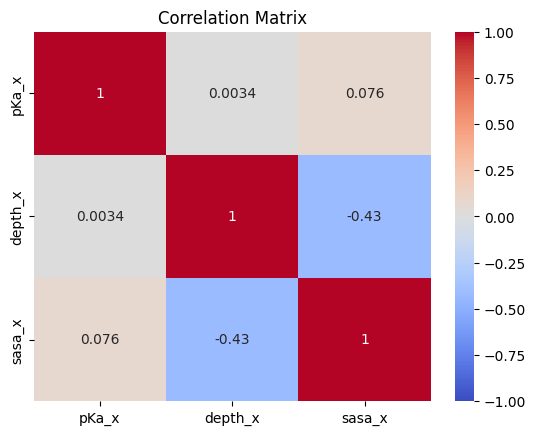

In [ ]:
df_selected = df[['pKa_x', 'depth_x', 'sasa_x']]

correlation_matrix = df_selected.corr()

sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix')
plt.show()

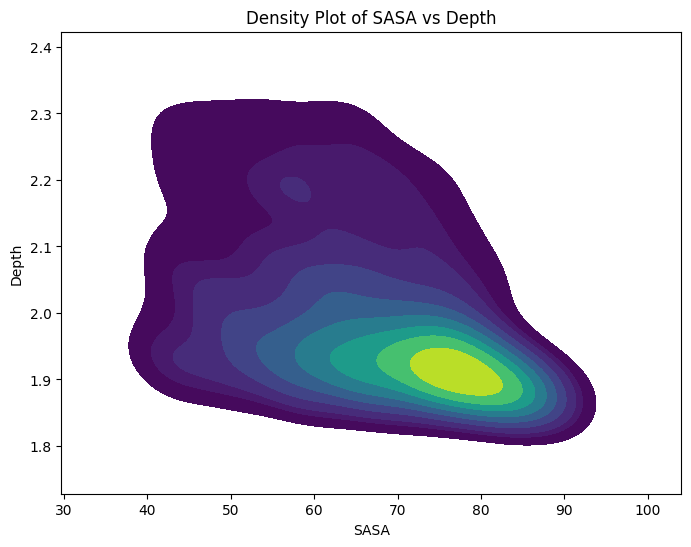

In [ ]:
plt.figure(figsize=(8, 6))
sns.kdeplot(x='sasa_x', y='depth_x', data=df, fill=True, cmap='viridis')
plt.title('Density Plot of SASA vs Depth')
plt.xlabel('SASA')
plt.ylabel('Depth')
plt.show()


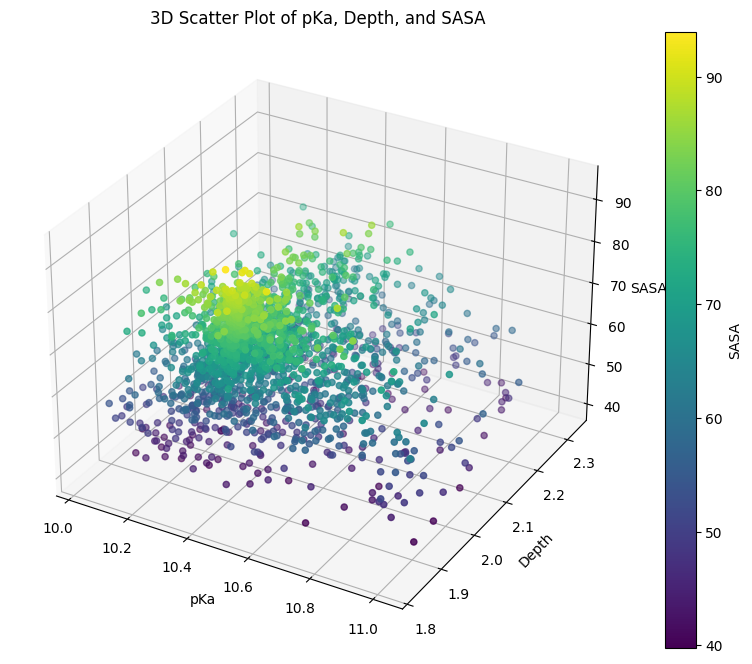

In [ ]:
pKa = df['pKa_x']
depth = df['depth_x']
sasa = df['sasa_x']

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

sc = ax.scatter(pKa, depth, sasa, c=sasa, cmap='viridis', marker='o')

ax.set_xlabel('pKa')
ax.set_ylabel('Depth')
ax.set_zlabel('SASA')

plt.colorbar(sc, ax=ax, label='SASA')

plt.title('3D Scatter Plot of pKa, Depth, and SASA')
plt.show()

#################**SVM**

In [ ]:
!pip install imbalanced-learn


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 258.3/258.3 kB 1.9 MB/s eta 0:00:00


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler

# Load the dataset
df = pd.read_csv('/content/drive/MyDrive/CleanOutput/Predicted_clean.csv')

# Define threshold
pKa_threshold = 10.4
SASA_threshold = 70
depth_threshold = 1.9

# Generate Lables
df['Label'] = df.apply(lambda row: 1 if (row['pKa'] > pKa_threshold and row['sasa'] > SASA_threshold and row['depth'] < depth_threshold) else 0, axis=1)

X = df[['depth', 'pKa', 'sasa']]
y = df['Label']

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Divide into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

# Train SVM model
svm_model = SVC(kernel='linear', C=1.0)
svm_model.fit(X_train, y_train)

# predict
y_pred = svm_model.predict(X_test)

# Evaluate the model
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))






[[16170   848]
 [  713  8120]]
              precision    recall  f1-score   support

           0       0.96      0.95      0.95     17018
           1       0.91      0.92      0.91      8833

    accuracy                           0.94     25851
   macro avg       0.93      0.93      0.93     25851
weighted avg       0.94      0.94      0.94     25851



In [ ]:
# Make predictions on the entire dataset
df['Prediction'] = svm_model.predict(X_scaled)
# Modifiable lysines (predicted as 1)
modifiable_lysines = df[df['Prediction'] == 1]

# Non-modifiable lysines (predicted as 0)
non_modifiable_lysines = df[df['Prediction'] == 0]
# Print the first few rows of modifiable lysines
print(modifiable_lysines.head())

# Print the first few rows of non-modifiable lysines
print(non_modifiable_lysines.head())

# Optionally, save to CSV
modifiable_lysines.to_csv('modifiable_lysines.csv', index=False)
non_modifiable_lysines.to_csv('non_modifiable_lysines.csv', index=False)


   Uniprot_Entry                            PDB Code     Method  Resolution  \
5         P04075  Demo/curated/AF-P04075-F1-model_v3  Predicted         NaN   
14        P04083  Demo/curated/AF-P04083-F1-model_v3  Predicted         NaN   
21        P04083  Demo/curated/AF-P04083-F1-model_v3  Predicted         NaN   
23        P04083  Demo/curated/AF-P04083-F1-model_v3  Predicted         NaN   
24        P04083  Demo/curated/AF-P04083-F1-model_v3  Predicted         NaN   

   Chain  Resid     depth  propka    pKa       sasa  Label  Prediction  
5      A    243  1.870612     NaN  10.42  72.848723      1           1  
14     A     58  1.897335     NaN  10.48  85.482082      1           1  
21     A    166  1.884359     NaN  10.62  78.446714      1           1  
23     A    214  1.870687     NaN  10.47  83.215652      1           1  
24     A    245  1.870663     NaN  10.47  78.772327      1           1  
  Uniprot_Entry                            PDB Code     Method  Resolution  \
0        

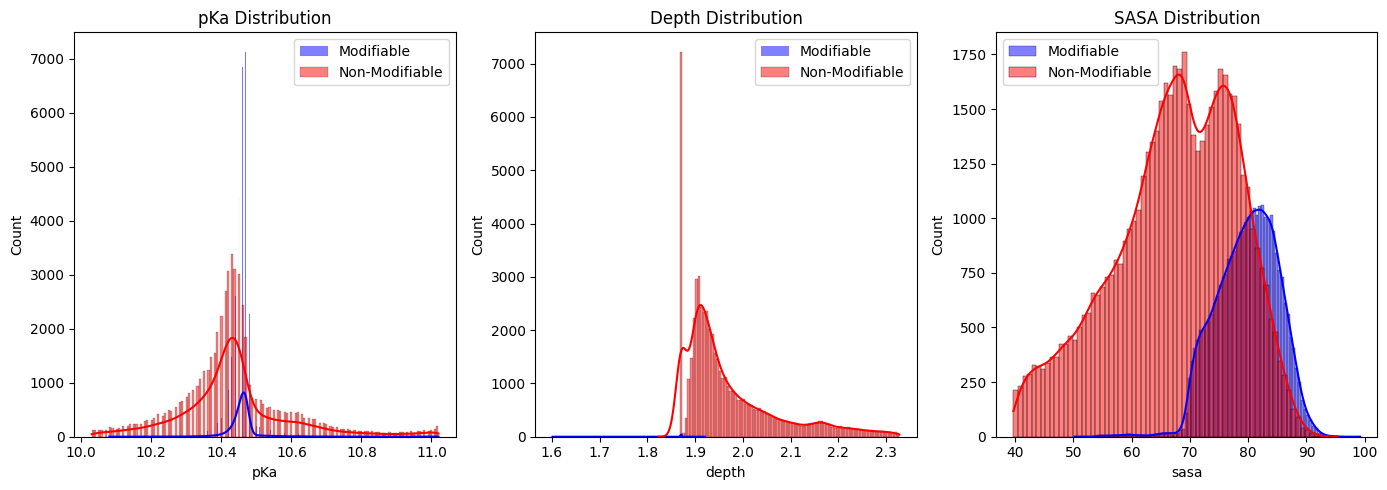

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot the distribution of pKa for modifiable and non-modifiable lysines
plt.figure(figsize=(14, 5))

plt.subplot(1, 3, 1)
sns.histplot(modifiable_lysines['pKa'], color='blue', kde=True, label='Modifiable')
sns.histplot(non_modifiable_lysines['pKa'], color='red', kde=True, label='Non-Modifiable', alpha=0.5)
plt.title('pKa Distribution')
plt.legend()

# Plot the distribution of depth for modifiable and non-modifiable lysines
plt.subplot(1, 3, 2)
sns.histplot(modifiable_lysines['depth'], color='blue', kde=True, label='Modifiable')
sns.histplot(non_modifiable_lysines['depth'], color='red', kde=True, label='Non-Modifiable', alpha=0.5)
plt.title('Depth Distribution')
plt.legend()

# Plot the distribution of sasa for modifiable and non-modifiable lysines
plt.subplot(1, 3, 3)
sns.histplot(modifiable_lysines['sasa'], color='blue', kde=True, label='Modifiable')
sns.histplot(non_modifiable_lysines['sasa'], color='red', kde=True, label='Non-Modifiable', alpha=0.5)
plt.title('SASA Distribution')
plt.legend()

plt.tight_layout()
plt.show()
